In [49]:
import pandas as pd
import swifter
import geopy
import warnings 
warnings.filterwarnings('ignore')
from geopy.geocoders import Nominatim

In [2]:
crimedf=pd.read_excel("Crime Incident Reports - 2022.xlsx")
display(crimedf.shape)
crimedf.head()

(58429, 17)

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0       S87066666        3301.0                 NaN   
1     225520077.0        3115.0                 NaN   
2     222934485.0        3831.0                 NaN   
3     222924960.0        3301.0                 NaN   
4     222674933.0        3503.0                 NaN   

                       OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  SHOOTING  \
0                           VERBAL DISPUTE       B2          300.0       0.0   
1                       INVESTIGATE PERSON      D14          786.0       0.0   
2    M/V - LEAVING SCENE - PROPERTY DAMAGE       B2          319.0       0.0   
3                           VERBAL DISPUTE      C11          355.0       0.0   
4  MISSING PERSON - NOT REPORTED - LOCATED      C11          352.0       0.0   

     OCCURRED_ON_DATE    YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART  \
0 2022-04-07 19:30:00  2022.0    4.0    Thursday  19.0       NaN   
1 2022-02-02 00:00:00  2022.0    2.0   Wednesday   0.0       NaN   
2 2022-05-14 20:50:00  2022.0    5.0    Saturday  20.0       NaN   
3 2022-04-09 16:30:00  2022.0    4.0    Saturday  16.0       NaN   
4 2022-09-28 00:00:00  2022.0    9.0   Wednesday   0.0       NaN   

           STREET        Lat       Long  \
0  THORNTON PLACE   0.000000   0.000000   
1   WASHINGTON ST  42.343081 -71.141723   
2   BLUE HILL AVE  42.308038 -71.083592   
3       GIBSON ST  42.297555 -71.059709   
4    LEROY STREET   0.000000   0.000000   

                                  Location  
0                                   (0, 0)  
1  (42.34308127134165, -71.14172267328729)  
2  (42.30803768051951, -71.08359213073199)  
3  (42.29755532959655, -71.05970910242573)  
4                                   (0, 0)

In [3]:
fdf=pd.read_excel("Active food establishment licenses.xlsx")
display(fdf.shape)
fdf.head()

(3030, 14)

BusinessName DBAName        Address  \
0                            # 7 RESTAURANT     NaN      225 Grove   
1  100 Federal Market & Barista- 11th Floor     NaN    100 Federal   
2              100 Percent Delicias Express     NaN     656 Centre   
3                       11 Dining -16th Fl.     NaN   200 Berkeley   
4                                 110 Grill     NaN  25 Jan Karski   

   Neighbourhood State     ZIP LICSTATUS LICENSECAT  \
0   West Roxbury    MA  2132.0    Active         FT   
1         Boston    MA  2110.0    Active         FT   
2  Jamaica Plain    MA  2130.0    Active         FT   
3         Boston    MA  2116.0    Active         FS   
4     Dorchester    MA  2125.0    Active         FS   

                        DESCRIPT      LicenseAddDtTm        dayphn  \
0  Eating & Drinking w/ Take Out 2007-03-23 15:20:59  1.000000e+10   
1  Eating & Drinking w/ Take Out 2021-01-12 10:37:24  1.617434e+10   
2  Eating & Drinking w/ Take Out 2017-11-28 10:27:47  1.857251e+10   
3              Eating & Drinking 2019-12-20 09:32:17  1.000000e+10   
4              Eating & Drinking 2018-11-29 14:14:04  1.978693e+10   

   Property_ID   Latitude  Longitude  
0     156965.0  42.261873  -71.15741  
1      57150.0  42.354770  -71.05613  
2      28152.0  42.312830  -71.11386  
3     187943.0  42.349860  -71.07291  
4     421286.0   0.000000    0.00000

In [4]:
hospitaldf=pd.read_excel("hospital-locations.xlsx")
display(hospitaldf.shape)
hospitaldf.head()

(26, 7)

NAME                  AD  ZIPCODE  \
0                       Lemuel Shattuck Hospital       170 MORTON ST     2130   
1  Beth Israel Deaconess Medical Center East Cam    330 BROOKLINE AV     2115   
2                       Jewish Memorial Hospital      59 TOWNSEND ST     2119   
3                   New England Baptist Hospital  125 PARKER HILL AV     2120   
4     Boston Specialty & Rehabilitation Hospital        249 RIVER ST     2126   

            NEIGH      XCOORD      YCOORD  \
0      ROSLINDALE  71106033.0  42300022.0   
1  FENWAY/KENMORE  71106780.0  42339726.0   
2         ROXBURY  71092712.0  42318569.0   
3   JAMAICA PLAIN  71107615.0  42329944.0   
4        MATTAPAN  71081888.0  42271300.0   

                                            Location  
0  170 MORTON ST\nROSLINDALE, MA 02130\n(42.30025...  
1  330 BROOKLINE AV\nFENWAY/KENMORE, MA 02115\n(4...  
2  59 TOWNSEND ST\nROXBURY, MA 02119\n(42.3185628...  
3  125 PARKER HILL AV\nJAMAICA PLAIN, MA 02120\n(...  
4  249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912...

### Function to get neighborhood of location

In [5]:
def neighborhood_geopy(df,lat,long):
    geolocator = Nominatim(user_agent="geocheck")
    neighborhood=[]
    for addlonglat in zip(df[lat],df[long]):
        try:
            print(addlonglat)
            location = geolocator.reverse(addlonglat)
            print("Neighborhood",location.raw['address']['suburb'])
            neighborhood.append(location.raw['address']['suburb'])
        except:
            neighborhood.append("No Details")
    return neighborhood

## Hospital Data

In [6]:
hospitaldf["Location"] = hospitaldf["Location"].replace(r'\n',' ', regex=True)
hospitaldf.head()

NAME                  AD  ZIPCODE  \
0                       Lemuel Shattuck Hospital       170 MORTON ST     2130   
1  Beth Israel Deaconess Medical Center East Cam    330 BROOKLINE AV     2115   
2                       Jewish Memorial Hospital      59 TOWNSEND ST     2119   
3                   New England Baptist Hospital  125 PARKER HILL AV     2120   
4     Boston Specialty & Rehabilitation Hospital        249 RIVER ST     2126   

            NEIGH      XCOORD      YCOORD  \
0      ROSLINDALE  71106033.0  42300022.0   
1  FENWAY/KENMORE  71106780.0  42339726.0   
2         ROXBURY  71092712.0  42318569.0   
3   JAMAICA PLAIN  71107615.0  42329944.0   
4        MATTAPAN  71081888.0  42271300.0   

                                            Location  
0  170 MORTON ST ROSLINDALE, MA 02130 (42.3002500...  
1  330 BROOKLINE AV FENWAY/KENMORE, MA 02115 (42....  
2  59 TOWNSEND ST ROXBURY, MA 02119 (42.318562894...  
3  125 PARKER HILL AV JAMAICA PLAIN, MA 02120 (42...  
4  249 RIVER ST MATTAPAN, MA 02126 (42.2713791217...

In [7]:
hospitaldf["Location"] = hospitaldf["Location"].str.split("\(4", 1, expand=True)[0]
hospitaldf.head()

NAME                  AD  ZIPCODE  \
0                       Lemuel Shattuck Hospital       170 MORTON ST     2130   
1  Beth Israel Deaconess Medical Center East Cam    330 BROOKLINE AV     2115   
2                       Jewish Memorial Hospital      59 TOWNSEND ST     2119   
3                   New England Baptist Hospital  125 PARKER HILL AV     2120   
4     Boston Specialty & Rehabilitation Hospital        249 RIVER ST     2126   

            NEIGH      XCOORD      YCOORD  \
0      ROSLINDALE  71106033.0  42300022.0   
1  FENWAY/KENMORE  71106780.0  42339726.0   
2         ROXBURY  71092712.0  42318569.0   
3   JAMAICA PLAIN  71107615.0  42329944.0   
4        MATTAPAN  71081888.0  42271300.0   

                                      Location  
0          170 MORTON ST ROSLINDALE, MA 02130   
1   330 BROOKLINE AV FENWAY/KENMORE, MA 02115   
2            59 TOWNSEND ST ROXBURY, MA 02119   
3  125 PARKER HILL AV JAMAICA PLAIN, MA 02120   
4             249 RIVER ST MATTAPAN, MA 02126

In [8]:
hospitaldf=hospitaldf[hospitaldf["YCOORD"]!=0.0]
hospitaldf=hospitaldf[hospitaldf["XCOORD"]!=0.0]
hospitaldf=hospitaldf.dropna(subset=["YCOORD","XCOORD"])
hospitaldf.reset_index(drop=True,inplace=True)

In [9]:
hospitaldf['YCOORD'] = hospitaldf['YCOORD'].apply(lambda x: (x / 10 ** (len((str(x))) - 2))*100)
hospitaldf['XCOORD'] = hospitaldf['XCOORD'].apply(lambda x: (x / 10 ** (len((str(x))) - 2))*100)
hospitaldf.head()

NAME                  AD  ZIPCODE  \
0                       Lemuel Shattuck Hospital       170 MORTON ST     2130   
1  Beth Israel Deaconess Medical Center East Cam    330 BROOKLINE AV     2115   
2                       Jewish Memorial Hospital      59 TOWNSEND ST     2119   
3                   New England Baptist Hospital  125 PARKER HILL AV     2120   
4     Boston Specialty & Rehabilitation Hospital        249 RIVER ST     2126   

            NEIGH     XCOORD     YCOORD  \
0      ROSLINDALE  71.106033  42.300022   
1  FENWAY/KENMORE  71.106780  42.339726   
2         ROXBURY  71.092712  42.318569   
3   JAMAICA PLAIN  71.107615  42.329944   
4        MATTAPAN  71.081888  42.271300   

                                      Location  
0          170 MORTON ST ROSLINDALE, MA 02130   
1   330 BROOKLINE AV FENWAY/KENMORE, MA 02115   
2            59 TOWNSEND ST ROXBURY, MA 02119   
3  125 PARKER HILL AV JAMAICA PLAIN, MA 02120   
4             249 RIVER ST MATTAPAN, MA 02126

In [10]:
hospitaldf['XCOORD']='-'+hospitaldf['XCOORD'].astype(str)
hospitaldf=hospitaldf.astype({"XCOORD":'float64'})
hospitaldf=hospitaldf.astype({"YCOORD":'float64'})

hospitaldf['XCOORD'] = hospitaldf['XCOORD'].apply(lambda x: round(x, 4))
hospitaldf['YCOORD'] = hospitaldf['YCOORD'].apply(lambda x: round(x, 4))
hospitaldf.head()

NAME                  AD  ZIPCODE  \
0                       Lemuel Shattuck Hospital       170 MORTON ST     2130   
1  Beth Israel Deaconess Medical Center East Cam    330 BROOKLINE AV     2115   
2                       Jewish Memorial Hospital      59 TOWNSEND ST     2119   
3                   New England Baptist Hospital  125 PARKER HILL AV     2120   
4     Boston Specialty & Rehabilitation Hospital        249 RIVER ST     2126   

            NEIGH   XCOORD   YCOORD  \
0      ROSLINDALE -71.1060  42.3000   
1  FENWAY/KENMORE -71.1068  42.3397   
2         ROXBURY -71.0927  42.3186   
3   JAMAICA PLAIN -71.1076  42.3299   
4        MATTAPAN -71.0819  42.2713   

                                      Location  
0          170 MORTON ST ROSLINDALE, MA 02130   
1   330 BROOKLINE AV FENWAY/KENMORE, MA 02115   
2            59 TOWNSEND ST ROXBURY, MA 02119   
3  125 PARKER HILL AV JAMAICA PLAIN, MA 02120   
4             249 RIVER ST MATTAPAN, MA 02126

In [11]:
neighborhood_geopy_hospital=neighborhood_geopy(hospitaldf,"YCOORD","XCOORD")

(42.3, -71.106)
Neighborhood Roslindale
(42.3397, -71.1068)
Neighborhood Fenway / Kenmore
(42.3186, -71.0927)
Neighborhood Roxbury
(42.3299, -71.1076)
Neighborhood Mission Hill
(42.2713, -71.0819)
Neighborhood Mattapan
(42.3369, -71.072)
Neighborhood South End
(42.3299, -71.1076)
Neighborhood Mission Hill
(42.3619, -71.0716)
Neighborhood West End
(42.3445, -71.1433)
Neighborhood Brighton
(42.3361, -71.1087)
Neighborhood Fenway / Kenmore
(42.2788, -71.0667)
Neighborhood Dorchester
(42.3499, -71.0641)
(42.301, -71.1277)
Neighborhood Jamaica Plain
(42.3495, -71.1487)
Neighborhood Brighton
(42.3631, -71.0678)
Neighborhood West End
(42.3374, -71.1054)
Neighborhood Fenway / Kenmore
(42.3162, -71.1129)
Neighborhood Jamaica Plain
(42.3134, -71.0633)
Neighborhood Dorchester
(42.3659, -71.0642)
Neighborhood West End
(42.3497, -71.1454)
Neighborhood Brighton
(42.3383, -71.1104)
Neighborhood Fenway / Kenmore
(42.3371, -71.108)
Neighborhood Fenway / Kenmore
(42.3625, -71.0705)
Neighborhood West End

In [12]:
hospitaldf["Neighborhood_Geopy"]=neighborhood_geopy_hospital
hospitaldf=hospitaldf[["NAME","XCOORD","YCOORD","ZIPCODE","Location","Neighborhood_Geopy"]]
hospitaldf

NAME   XCOORD   YCOORD  ZIPCODE  \
0                        Lemuel Shattuck Hospital -71.1060  42.3000     2130   
1   Beth Israel Deaconess Medical Center East Cam -71.1068  42.3397     2115   
2                        Jewish Memorial Hospital -71.0927  42.3186     2119   
3                    New England Baptist Hospital -71.1076  42.3299     2120   
4      Boston Specialty & Rehabilitation Hospital -71.0819  42.2713     2126   
5                           Boston Medical Center -71.0720  42.3369     2118   
6                                     Va Hospital -71.1076  42.3299     2120   
7               Massachusetts Eye & Ear Infirmary -71.0716  42.3619     2114   
8                                Kindred Hospital -71.1433  42.3445     2135   
9                    Brigham And Women's Hospital -71.1087  42.3361     2115   
10                                Carney Hospital -71.0667  42.2788     2124   
11                     New England Medical Center -71.0641  42.3499     2111   
12                              Faulkner Hospital -71.1277  42.3010     2130   
13                       St. Elizabeth's Hospital -71.1487  42.3495     2135   
14                       Shriners Burns Institute -71.0678  42.3631     2114   
15                            Children's Hospital -71.1054  42.3374     2115   
16                                Arbour Hospital -71.1129  42.3162     2130   
17              St. Margaret's Hospital For Women -71.0633  42.3134     2125   
18              Spaulding Rehabilitation Hospital -71.0642  42.3659     2114   
19                Franciscan Children's  Hospital -71.1454  42.3497     2134   
20  Beth Israel Deaconess Medical Center West Cam -71.1104  42.3383     2215   
21                   Dana-farber Cancer Institute -71.1080  42.3371     2115   
22                 Massachusetts General Hospital -71.0705  42.3625     2114   
23                           Boston City Hospital -71.0749  42.3355     2118   

                                            Location Neighborhood_Geopy  
0                170 MORTON ST ROSLINDALE, MA 02130          Roslindale  
1         330 BROOKLINE AV FENWAY/KENMORE, MA 02115    Fenway / Kenmore  
2                  59 TOWNSEND ST ROXBURY, MA 02119             Roxbury  
3        125 PARKER HILL AV JAMAICA PLAIN, MA 02120        Mission Hill  
4                   249 RIVER ST MATTAPAN, MA 02126            Mattapan  
5             88 EAST NEWTON ST SOUTH END, MA 02118           South End  
6        125 PARKER HILL AV JAMAICA PLAIN, MA 02120        Mission Hill  
7                  243 CHARLES ST CENTRAL, MA 02114            West End  
8   1515 COMMONWEALTH AV ALLSTON/BRIGHTON, MA 02135            Brighton  
9            75 FRANCIS ST FENWAY/KENMORE, MA 02115    Fenway / Kenmore  
10          2100 DORCHESTER AV DORCHESTER, MA 02124          Dorchester  
11              750 WASHINGTON ST CENTRAL, MA 02111          No Details  
12           1153 CENTRE ST JAMAICA PLAIN, MA 02130       Jamaica Plain  
13      736 CAMBRIDGE ST ALLSTON/BRIGHTON, MA 02135            Brighton  
14                  51 BLOSSOM ST CENTRAL, MA 02114            West End  
15         300 LONGWOOD AV FENWAY/KENMORE, MA 02115    Fenway / Kenmore  
16          49 ROBINWOOD AV JAMAICA PLAIN, MA 02130       Jamaica Plain  
17               90 CUSHING AV DORCHESTER, MA 02125          Dorchester  
18                  125 NASHUA ST CENTRAL, MA 02114            West End  
19          30 WARREN ST ALLSTON/BRIGHTON, MA 02134            Brighton  
20          185 PILGRIM RD FENWAY/KENMORE, MA 02215    Fenway / Kenmore  
21            44 BINNEY ST FENWAY/KENMORE, MA 02115    Fenway / Kenmore  
22                    55 FRUIT ST CENTRAL, MA 02114            West End  
23              818 HARRISON AV SOUTH END, MA 02118           South End

## Food Establishments

In [13]:
fdf[(fdf["Latitude"]==0.0)&(fdf["Longitude"]==0.0)]
display(fdf.shape)

(3030, 14)

In [14]:
fdf=fdf[fdf["Latitude"]!=0.0]
fdf=fdf[fdf["Longitude"]!=0.0]
display(fdf.shape)

(1941, 14)

In [15]:
fdf=fdf.astype({"ZIP":'int64'})
fdf['Latitude'] = fdf['Latitude'].apply(lambda x: round(x, 4))
fdf['Longitude'] = fdf['Longitude'].apply(lambda x: round(x, 4))

In [16]:
neighborhood_geopy_food=neighborhood_geopy(fdf,"Latitude","Longitude")

(42.2619, -71.1574)
Neighborhood West Roxbury
(42.3548, -71.0561)
Neighborhood Downtown Boston
(42.3128, -71.1139)
Neighborhood Jamaica Plain
(42.3499, -71.0729)
Neighborhood Back Bay
(42.3581, -71.0697)
Neighborhood Beacon Hill
(42.2568, -71.1241)
Neighborhood Hyde Park
(42.3583, -71.0626)
Neighborhood Beacon Hill
(42.3223, -71.0608)
Neighborhood Dorchester
(42.2717, -71.1721)
Neighborhood West Roxbury
(42.3569, -71.071)
Neighborhood Beacon Hill
(42.2872, -71.1291)
Neighborhood Roslindale
(42.3504, -71.167)
Neighborhood Brighton
(42.3574, -71.0532)
Neighborhood Downtown Boston
(42.3749, -71.0671)
Neighborhood Charlestown
(42.2941, -71.1367)
Neighborhood Roslindale
(42.3319, -71.0963)
Neighborhood Mission Hill
(42.3492, -71.0816)
Neighborhood Back Bay
(42.3461, -71.0879)
Neighborhood Fenway / Kenmore
(42.3764, -71.04)
Neighborhood East Boston
(42.3573, -71.059)
Neighborhood Downtown Boston
(42.3393, -71.1)
Neighborhood Fenway / Kenmore
(42.2787, -71.1633)
Neighborhood West Roxbury
(42.

Neighborhood Downtown Boston
(42.347, -71.088)
Neighborhood Fenway / Kenmore
(42.3523, -71.0671)
(42.2858, -71.0913)
Neighborhood Mattapan
(42.3387, -71.1078)
Neighborhood Fenway / Kenmore
(42.3486, -71.076)
Neighborhood Back Bay
(42.3511, -71.0502)
Neighborhood South Boston
(42.3554, -71.0588)
Neighborhood Downtown Boston
(42.2778, -71.164)
Neighborhood West Roxbury
(42.3531, -71.1306)
Neighborhood Allston
(42.3642, -71.0595)
Neighborhood West End
(42.35, -71.1305)
Neighborhood Allston
(42.3464, -71.0853)
Neighborhood Fenway / Kenmore
(42.3354, -71.0352)
Neighborhood South Boston
(42.3468, -71.0885)
Neighborhood Fenway / Kenmore
(42.3548, -71.0561)
Neighborhood Downtown Boston
(42.2921, -71.041)
Neighborhood Dorchester
(42.3567, -71.0497)
Neighborhood North End
(42.3581, -71.0553)
Neighborhood Downtown Boston
(42.3511, -71.0631)
Neighborhood Downtown Boston
(42.3486, -71.073)
Neighborhood Back Bay
(42.2737, -71.1693)
Neighborhood West Roxbury
(42.3601, -71.0509)
Neighborhood North End

(42.3461, -71.0752)
Neighborhood South End
(42.354, -71.0559)
Neighborhood Downtown Boston
(42.3577, -71.0591)
Neighborhood Downtown Boston
(42.3473, -71.0815)
Neighborhood Back Bay
(42.3507, -71.0764)
Neighborhood Back Bay
(42.3485, -71.0724)
Neighborhood Back Bay
(42.319, -71.045)
Neighborhood Dorchester
(42.3001, -71.06)
Neighborhood Dorchester
(42.349, -71.0855)
Neighborhood Back Bay
(42.3595, -71.0588)
Neighborhood Downtown Boston
(42.3379, -71.0747)
Neighborhood South End
(42.3394, -71.0361)
Neighborhood South Boston
(42.3473, -71.0815)
Neighborhood Back Bay
(42.3527, -71.0734)
Neighborhood Back Bay
(42.3426, -71.0973)
Neighborhood Fenway / Kenmore
(42.3455, -71.0811)
Neighborhood Back Bay
(42.3194, -71.0493)
Neighborhood Dorchester
(42.3507, -71.0647)
(42.2857, -71.1555)
Neighborhood West Roxbury
(42.3393, -71.1)
Neighborhood Fenway / Kenmore
(42.3178, -71.1029)
Neighborhood Roxbury
(42.3641, -71.0618)
Neighborhood West End
(42.3521, -71.0722)
Neighborhood Back Bay
(42.3362, -71

Neighborhood Downtown Boston
(42.3105, -71.1152)
Neighborhood Jamaica Plain
(42.2765, -71.1668)
Neighborhood West Roxbury
(42.3565, -71.0533)
Neighborhood Downtown Boston
(42.2676, -71.1199)
Neighborhood Hyde Park
(42.3437, -71.0658)
Neighborhood South End
(42.3669, -71.0209)
Neighborhood East Boston
(42.3383, -71.107)
Neighborhood Fenway / Kenmore
(42.2379, -71.1321)
Neighborhood Hyde Park
(42.3409, -71.0818)
Neighborhood South End
(42.3547, -71.0602)
Neighborhood Downtown Boston
(42.359, -71.0548)
Neighborhood Downtown Boston
(42.3522, -71.0624)
Neighborhood Downtown Boston
(42.3536, -71.0582)
Neighborhood Downtown Boston
(42.3645, -71.0218)
Neighborhood East Boston
(42.3617, -71.0566)
(42.354, -71.0559)
Neighborhood Downtown Boston
(42.3515, -71.0674)
(42.3473, -71.0815)
Neighborhood Back Bay
(42.3362, -71.1664)
Neighborhood Chestnut Hill
(42.3473, -71.0815)
Neighborhood Back Bay
(42.3563, -71.0518)
Neighborhood Downtown Boston
(42.3471, -71.1632)
Neighborhood Brighton
(42.2861, -71

Neighborhood Fenway / Kenmore
(42.3337, -71.1053)
Neighborhood Mission Hill
(42.357, -71.0602)
Neighborhood Downtown Boston
(42.3544, -71.0554)
Neighborhood Downtown Boston
(42.356, -71.0713)
Neighborhood Beacon Hill
(42.3323, -71.074)
Neighborhood South End
(42.351, -71.1311)
Neighborhood Allston
(42.3128, -71.1015)
Neighborhood Roxbury
(42.3601, -71.0509)
Neighborhood North End
(42.3593, -71.0529)
Neighborhood Downtown Boston
(42.3569, -71.0504)
Neighborhood North End
(42.3131, -71.0574)
Neighborhood Dorchester
(42.3645, -71.0218)
Neighborhood East Boston
(42.3469, -71.0342)
Neighborhood South Boston
(42.351, -71.0616)
(42.3492, -71.1396)
Neighborhood Allston
(42.3659, -71.1221)
Neighborhood Allston
(42.3664, -71.1228)
Neighborhood Allston
(42.3495, -71.0894)
Neighborhood Back Bay
(42.3609, -71.069)
Neighborhood Beacon Hill
(42.3507, -71.0647)
(42.2967, -71.1307)
Neighborhood Roslindale
(42.2967, -71.1307)
Neighborhood Roslindale
(42.3513, -71.0598)
(42.3391, -71.1081)
Neighborhood F

Neighborhood Fenway / Kenmore
(42.3467, -71.0987)
Neighborhood Fenway / Kenmore
(42.3467, -71.0987)
Neighborhood Fenway / Kenmore
(42.35, -71.0655)
(42.3472, -71.0782)
Neighborhood Back Bay
(42.3594, -71.0511)
Neighborhood North End
(42.3645, -71.0218)
Neighborhood East Boston
(42.3952, -71.0001)
Neighborhood East Boston
(42.3493, -71.0796)
Neighborhood Back Bay
(42.3424, -71.0546)
Neighborhood South Boston
(42.2998, -71.0745)
Neighborhood Dorchester
(42.3444, -71.0448)
Neighborhood South Boston
(42.3444, -71.0448)
Neighborhood South Boston
(42.3444, -71.0448)
Neighborhood South Boston
(42.3444, -71.0448)
Neighborhood South Boston
(42.3444, -71.0448)
Neighborhood South Boston
(42.3444, -71.0448)
Neighborhood South Boston
(42.3467, -71.0987)
Neighborhood Fenway / Kenmore
(42.3467, -71.089)
Neighborhood Fenway / Kenmore
(42.3516, -71.0728)
Neighborhood Back Bay
(42.345, -71.0704)
Neighborhood South End
(42.3323, -71.1)
Neighborhood Mission Hill
(42.3562, -71.058)
Neighborhood Downtown Bo

Neighborhood Fenway / Kenmore
(42.341, -71.0902)
Neighborhood Fenway / Kenmore
(42.332, -71.0967)
Neighborhood Mission Hill
(42.3496, -71.0952)
Neighborhood Cambridgeport
(42.3899, -70.9967)
Neighborhood East Boston
(42.2874, -71.1274)
Neighborhood Roslindale
(42.3504, -71.0653)
(42.3484, -71.134)
Neighborhood Allston
(42.3438, -71.1017)
Neighborhood Fenway / Kenmore
(42.2962, -71.0872)
Neighborhood Roxbury
(42.3533, -71.0529)
Neighborhood Downtown Boston
(42.3632, -71.0559)
Neighborhood North End
(42.3331, -71.0706)
Neighborhood Dorchester
(42.3632, -71.0563)
Neighborhood North End
(42.3514, -71.06)
(42.318, -71.0666)
Neighborhood Dorchester
(42.3504, -71.1686)
Neighborhood Brighton
(42.3321, -71.071)
Neighborhood Dorchester
(42.3304, -71.0667)
Neighborhood Dorchester
(42.352, -71.0599)
Neighborhood Downtown Boston
(42.3004, -71.1129)
Neighborhood Roslindale
(42.3096, -71.0822)
Neighborhood Roxbury
(42.3154, -71.0663)
Neighborhood Dorchester
(42.3441, -71.1433)
Neighborhood Brighton
(

Neighborhood East Boston
(42.2789, -71.1186)
Neighborhood Roslindale
(42.3634, -71.0558)
Neighborhood North End
(42.3519, -71.1187)
Neighborhood Allston
(42.3194, -71.0701)
Neighborhood Roxbury
(42.3505, -71.0676)
(42.3601, -71.0579)
(42.3485, -71.0733)
Neighborhood Back Bay
(42.3299, -71.0568)
Neighborhood South Boston
(42.3488, -71.0847)
Neighborhood Back Bay
(42.2847, -71.0921)
Neighborhood Mattapan
(42.3482, -71.0391)
Neighborhood South Boston
(42.3482, -71.0391)
Neighborhood South Boston
(42.3482, -71.0391)
Neighborhood South Boston
(42.3482, -71.0391)
Neighborhood South Boston
(42.3482, -71.0391)
Neighborhood South Boston
(42.3411, -71.0815)
Neighborhood South End
(42.357, -71.0576)
Neighborhood Downtown Boston
(42.3457, -71.1003)
Neighborhood Fenway / Kenmore
(42.3502, -71.0513)
Neighborhood South Boston
(42.3536, -71.0574)
Neighborhood Downtown Boston
(42.292, -71.088)
Neighborhood Mattapan
(42.3069, -71.0667)
Neighborhood Dorchester
(42.3468, -71.0694)
Neighborhood South End
(

Neighborhood West Roxbury
(42.3443, -71.163)
Neighborhood Brighton
(42.3138, -71.0632)
Neighborhood Dorchester
(42.3528, -71.1318)
Neighborhood Allston
(42.2878, -71.0778)
Neighborhood Dorchester
(42.3611, -71.1378)
Neighborhood Brighton
(42.3437, -71.1002)
Neighborhood Fenway / Kenmore
(42.3444, -71.0996)
Neighborhood Fenway / Kenmore
(42.3471, -71.0784)
Neighborhood Back Bay
(42.3449, -71.1007)
Neighborhood Fenway / Kenmore
(42.3587, -71.1537)
Neighborhood Brighton
(42.3363, -71.1502)
Neighborhood Brighton
(42.364, -71.1304)
Neighborhood Allston
(42.36, -71.0563)
(42.3935, -71.013)
Neighborhood East Boston
(42.3513, -71.0692)
Neighborhood Back Bay
(42.353, -71.0576)
Neighborhood Downtown Boston
(42.3556, -71.0611)
Neighborhood Downtown Boston
(42.3494, -71.0811)
Neighborhood Back Bay
(42.352, -71.0644)
Neighborhood Downtown Boston
(42.3563, -71.0518)
Neighborhood Downtown Boston
(42.3487, -71.1595)
Neighborhood Brighton
(42.3516, -71.073)
Neighborhood Back Bay
(42.3549, -71.0566)
Nei

Neighborhood Allston
(42.3643, -71.0513)
Neighborhood North End
(42.3513, -71.0646)
(42.3485, -71.0733)
Neighborhood Back Bay
(42.3534, -71.059)
Neighborhood Downtown Boston
(42.3645, -71.0614)
Neighborhood West End
(42.3646, -71.0623)
Neighborhood West End
(42.3146, -71.1045)
Neighborhood Roxbury
(42.361, -71.0666)
Neighborhood Beacon Hill
(42.3498, -71.1334)
Neighborhood Allston
(42.3573, -71.0596)
Neighborhood Downtown Boston
(42.357, -71.0535)
Neighborhood Downtown Boston
(42.2724, -71.0682)
Neighborhood Dorchester
(42.345, -71.0809)
Neighborhood Back Bay
(42.3148, -71.1143)
Neighborhood Jamaica Plain
(42.3494, -71.104)
Neighborhood Cambridgeport
(42.3485, -71.0939)
Neighborhood Fenway / Kenmore
(42.3657, -71.1357)
Neighborhood Brighton
(42.3601, -71.0503)
Neighborhood North End
(42.3566, -71.0543)
Neighborhood Downtown Boston
(42.3566, -71.0543)
Neighborhood Downtown Boston
(42.3473, -71.0951)
Neighborhood Fenway / Kenmore
(42.362, -71.0704)
Neighborhood West End
(42.2565, -71.120

(42.3366, -71.0949)
Neighborhood Mission Hill
(42.2715, -71.094)
Neighborhood Mattapan
(42.3492, -71.1629)
Neighborhood Brighton
(42.3315, -71.1122)
Neighborhood Mission Hill
(42.3634, -71.0257)
Neighborhood East Boston
(42.3586, -71.0583)
Neighborhood Downtown Boston
(42.3558, -71.0604)
Neighborhood Downtown Boston
(42.3526, -71.0426)
Neighborhood South Boston
(42.3448, -71.0894)
Neighborhood Fenway / Kenmore
(42.386, -71.0053)
Neighborhood East Boston
(42.3618, -71.0666)
Neighborhood West End
(42.3391, -71.1081)
Neighborhood Fenway / Kenmore
(42.3504, -71.089)
Neighborhood Back Bay
(42.3558, -71.0604)
Neighborhood Downtown Boston
(42.3467, -71.0987)
Neighborhood Fenway / Kenmore
(42.3027, -71.0516)
Neighborhood Dorchester
(42.3508, -71.0758)
Neighborhood Back Bay
(42.3407, -71.1516)
Neighborhood Brighton
(42.3063, -71.1074)
Neighborhood Jamaica Plain
(42.3453, -71.1001)
Neighborhood Fenway / Kenmore
(42.3471, -71.0784)
Neighborhood Back Bay
(42.3526, -71.1313)
Neighborhood Allston
(4

In [17]:
fdf["Neighborhood_Geopy"]=neighborhood_geopy_food
fdf=fdf[["BusinessName","Address","ZIP","DESCRIPT","Latitude","Longitude","Neighborhood_Geopy"]]
fdf

BusinessName          Address   ZIP  \
0                               # 7 RESTAURANT        225 Grove  2132   
1     100 Federal Market & Barista- 11th Floor      100 Federal  2110   
2                 100 Percent Delicias Express       656 Centre  2130   
3                          11 Dining -16th Fl.     200 Berkeley  2116   
8                             1928 Beacon Hill  97 Mount Vernon  2108   
...                                        ...              ...   ...   
3022                            Zaz Restaurant       1230 River  2136   
3023           Zaz Restaurant & Catering Corp.      1 City Hall  2201   
3025                             ZESTO'S PIZZA       460 Centre  2130   
3027                                        Zo         92 State  2109   
3029                       Zume's Coffee House         219 Main  2129   

                           DESCRIPT  Latitude  Longitude Neighborhood_Geopy  
0     Eating & Drinking w/ Take Out   42.2619   -71.1574       West Roxbury  
1     Eating & Drinking w/ Take Out   42.3548   -71.0561    Downtown Boston  
2     Eating & Drinking w/ Take Out   42.3128   -71.1139      Jamaica Plain  
3                 Eating & Drinking   42.3499   -71.0729           Back Bay  
8                 Eating & Drinking   42.3581   -71.0697        Beacon Hill  
...                             ...       ...        ...                ...  
3022              Eating & Drinking   42.2558   -71.1230          Hyde Park  
3023              Eating & Drinking   42.3601   -71.0579         No Details  
3025  Eating & Drinking w/ Take Out   42.3194   -71.1115      Jamaica Plain  
3027  Eating & Drinking w/ Take Out   42.3592   -71.0553    Downtown Boston  
3029  Eating & Drinking w/ Take Out   42.3765   -71.0654        Charlestown  

[1941 rows x 7 columns]

## Crime Data

In [18]:
crimedf[(crimedf["Lat"]==0.0)&(crimedf["Long"]==0.0)]
display(crimedf.shape)

(58429, 17)

In [19]:
crimedf=crimedf[crimedf["Lat"]!=0.0]
crimedf=crimedf[crimedf["Long"]!=0.0]
display(crimedf.shape)

(55572, 17)

In [20]:
crimedf['Lat'] = crimedf['Lat'].apply(lambda x: round(x, 4))
crimedf['Long'] = crimedf['Long'].apply(lambda x: round(x, 4))

In [21]:
neighborhood_geopy_crime=neighborhood_geopy(crimedf,"Lat","Long")

(42.3431, -71.1417)
Neighborhood Brighton
(42.308, -71.0836)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3297, -71.0845)
Neighborhood Roxbury
(42.3168, -71.0909)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3114, -71.0758)
Neighborhood Roxbury
(42.3805, -71.0338)
Neighborhood East Boston
(42.318, -71.0962)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3332, -71.0739)
Neighborhood South End
(42.3468, -71.1432)
Neighborhood Brighton
(42.3491, -71.1505)
Neighborhood Brighton
(42.3335, -71.0735)
Neighborhood South End
(42.3456, -71.0756)
Neighborhood South End
(42.3214, -71.0568)
Neighborhood Dorchester
(42.3766, -71.0363)
Neighborhood East Boston
(42.3562, -71.1542)
Neighborhood Brighton
(42.3674, -71.0543)
Neighborhood North End
(42.3567, -71.151)
Neighborhood Brighton
(42.3532, -71.1609)
Neighborhood Brighton
(42.3472, -71.0964)
Neighborhood Fenway / Kenmore
(42.3114, -71.0933)
Neighborhood Roxbury
(42.2895, -71.08

(42.2848, -71.0914)
Neighborhood Mattapan
(42.3501, -71.0773)
Neighborhood Back Bay
(42.3032, -71.0704)
Neighborhood Dorchester
(42.3465, -71.0428)
Neighborhood South Boston
(42.3842, -71.0)
Neighborhood East Boston
(42.356, -71.1483)
Neighborhood Brighton
(42.3456, -71.0878)
Neighborhood Fenway / Kenmore
(42.3264, -71.0959)
Neighborhood Roxbury
(42.3356, -71.0399)
Neighborhood South Boston
(42.3193, -71.0387)
Neighborhood Dorchester
(42.2696, -71.0908)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3392, -71.0698)
Neighborhood South End
(42.2765, -71.131)
Neighborhood Roslindale
(42.3058, -71.0847)
Neighborhood Roxbury
(42.3426, -71.0627)
Neighborhood South End
(42.3532, -71.1282)
Neighborhood Allston
(42.354, -71.1447)
Neighborhood Brighton
(42.3524, -71.0723)
Neighborhood Back Bay
(42.2953, -71.091)
Neighborhood Mattapan
(42.3351, -71.0932)
Neighborhood Mission Hill
(42.3092, -71.074)
Neighborhood Roxbury
(42.3281, -7

Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3481, -71.0656)
(42.3708, -71.0393)
Neighborhood East Boston
(42.3708, -71.0393)
Neighborhood East Boston
(42.349, -71.0813)
Neighborhood Back Bay
(42.3444, -71.0863)
Neighborhood Fenway / Kenmore
(42.3395, -71.0694)
Neighborhood South End
(42.3249, -71.0984)
Neighborhood Roxbury
(42.3508, -71.065)
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3078, -71.0755)
Neighborhood Roxbury
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3492, -71.0445)
Neighborhood South Boston
(42.351, -71.1685)
Neighborhood Brighton
(42.2802, -71.0869)
Neighborhood Mattapan
(42.3525, -71.0664)
Neighborhood Beacon Hill
(42.2622, -71.1125)
Neighborhood Hyde Park
(42.3538, -71.0532)
Neighborhood Downtown Boston
(42.314, -71.0986)
Neighborhood Roxbury
(42.3263, -71.0551)
Neighborhood South Boston
(42.3188, -71.0907)
Neighborhood Roxbury
(42.349, -71.1386)
Neighborhood Allston
(42.351, -71.0665)
(42.2798, -71.1352)
Neighborhood Roslindale
(42.31

(42.2716, -71.1192)
Neighborhood Hyde Park
(42.3192, -71.1007)
Neighborhood Roxbury
(42.3252, -71.0582)
Neighborhood Dorchester
(42.3458, -71.0753)
Neighborhood South End
(42.322, -71.0772)
Neighborhood Roxbury
(42.3182, -71.0666)
Neighborhood Dorchester
(42.3578, -71.0536)
Neighborhood Downtown Boston
(42.2942, -71.0889)
Neighborhood Mattapan
(42.3531, -71.0614)
Neighborhood Downtown Boston
(42.2689, -71.118)
Neighborhood Hyde Park
(42.3136, -71.0678)
Neighborhood Dorchester
(42.342, -71.0857)
Neighborhood Fenway / Kenmore
(42.3129, -71.0831)
Neighborhood Roxbury
(42.3522, -71.1667)
Neighborhood Brighton
(42.3605, -71.0564)
(42.3292, -71.0873)
Neighborhood Roxbury
(42.3589, -71.0644)
Neighborhood Beacon Hill
(42.2636, -71.1024)
Neighborhood Hyde Park
(42.3708, -71.0429)
Neighborhood East Boston
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3323, -71.0521)
Neighborhood South Boston
(42.3065, -71.0818)
Neighborhood Roxbury
(42.2776, -71.1627)
Neighborhood West Roxbury
(42.3297, -71.0704)

(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2985, -71.0631)
Neighborhood Dorchester
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3632, -71.1318)
Neighborhood Allston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2442, -71.1325)
Neighborhood Hyde Park
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3335, -71.1062)
Neighborhood Mission Hill
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3383, -71.1024)
Neighborhood Fenway / Kenmore
(42.3428, -71.1007)
Neighborhood Fenway / Kenmore
(42.3413, -71.0547)
Neighborhood South Boston
(42.3317, -71.068)
Neighborhood Dorchester
(42.3623, -71.1384)
Neighborhood Brighton
(42.3511, -71.0594)
(42.2648, -71.1466)
Neighborhood West Roxbury
(42.2599, -71.1199)
Neighborhood Hyde Park
(42.2871, -71.0899)
Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3395, -71.065)
Neighborhood South End
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3527,

Neighborhood North End
(42.3302, -71.0603)
Neighborhood South Boston
(42.3458, -71.1449)
Neighborhood Brighton
(42.2925, -71.1217)
Neighborhood Roslindale
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3518, -71.0745)
Neighborhood Back Bay
(42.3555, -71.0605)
Neighborhood Downtown Boston
(42.3509, -71.1313)
Neighborhood Allston
(42.3028, -71.0621)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.2847, -71.066)
Neighborhood Dorchester
(42.3863, -71.0077)
Neighborhood East Boston
(42.3395, -71.0694)
Neighborhood South End
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3462, -71.0632)
Neighborhood South End
(42.3762, -71.0398)
Neighborhood East Boston
(42.309, -71.0879)
Neighborhood Roxbury
(42.3041, -71.0823)
Neighborhood Roxbury
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3655, -71.1266)
Neighborhood Allston
(42.3498, -71.0784)
Neighborhood Back Bay
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2631, -71.1075)
Neig

Neighborhood Dorchester
(42.3404, -71.1437)
Neighborhood Brighton
(42.3615, -71.0572)
(42.3064, -71.0587)
Neighborhood Dorchester
(42.3496, -71.1044)
Neighborhood Fenway / Kenmore
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2831, -71.1428)
Neighborhood Roslindale
(42.2929, -71.1167)
Neighborhood Roslindale
(42.3135, -71.0846)
Neighborhood Roxbury
(42.297, -71.0686)
Neighborhood Dorchester
(42.342, -71.0857)
Neighborhood Fenway / Kenmore
(42.3337, -71.0495)
Neighborhood South Boston
(42.3534, -71.1292)
Neighborhood Allston
(42.34, -71.0661)
Neighborhood South End
(42.3618, -71.0598)
(42.3708, -71.0393)
Neighborhood East Boston
(42.3565, -71.0526)
Neighborhood Downtown Boston
(42.3807, -71.0668)
Neighborhood Charlestown
(42.3385, -71.0731)
Neighborhood South End
(42.3285, -71.0804)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.3361, -71.0467)
Neighborhood South Boston
(42.2636, -71.104)
Neighborhood Hyde Park
(42.2408, -71

Neighborhood West Roxbury
(42.2577, -71.1274)
Neighborhood Hyde Park
(42.3444, -71.0983)
Neighborhood Fenway / Kenmore
(42.3597, -71.1295)
Neighborhood Allston
(42.3581, -71.0718)
Neighborhood Beacon Hill
(42.2845, -71.0453)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3431, -71.1417)
Neighborhood Brighton
(42.3142, -71.0913)
Neighborhood Roxbury
(42.2947, -71.085)
Neighborhood Roxbury
(42.3677, -71.0371)
Neighborhood East Boston
(42.3708, -71.0393)
Neighborhood East Boston
(42.2947, -71.0764)
Neighborhood Dorchester
(42.3644, -71.0658)
Neighborhood West End
(42.3115, -71.1063)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3317, -71.068)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3708, -71.0393)
Neighborhood East Boston
(42.3494, -71.0654)
(42.3014, -71.0768)
Neighborhood Dorchester
(42.3333, -71.1023)
Neighborhood Mission Hill
(42.3229, -71.1022)
Neighborhood Jamaica Plain
(42.2546, -71.1195)
Neighborhood Hy

Neighborhood Brighton
(42.3539, -71.078)
Neighborhood Back Bay
(42.3413, -71.0547)
Neighborhood South Boston
(42.3219, -71.1038)
Neighborhood Jamaica Plain
(42.3103, -71.082)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3199, -71.071)
Neighborhood Roxbury
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3631, -71.1422)
Neighborhood Brighton
(42.3491, -71.1505)
Neighborhood Brighton
(42.3139, -71.0732)
Neighborhood Roxbury
(42.3009, -71.0579)
Neighborhood Dorchester
(42.2686, -71.0957)
Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3439, -71.0362)
Neighborhood South Boston
(42.3562, -71.1491)
Neighborhood Brighton
(42.2519, -71.1254)
Neighborhood Hyde Park
(42.3554, -71.0631)
Neighborhood Beacon Hill
(42.3494, -71.0746)
Neighborhood Back Bay
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3634, -71.0534)
Neighborhood North End
(42.3708, -71.0393)
Neighborhoo

Neighborhood Brighton
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3517, -71.1612)
Neighborhood Brighton
(42.3536, -71.1666)
Neighborhood Brighton
(42.3475, -71.0935)
Neighborhood Fenway / Kenmore
(42.2674, -71.1092)
Neighborhood Hyde Park
(42.3475, -71.0935)
Neighborhood Fenway / Kenmore
(42.3491, -71.1505)
Neighborhood Brighton
(42.3313, -71.0719)
Neighborhood Roxbury
(42.3055, -71.0703)
Neighborhood Dorchester
(42.3288, -71.0846)
Neighborhood Roxbury
(42.3496, -71.1044)
Neighborhood Fenway / Kenmore
(42.3491, -71.1505)
Neighborhood Brighton
(42.3414, -71.0736)
Neighborhood South End
(42.3664, -71.0614)
Neighborhood West End
(42.3426, -71.0981)
Neighborhood Fenway / Kenmore
(42.3172, -71.0988)
Neighborhood Roxbury
(42.2825, -71.0945)
Neighborhood Mattapan
(42.3935, -71.0114)
Neighborhood East Boston
(42.3524, -71.1626)
Neighborhood Brighton
(42.3282, -71.1075)
Neighborhood Mission Hill
(42.2976, -71.0597)
Neighborhood Dorchester

Neighborhood Fenway / Kenmore
(42.2744, -71.086)
Neighborhood Mattapan
(42.3668, -71.033)
Neighborhood East Boston
(42.2935, -71.0607)
Neighborhood Dorchester
(42.3419, -71.0741)
Neighborhood South End
(42.3493, -71.0801)
Neighborhood Back Bay
(42.3066, -71.0675)
Neighborhood Dorchester
(42.3023, -71.0763)
Neighborhood Dorchester
(42.2816, -71.1299)
Neighborhood Roslindale
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2902, -71.1202)
Neighborhood Roslindale
(42.3314, -71.0382)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3382, -71.0684)
Neighborhood South End
(42.2714, -71.0801)
Neighborhood Mattapan
(42.3247, -71.1009)
Neighborhood Jamaica Plain
(42.3041, -71.0642)
Neighborhood Dorchester
(42.3382, -71.0746)
Neighborhood South End
(42.3065, -71.0818)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.2875, -71.1219)
Neighborhood Roslindale
(42.3281, -71.0632)
Neighborhood Dorchester
(42.2615, -71.111

Neighborhood Roxbury
(42.3007, -71.0833)
Neighborhood Roxbury
(42.3151, -71.0549)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2842, -71.0716)
Neighborhood Dorchester
(42.2879, -71.078)
Neighborhood Dorchester
(42.3404, -71.0885)
Neighborhood Fenway / Kenmore
(42.3642, -71.0602)
Neighborhood West End
(42.2741, -71.1395)
Neighborhood Roslindale
(42.3395, -71.0694)
Neighborhood South End
(42.273, -71.1099)
Neighborhood Hyde Park
(42.2802, -71.0848)
Neighborhood Mattapan
(42.3099, -71.0815)
Neighborhood Roxbury
(42.3494, -71.0463)
Neighborhood South Boston
(42.3332, -71.0302)
Neighborhood South Boston
(42.3809, -71.0402)
Neighborhood East Boston
(42.3377, -71.0375)
Neighborhood South Boston
(42.3664, -71.0614)
Neighborhood West End
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2373, -71.1262)
Neighborhood Hyde Park
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2871, -71.1482

Neighborhood Brighton
(42.2814, -71.0865)
Neighborhood Mattapan
(42.3329, -71.0924)
Neighborhood Roxbury
(42.3504, -71.0763)
Neighborhood Back Bay
(42.3179, -71.0877)
Neighborhood Roxbury
(42.3546, -71.0622)
Neighborhood Downtown Boston
(42.3108, -71.0653)
Neighborhood Dorchester
(42.3593, -71.1539)
Neighborhood Brighton
(42.3351, -71.0932)
Neighborhood Mission Hill
(42.3394, -71.0502)
Neighborhood South Boston
(42.3257, -71.0713)
Neighborhood Roxbury
(42.3488, -71.0666)
(42.2424, -71.1208)
Neighborhood Hyde Park
(42.3339, -71.0381)
Neighborhood South Boston
(42.3321, -71.0512)
Neighborhood South Boston
(42.332, -71.101)
Neighborhood Mission Hill
(42.2983, -71.0483)
Neighborhood Dorchester
(42.3652, -71.0555)
Neighborhood North End
(42.3507, -71.066)
(42.3554, -71.0631)
Neighborhood Beacon Hill
(42.3065, -71.0773)
Neighborhood Roxbury
(42.3488, -71.0666)
(42.3604, -71.0629)
Neighborhood Beacon Hill
(42.3509, -71.064)
(42.332, -71.11)
Neighborhood Mission Hill
(42.36, -71.1358)
Neighbor

Neighborhood Dorchester
(42.3533, -71.0635)
Neighborhood Downtown Boston
(42.3462, -71.074)
Neighborhood South End
(42.3563, -71.0557)
Neighborhood Downtown Boston
(42.3306, -71.0996)
Neighborhood Mission Hill
(42.3362, -71.151)
Neighborhood Brighton
(42.3599, -71.1329)
Neighborhood Allston
(42.3578, -71.1394)
Neighborhood Brighton
(42.3193, -71.0889)
Neighborhood Roxbury
(42.3529, -71.0563)
Neighborhood Downtown Boston
(42.3328, -71.1054)
Neighborhood Mission Hill
(42.3008, -71.0852)
Neighborhood Roxbury
(42.2986, -71.0851)
Neighborhood Roxbury
(42.3351, -71.1026)
Neighborhood Fenway / Kenmore
(42.2505, -71.126)
Neighborhood Hyde Park
(42.2967, -71.0556)
Neighborhood Dorchester
(42.3664, -71.0614)
Neighborhood West End
(42.3184, -71.0597)
Neighborhood Dorchester
(42.3642, -71.0334)
Neighborhood East Boston
(42.3023, -71.1652)
Neighborhood West Roxbury
(42.3878, -71.0177)
Neighborhood East Boston
(42.3296, -71.0846)
Neighborhood Roxbury
(42.3187, -71.1)
Neighborhood Roxbury
(42.2824, -

Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3394, -71.0537)
Neighborhood South Boston
(42.3029, -71.064)
Neighborhood Dorchester
(42.2957, -71.0732)
Neighborhood Dorchester
(42.3287, -71.0856)
Neighborhood Roxbury
(42.318, -71.0602)
Neighborhood Dorchester
(42.2713, -71.083)
Neighborhood Mattapan
(42.2874, -71.0526)
Neighborhood Dorchester
(42.2652, -71.1102)
Neighborhood Hyde Park
(42.329, -71.0784)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3364, -71.0551)
Neighborhood South Boston
(42.2898, -71.0909)
Neighborhood Mattapan
(42.3889, -70.9971)
Neighborhood East Boston
(42.3236, -71.062)
Neighborhood Dorchester
(42.3267, -71.0875)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3081, -71.0769)
Neighborhood Roxbury
(42.3479, -71.138)
Neighborhood Allston
(42.3315, -71.0501)
Neighborhood South Boston
(42.3002, -71.1042)
Neighborhood Roslindale
(42.3113, -71.07)
Neighborhood Dor

Neighborhood Fenway / Kenmore
(42.3312, -71.0963)
Neighborhood Mission Hill
(42.2942, -71.0498)
Neighborhood Dorchester
(42.3434, -71.0985)
Neighborhood Fenway / Kenmore
(42.3312, -71.0914)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3708, -71.0393)
Neighborhood East Boston
(42.3403, -71.0784)
Neighborhood South End
(42.3096, -71.0732)
Neighborhood Roxbury
(42.3424, -71.1446)
Neighborhood Brighton
(42.3541, -71.0598)
Neighborhood Downtown Boston
(42.2879, -71.1266)
Neighborhood Roslindale
(42.2693, -71.172)
Neighborhood West Roxbury
(42.2775, -71.078)
Neighborhood Mattapan
(42.3406, -71.0817)
Neighborhood South End
(42.3428, -71.0671)
Neighborhood South End
(42.3002, -71.081)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3261, -71.0535)
Neighborhood South Boston
(42.294, -71.1189)
Neighborhood Roslindale
(42.376, -71.0575)
Neighborhood Charlestown
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2983, -71.0787)
Neighborhood Dorchester
(42.330

Neighborhood East Boston
(42.3476, -71.0761)
Neighborhood South End
(42.3627, -71.1391)
Neighborhood Brighton
(42.3005, -71.0693)
Neighborhood Dorchester
(42.3229, -71.1022)
Neighborhood Jamaica Plain
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3194, -71.0814)
Neighborhood Roxbury
(42.3285, -71.0821)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2841, -71.1642)
Neighborhood West Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3491, -71.1505)
Neighborhood Brighton
(42.3501, -71.132)
Neighborhood Allston
(42.3287, -71.0856)
Neighborhood Roxbury
(42.352, -71.1222)
Neighborhood Allston
(42.3256, -71.1045)
Neighborhood Jamaica Plain
(42.352, -71.0461)
Neighborhood South Boston
(42.2724, -71.0752)
Neighborhood Mattapan
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3058, -71.1096)
Neighborhood Jamaica Plain
(42.3001, -71.071)
Neighborhood Dorchester
(42.3634, -71.0549)
Neighborhood North End
(42.3549, -71.0586)
Neighborhood Downtown Boston
(42.3301, -71.0697)


Neighborhood Mattapan
(42.3391, -71.1544)
Neighborhood Brighton
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3366, -71.1088)
Neighborhood Fenway / Kenmore
(42.309, -71.0828)
Neighborhood Roxbury
(42.2791, -71.088)
Neighborhood Mattapan
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3831, -71.016)
Neighborhood East Boston
(42.3499, -71.1314)
Neighborhood Allston
(42.3512, -71.0731)
Neighborhood Back Bay
(42.3461, -71.141)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3246, -71.1095)
Neighborhood Jamaica Plain
(42.2808, -71.0937)
Neighborhood Mattapan
(42.3618, -71.0598)
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3531, -71.0484)
Neighborhood South Boston
(42.3498, -71.0784)
Neighborhood Back Bay
(42.3618, -71.0598)
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3341, -71.1023)
Neighborhood Mission Hill
(42.3196, -71.0778)
Neighborhood Roxbury
(42.2772, -71.1352)

Neighborhood Hyde Park
(42.3462, -71.0872)
Neighborhood Fenway / Kenmore
(42.3395, -71.0694)
Neighborhood South End
(42.2789, -71.0542)
Neighborhood Dorchester
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3462, -71.074)
Neighborhood South End
(42.3565, -71.062)
Neighborhood Beacon Hill
(42.3491, -71.1505)
Neighborhood Brighton
(42.2755, -71.1404)
Neighborhood Roslindale
(42.3799, -71.0606)
Neighborhood Charlestown
(42.3315, -71.0562)
Neighborhood South Boston
(42.3353, -71.0987)
Neighborhood Mission Hill
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.3134, -71.0935)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2669, -71.1114)
Neighborhood Hyde Park
(42.3395, -71.0694)
Neighborhood South End
(42.3708, -71.0393)
Neighborhood East Boston
(42.3226, -71.0921)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3438, -71.0887)
Neighborhood Fenway / Kenmore
(42.3395, -71.0694)
Neighborhood South E

Neighborhood Downtown Boston
(42.3413, -71.1005)
Neighborhood Fenway / Kenmore
(42.3486, -71.0839)
Neighborhood Back Bay
(42.2731, -71.0801)
Neighborhood Mattapan
(42.3335, -71.0735)
Neighborhood South End
(42.2975, -71.1315)
Neighborhood West Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3258, -71.0856)
Neighborhood Roxbury
(42.3497, -71.14)
Neighborhood Brighton
(42.2933, -71.0672)
Neighborhood Dorchester
(42.3472, -71.0964)
Neighborhood Fenway / Kenmore
(42.2696, -71.1107)
Neighborhood Hyde Park
(42.3336, -71.0302)
Neighborhood South Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3555, -71.0605)
Neighborhood Downtown Boston
(42.2977, -71.0918)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3708, -71.0393)
Neighborhood East Boston
(42.3494, -71.0676)
(42.3179, -71.0863)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3411, -71.

Neighborhood Roxbury
(42.3176, -71.04)
Neighborhood Dorchester
(42.2481, -71.1327)
Neighborhood Hyde Park
(42.3723, -71.064)
Neighborhood Charlestown
(42.2555, -71.1242)
Neighborhood Hyde Park
(42.2975, -71.085)
Neighborhood Roxbury
(42.3483, -71.0882)
Neighborhood Back Bay
(42.2873, -71.0582)
Neighborhood Dorchester
(42.35, -71.0685)
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3312, -71.077)
Neighborhood Roxbury
(42.3554, -71.0631)
Neighborhood Beacon Hill
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3395, -71.0694)
Neighborhood South End
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3503, -71.0799)
Neighborhood Back Bay
(42.3454, -71.1456)
Neighborhood Brighton
(42.3045, -71.056)
Neighborhood Dorchester
(42.3659, -71.035)
Neighborhood East Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2761, -71.1083)
Neighborhood Roslindale
(42.3618, -71.0598)
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(

Neighborhood Roxbury
(42.2784, -71.0664)
Neighborhood Dorchester
(42.3337, -71.0919)
Neighborhood Roxbury
(42.3562, -71.0694)
Neighborhood Beacon Hill
(42.3295, -71.0853)
Neighborhood Roxbury
(42.3177, -71.1006)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3659, -71.0575)
Neighborhood North End
(42.3333, -71.1085)
Neighborhood Mission Hill
(42.2798, -71.0537)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.352, -71.1222)
Neighborhood Allston
(42.3167, -71.084)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3296, -71.0846)
Neighborhood Roxbury
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3301, -71.1044)
Neighborhood Mission Hill
(42.3103, -71.0893)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3102, -71.0918)
Neighborhood Roxbury
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3293, -71.0825)
Neighborhood Roxbury
(42.3766, -71.0559)
Neighborhood Charle

Neighborhood Dorchester
(42.3229, -71.1033)
Neighborhood Jamaica Plain
(42.3402, -71.1096)
Neighborhood Fenway / Kenmore
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.306, -71.0951)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3333, -71.0732)
Neighborhood South End
(42.2358, -71.1369)
Neighborhood Hyde Park
(42.2942, -71.0498)
Neighborhood Dorchester
(42.3175, -71.0864)
Neighborhood Roxbury
(42.3051, -71.0737)
Neighborhood Dorchester
(42.3449, -71.0637)
Neighborhood South End
(42.327, -71.062)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3347, -71.107)
Neighborhood Mission Hill
(42.281, -71.0721)
Neighborhood Dorchester
(42.2901, -71.0666)
Neighborhood Dorchester
(42.2956, -71.122)
Neighborhood Jamaica Plain
(42.2985, -71.0631)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3171, -71.0983)
Neighborhood Roxbury
(42.3255, -71.0658)
Neighborhood Dorchester
(42.3413,

Neighborhood South Boston
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2743, -71.072)
Neighborhood Dorchester
(42.3805, -71.0351)
Neighborhood East Boston
(42.3307, -71.0549)
Neighborhood South Boston
(42.2847, -71.0784)
Neighborhood Mattapan
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3271, -71.0722)
Neighborhood Roxbury
(42.35, -71.081)
Neighborhood Back Bay
(42.3042, -71.076)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.2549, -71.1139)
Neighborhood Hyde Park
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2637, -71.1092)
Neighborhood Hyde Park
(42.3577, -71.0608)
Neighborhood Beacon Hill
(42.3413, -71.0547)
Neighborhood South Boston
(42.3395, -71.0694)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3805, -71.0351)
Neighborhood East Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.368, -71.057)
Neighborhood North End
(42.3403, -71

Neighborhood Mattapan
(42.254, -71.1155)
Neighborhood Hyde Park
(42.3602, -71.0571)
(42.3491, -71.1505)
Neighborhood Brighton
(42.3275, -71.0995)
Neighborhood Mission Hill
(42.3413, -71.0547)
Neighborhood South Boston
(42.3618, -71.0598)
(42.3199, -71.0816)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3396, -71.077)
Neighborhood South End
(42.2827, -71.0737)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3395, -71.0694)
Neighborhood South End
(42.378, -71.029)
Neighborhood East Boston
(42.3023, -71.0751)
Neighborhood Dorchester
(42.3119, -71.0649)
Neighborhood Dorchester
(42.3859, -71.009)
Neighborhood East Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3708, -71.0393)
Neighborhood East Boston
(42.3412, -71.1434)
Neighborhood Brighton
(42.3358, -71.0944)
Neighborhood Mission Hill
(42.338, -71.0641)
Neighborhood South Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3361, -71.1009)
Neighborhood Fenway / Kenmore
(42.2976, 

Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3123, -71.1113)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2961, -71.0912)
Neighborhood Mattapan
(42.3105, -71.107)
Neighborhood Roxbury
(42.2864, -71.1543)
Neighborhood West Roxbury
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3424, -71.0952)
Neighborhood Fenway / Kenmore
(42.2858, -71.0712)
Neighborhood Dorchester
(42.364, -71.1286)
Neighborhood Allston
(42.3708, -71.0393)
Neighborhood East Boston
(42.3341, -71.0947)
Neighborhood Mission Hill
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.351, -71.0741)
Neighborhood Back Bay
(42.3475, -71.1336)
Neighborhood Allston
(42.335, -71.0714)
Neighborhood South End
(42.3275, -71.0788)
Neighborhood Roxbury
(42.3012, -71.0735)
Neighborhood Dorchester
(42.3869, -71.0085)
Neighborhood East Boston
(42.2722, -71.0701)
Neighborhood Mattapan
(42.3196, -71.0605)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3229, 

Neighborhood Mattapan
(42.2588, -71.1229)
Neighborhood Hyde Park
(42.2639, -71.1036)
Neighborhood Hyde Park
(42.2819, -71.0855)
Neighborhood Mattapan
(42.2966, -71.0796)
Neighborhood Roxbury
(42.3535, -71.1312)
Neighborhood Allston
(42.3927, -71.0084)
Neighborhood East Boston
(42.2925, -71.1217)
Neighborhood Roslindale
(42.2871, -71.0545)
Neighborhood Dorchester
(42.3884, -71.0008)
Neighborhood East Boston
(42.3253, -71.0967)
Neighborhood Roxbury
(42.3354, -71.1068)
Neighborhood Mission Hill
(42.2519, -71.1254)
Neighborhood Hyde Park
(42.2613, -71.1524)
Neighborhood West Roxbury
(42.2845, -71.1118)
Neighborhood Roslindale
(42.3522, -71.1246)
Neighborhood Allston
(42.2919, -71.0574)
Neighborhood Dorchester
(42.3512, -71.1729)
Neighborhood Brighton
(42.2935, -71.083)
Neighborhood Roxbury
(42.334, -71.0754)
Neighborhood South End
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3176, -71.0897)
Neighbor

Neighborhood Fenway / Kenmore
(42.3249, -71.07)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3014, -71.0658)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.3145, -71.0947)
Neighborhood Roxbury
(42.3302, -71.063)
Neighborhood Dorchester
(42.3056, -71.1198)
Neighborhood Jamaica Plain
(42.3372, -71.0425)
Neighborhood South Boston
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3199, -71.0816)
Neighborhood Roxbury
(42.2891, -71.0929)
Neighborhood Mattapan
(42.3598, -71.0701)
Neighborhood Beacon Hill
(42.2742, -71.1375)
Neighborhood Roslindale
(42.3162, -71.1054)
Neighborhood Jamaica Plain
(42.3372, -71.041)
Neighborhood South Boston
(42.3181, -71.0676)
Neighborhood Dorchester
(42.3028, -71.0621)
Neighborhood Dorchester
(42.2985, -71.0631)
Neighborhood Dorchester
(42.3375, -71.0745)
Neighborhood South End
(42.377, -71.0568)
Neighborhood Charlestown
(42.3491, -71.1505)
Neighborhood Brighton
(42.3617, -71.052)
Neighborhood North End
(42.3394, -71

Neighborhood Jamaica Plain
(42.3254, -71.0914)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3798, -71.0643)
Neighborhood Charlestown
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2813, -71.1286)
Neighborhood Roslindale
(42.2808, -71.0788)
Neighborhood Mattapan
(42.2686, -71.0957)
Neighborhood Mattapan
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3312, -71.0914)
Neighborhood Roxbury
(42.3006, -71.1131)
Neighborhood Roslindale
(42.3626, -71.0613)
Neighborhood West End
(42.3125, -71.0876)
Neighborhood Roxbury
(42.3315, -71.0709)
Neighborhood Dorchester
(42.3295, -71.0716)
Neighborhood Roxbury
(42.3128, -71.0679)
Neighborhood Dorchester
(42.3481, -71.0803)
Neighborhood Back Bay
(42.3222, -71.0985)
Neighborhood Roxbury
(42.3762, -71.0398)
Neighborhood East Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3186, -71.0727)
Neighborhood Roxbury
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.3491, -71.0877)
Neigh

Neighborhood Roxbury
(42.3176, -71.04)
Neighborhood Dorchester
(42.3517, -71.0628)
Neighborhood Downtown Boston
(42.3395, -71.0694)
Neighborhood South End
(42.3783, -71.0392)
Neighborhood East Boston
(42.354, -71.0452)
Neighborhood South Boston
(42.3095, -71.0833)
Neighborhood Roxbury
(42.3603, -71.0687)
Neighborhood Beacon Hill
(42.2609, -71.1146)
Neighborhood Hyde Park
(42.327, -71.062)
Neighborhood Dorchester
(42.3435, -71.0782)
Neighborhood South End
(42.3281, -71.0696)
Neighborhood Roxbury
(42.316, -71.0547)
Neighborhood Dorchester
(42.3799, -71.0662)
Neighborhood Charlestown
(42.3475, -71.0686)
Neighborhood South End
(42.3006, -71.0613)
Neighborhood Dorchester
(42.3597, -71.0585)
Neighborhood Downtown Boston
(42.3409, -71.1602)
Neighborhood Brighton
(42.2863, -71.0922)
Neighborhood Mattapan
(42.3441, -71.0665)
Neighborhood South End
(42.3215, -71.0692)
Neighborhood Roxbury
(42.3326, -71.0519)
Neighborhood South Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2649, -71.1

Neighborhood Back Bay
(42.2636, -71.1024)
Neighborhood Hyde Park
(42.3682, -71.0344)
Neighborhood East Boston
(42.2826, -71.0908)
Neighborhood Mattapan
(42.28, -71.0784)
Neighborhood Mattapan
(42.3243, -71.0703)
Neighborhood Roxbury
(42.3192, -71.0719)
Neighborhood Roxbury
(42.3104, -71.064)
Neighborhood Dorchester
(42.3563, -71.0544)
Neighborhood Downtown Boston
(42.3553, -71.1457)
Neighborhood Brighton
(42.3424, -71.0887)
Neighborhood Fenway / Kenmore
(42.344, -71.0962)
Neighborhood Fenway / Kenmore
(42.2619, -71.1097)
Neighborhood Hyde Park
(42.304, -71.0592)
Neighborhood Dorchester
(42.345, -71.1409)
Neighborhood Brighton
(42.3486, -71.1501)
Neighborhood Brighton
(42.3342, -71.0799)
Neighborhood South End
(42.3368, -71.0766)
Neighborhood South End
(42.2813, -71.0865)
Neighborhood Mattapan
(42.3813, -71.0324)
Neighborhood East Boston
(42.2701, -71.0896)
Neighborhood Mattapan
(42.302, -71.0838)
Neighborhood Roxbury
(42.3444, -71.0863)
Neighborhood Fenway / Kenmore
(42.3367, -71.0784)

Neighborhood Hyde Park
(42.2497, -71.12)
Neighborhood Hyde Park
(42.3395, -71.0694)
Neighborhood South End
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.3708, -71.0393)
Neighborhood East Boston
(42.3345, -71.1067)
Neighborhood Mission Hill
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3766, -71.0559)
Neighborhood Charlestown
(42.298, -71.0593)
Neighborhood Dorchester
(42.3708, -71.0393)
Neighborhood East Boston
(42.3391, -71.1544)
Neighborhood Brighton
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3603, -71.0573)
(42.3618, -71.0598)
(42.2843, -71.0955)
Neighborhood Mattapan
(42.3464, -71.0719)
Neighborhood South End
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3185, -71.0956)
Neighborhood Roxbury
(42.3766, -71.0559)
Neighborhood Charlestown
(42.349, -71.1628)
Neighborhood Brighton
(42.375, -71.0342)
Neighborhood East Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3343, -71.0724)
Neighborhood South End
(42.2562, -71.124)
Neighbo

Neighborhood Roxbury
(42.3618, -71.0598)
(42.2714, -71.081)
Neighborhood Mattapan
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3533, -71.1341)
Neighborhood Allston
(42.3708, -71.0393)
Neighborhood East Boston
(42.3708, -71.0393)
Neighborhood East Boston
(42.3134, -71.0935)
Neighborhood Roxbury
(42.3708, -71.0393)
Neighborhood East Boston
(42.3414, -71.1486)
Neighborhood Brighton
(42.3702, -71.0384)
Neighborhood East Boston
(42.2519, -71.1193)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.3326, -71.0686)
Neighborhood Dorchester
(42.3287, -71.0856)
Neighborhood Roxbury
(42.356, -71.1652)
Neighborhood Brighton
(42.2945, -71.0867)
Neighborhood Roxbury
(42.3618, -71.0598)
(42.3096, -71.0899)
Neighborhood Roxbury
(42.2916, -71.0766)
Neighborhood Dorchester
(42.3478, -71.1047)
Neighborhood Cambridgeport
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3512, -71.0816)
Neighborhood B

Neighborhood Mattapan
(42.2992, -71.0605)
Neighborhood Dorchester
(42.3056, -71.1055)
Neighborhood Jamaica Plain
(42.351, -71.0741)
Neighborhood Back Bay
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2818, -71.0666)
Neighborhood Dorchester
(42.3445, -71.0889)
Neighborhood Fenway / Kenmore
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3453, -71.0987)
Neighborhood Fenway / Kenmore
(42.2738, -71.1201)
Neighborhood Hyde Park
(42.3285, -71.0804)
Neighborhood Roxbury
(42.3286, -71.0793)
Neighborhood Roxbury
(42.2759, -71.0983)
Neighborhood Mattapan
(42.3758, -71.0358)
Neighborhood East Boston
(42.3791, -71.0339)
Neighborhood East Boston
(42.3498, -71.0784)
Neighborhood Back Bay
(42.3203, -71.0568)
Neighborhood Dorchester
(42.3411, -71.0769)
Neighborhood South End
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3343, -71.0724)
Neighborhood South End
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3437, -71.0734)
Neighborhood South End
(42.3648, -71.0623)
Neighborhood West End
(42.3477, -71

Neighborhood Brighton
(42.3762, -71.0398)
Neighborhood East Boston
(42.3395, -71.0694)
Neighborhood South End
(42.3043, -71.0848)
Neighborhood Roxbury
(42.316, -71.0799)
Neighborhood Roxbury
(42.3473, -71.0792)
Neighborhood Back Bay
(42.3395, -71.0694)
Neighborhood South End
(42.2955, -71.0593)
Neighborhood Dorchester
(42.3324, -71.0997)
Neighborhood Mission Hill
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3486, -71.0828)
Neighborhood Back Bay
(42.2702, -71.0989)
Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.273, -71.1099)
Neighborhood Hyde Park
(42.3796, -71.0356)
Neighborhood East Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3768, -71.0379)
Neighborhood East Boston
(42.3056, -71.1055)
Neighborhood Jamaica Plain
(42.3826, -71.0377)
Neighborhood East Boston
(42.3157, -71.0582)
Neighborhood Dorchester
(42.3657, -71.057)
Neighborhood North End
(42.3395, -71.0694)
Neighborhood South End
(42.3491, -71.1505)
Neighborhood Brighton
(42.349, -71.0685)
(

Neighborhood Jamaica Plain
(42.3513, -71.0601)
(42.3384, -71.1484)
Neighborhood Brighton
(42.3504, -71.0763)
Neighborhood Back Bay
(42.3413, -71.0547)
Neighborhood South Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3431, -71.0959)
Neighborhood Fenway / Kenmore
(42.3491, -71.1505)
Neighborhood Brighton
(42.3336, -71.1118)
Neighborhood Mission Hill
(42.3714, -71.0425)
Neighborhood East Boston
(42.3255, -71.1025)
Neighborhood Jamaica Plain
(42.3093, -71.0787)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3395, -71.0694)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2594, -71.148)
Neighborhood West Roxbury
(42.2981, -71.0759)
Neighborhood Dorchester
(42.2874, -71.1271)
Neighborhood Roslindale
(42.293, -71.0508)
Neighborhood Dorchester
(42.3507, -71.1325)
Neighborhood Allston
(42.322, -71.0714)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3527, -71.0626)
Neighborhoo

Neighborhood Dorchester
(42.2609, -71.1146)
Neighborhood Hyde Park
(42.2992, -71.0605)
Neighborhood Dorchester
(42.3151, -71.0867)
Neighborhood Roxbury
(42.3497, -71.1546)
Neighborhood Brighton
(42.3299, -71.0943)
Neighborhood Roxbury
(42.3119, -71.1102)
Neighborhood Jamaica Plain
(42.2779, -71.1363)
Neighborhood Roslindale
(42.3613, -71.0524)
Neighborhood North End
(42.3708, -71.0393)
Neighborhood East Boston
(42.3301, -71.0843)
Neighborhood Roxbury
(42.3319, -71.0691)
Neighborhood Dorchester
(42.2481, -71.1327)
Neighborhood Hyde Park
(42.3648, -71.0592)
Neighborhood West End
(42.3395, -71.0694)
Neighborhood South End
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3597, -71.0585)
Neighborhood Downtown Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3314, -71.057)
Neighborhood South Boston
(42.3618, -71.0598)
(42.3589, -71.0568)
Neighborhood Downtown Boston
(42.3552, -71.0621)
Neighborhood Downtown Boston
(42.3386, -71.1505)
Neighborhood Brighton
(42.2893, -71.1535)
Neighb

Neighborhood Dorchester
(42.2825, -71.0995)
Neighborhood Mattapan
(42.346, -71.1439)
Neighborhood Brighton
(42.3473, -71.0792)
Neighborhood Back Bay
(42.2865, -71.0741)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3395, -71.0694)
Neighborhood South End
(42.3749, -71.0395)
Neighborhood East Boston
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3486, -71.0828)
Neighborhood Back Bay
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3229, -71.1022)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3219, -71.0776)
Neighborhood Roxbury
(42.3075, -71.0657)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.334, -71.0904)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2804, -71.0993)
Neighborhood Mattapan
(42.3304, -71.0474)
Neighborhood South Boston
(42.3096, -71.0601)
Neighborhood Dorchester
(42.3224, -71.1099)


Neighborhood East Boston
(42.2865, -71.062)
Neighborhood Dorchester
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3708, -71.0393)
Neighborhood East Boston
(42.3205, -71.0727)
Neighborhood Roxbury
(42.3382, -71.094)
Neighborhood Mission Hill
(42.3491, -71.1505)
Neighborhood Brighton
(42.3164, -71.094)
Neighborhood Roxbury
(42.3435, -71.0782)
Neighborhood South End
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3556, -71.1527)
Neighborhood Brighton
(42.3292, -71.086)
Neighborhood Roxbury
(42.3321, -71.0715)
Neighborhood Roxbury
(42.2806, -71.1709)
Neighborhood West Roxbury
(42.2983, -71.0804)
Neighborhood Roxbury
(42.3225, -71.0849)
Neighborhood Roxbury
(42.3102, -71.0629)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3285, -71.0821)
Neighborhood Roxbury
(42.3506, -71.0788)
Neighbor

Neighborhood Roxbury
(42.3306, -71.0625)
Neighborhood South Boston
(42.3569, -71.1643)
Neighborhood Brighton
(42.3029, -71.1059)
Neighborhood Jamaica Plain
(42.3254, -71.0677)
Neighborhood Roxbury
(42.3008, -71.0852)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.2769, -71.1376)
Neighborhood Roslindale
(42.2928, -71.1351)
Neighborhood Roslindale
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3491, -71.1505)
Neighborhood Brighton
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3835, -71.019)
Neighborhood East Boston
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3121, -71.0608)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2762, -71.0955)
Neighborhood Mattapan
(42.3376, -71.0759)
Neighborhood South End
(42.3618, -71.0598)
(42.3491, -71.1505)
Neighborhood Brighton
(42.3251, -71.079)
Neighborhood Roxbury
(42.3454, -71

Neighborhood Dorchester
(42.2846, -71.0922)
Neighborhood Mattapan
(42.3325, -71.0721)
Neighborhood Roxbury
(42.3326, -71.072)
Neighborhood Dorchester
(42.3559, -71.0626)
Neighborhood Beacon Hill
(42.3135, -71.0592)
Neighborhood Dorchester
(42.3508, -71.065)
(42.3397, -71.0922)
Neighborhood Fenway / Kenmore
(42.3749, -71.0391)
Neighborhood East Boston
(42.3713, -71.0329)
Neighborhood East Boston
(42.294, -71.1711)
Neighborhood West Roxbury
(42.3312, -71.0515)
Neighborhood South Boston
(42.2856, -71.0649)
Neighborhood Dorchester
(42.3516, -71.0687)
Neighborhood Back Bay
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3492, -71.0445)
Neighborhood South Boston
(42.3694, -71.0392)
Neighborhood East Boston
(42.3331, -71.0363)
Neighborhood South Boston
(42.3009, -71.0743)
Neighborhood Dorchester
(42.3551, -71.1317)
Neighborhood Allston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3023, -71.0808)
Neighborhood Roxbury
(42.3023, -71.0808)
Neighborhood Roxbury
(42.3568, -71.0589)
Neighborhood Do

Neighborhood South End
(42.38, -71.0669)
Neighborhood Charlestown
(42.3507, -71.1561)
Neighborhood Brighton
(42.2985, -71.1145)
Neighborhood Roslindale
(42.2697, -71.1282)
Neighborhood Hyde Park
(42.3011, -71.0639)
Neighborhood Dorchester
(42.3139, -71.0968)
Neighborhood Roxbury
(42.3113, -71.0891)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3588, -71.0578)
Neighborhood Downtown Boston
(42.3376, -71.0784)
Neighborhood South End
(42.2831, -71.1137)
Neighborhood Roslindale
(42.3063, -71.0686)
Neighborhood Dorchester
(42.3652, -71.0555)
Neighborhood North End
(42.3097, -71.0729)
Neighborhood Dorchester
(42.312, -71.0787)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2847, -71.066)
Neighborhood Dorchester
(42.2834, -71.0739)
Neighborhood Dorchester
(42.3631, -71.0551)
Neighborhood North End
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3331, -71.0728)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2853, -71.1142)
Ne

Neighborhood Fenway / Kenmore
(42.3535, -71.0481)
Neighborhood South Boston
(42.2841, -71.1618)
Neighborhood West Roxbury
(42.3855, -71.0168)
Neighborhood East Boston
(42.3468, -71.1432)
Neighborhood Brighton
(42.363, -71.0638)
Neighborhood West End
(42.3075, -71.1065)
Neighborhood Jamaica Plain
(42.2815, -71.0901)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.3708, -71.0393)
Neighborhood East Boston
(42.2337, -71.1313)
Neighborhood Hyde Park
(42.2909, -71.0616)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3426, -71.0981)
Neighborhood Fenway / Kenmore
(42.2951, -71.0567)
Neighborhood Dorchester
(42.309, -71.0856)
Neighborhood Roxbury
(42.3635, -71.0514)
Neighborhood North End
(42.2865, -71.1497)
Neighborhood West Roxbury
(42.3538, -71.1605)
Neighborhood Brighton
(42.3348, -71.079)
Neighborhood South End
(42.3241, -71.0646)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.3536, -71.0624)
Neighborhood Downtown Bost

Neighborhood South End
(42.3528, -71.0824)
Neighborhood Back Bay
(42.2906, -71.0717)
Neighborhood Dorchester
(42.368, -71.057)
Neighborhood North End
(42.3113, -71.0831)
Neighborhood Roxbury
(42.2641, -71.1221)
Neighborhood Hyde Park
(42.3618, -71.0598)
(42.3343, -71.0724)
Neighborhood South End
(42.3472, -71.0964)
Neighborhood Fenway / Kenmore
(42.2765, -71.0927)
Neighborhood Mattapan
(42.268, -71.1078)
Neighborhood Hyde Park
(42.2987, -71.0798)
Neighborhood Roxbury
(42.3261, -71.0535)
Neighborhood South Boston
(42.3706, -71.0436)
Neighborhood East Boston
(42.3216, -71.092)
Neighborhood Roxbury
(42.3552, -71.0633)
Neighborhood Beacon Hill
(42.3374, -71.1482)
Neighborhood Brighton
(42.335, -71.0714)
Neighborhood South End
(42.2854, -71.0846)
Neighborhood Mattapan
(42.3308, -71.0976)
Neighborhood Mission Hill
(42.3608, -71.1453)
Neighborhood Brighton
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2935, -71.0799)
Neighborhood Roxbury
(42.3262, -71.0582)
Neighborhood Dorchester
(42.3723, -

Neighborhood Brighton
(42.3323, -71.1017)
Neighborhood Mission Hill
(42.3374, -71.1482)
Neighborhood Brighton
(42.3494, -71.088)
Neighborhood Back Bay
(42.3327, -71.0353)
Neighborhood South Boston
(42.3327, -71.0353)
Neighborhood South Boston
(42.3559, -71.0626)
Neighborhood Beacon Hill
(42.3708, -71.0393)
Neighborhood East Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3419, -71.1445)
Neighborhood Brighton
(42.2979, -71.0633)
Neighborhood Dorchester
(42.349, -71.1304)
Neighborhood Allston
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3878, -71.012)
Neighborhood East Boston
(42.3314, -71.0944)
Neighborhood Roxbury
(42.3655, -71.0297)
Neighborhood East Boston
(42.2682, -71.0939)
Neighborhood Mattapan
(42.3104, -71.079)
Neighborhood Roxbury
(42.3249, -71.0983)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3439, -71.0795)
Neighborhood South End
(42.3268, -71.0778)
Neighborhood Roxbury
(42.3094, -71.0746)
Neighborhood Roxbury
(42.2976, -71.0818)
Neighborhood Roxbu

Neighborhood Brighton
(42.3119, -71.1143)
Neighborhood Jamaica Plain
(42.3395, -71.0694)
Neighborhood South End
(42.345, -71.1481)
Neighborhood Brighton
(42.3199, -71.0816)
Neighborhood Roxbury
(42.3618, -71.0598)
(42.2881, -71.1263)
Neighborhood Roslindale
(42.3454, -71.1456)
Neighborhood Brighton
(42.3433, -71.0646)
Neighborhood South End
(42.3336, -71.1009)
Neighborhood Mission Hill
(42.2834, -71.0986)
Neighborhood Mattapan
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3722, -71.0409)
Neighborhood East Boston
(42.3118, -71.082)
Neighborhood Roxbury
(42.3314, -71.0424)
Neighborhood South Boston
(42.3289, -71.0574)
Neighborhood South Boston
(42.3489, -71.1409)
Neighborhood Brighton
(42.339, -71.049)
Neighborhood South Boston
(42.2838, -71.0872)
Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3067, -71.0771)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3446, -71.037)
Neighborhood South Boston
(42.34

Neighborhood Jamaica Plain
(42.3211, -71.0731)
Neighborhood Roxbury
(42.32, -71.061)
Neighborhood Dorchester
(42.3293, -71.0848)
Neighborhood Roxbury
(42.3676, -71.066)
Neighborhood West End
(42.3102, -71.0578)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.2547, -71.1243)
Neighborhood Hyde Park
(42.3087, -71.0793)
Neighborhood Roxbury
(42.2992, -71.0585)
Neighborhood Dorchester
(42.3782, -71.0604)
Neighborhood Charlestown
(42.2737, -71.1011)
Neighborhood Mattapan
(42.2985, -71.0679)
Neighborhood Dorchester
(42.3228, -71.0846)
Neighborhood Roxbury
(42.2939, -71.0832)
Neighborhood Roxbury
(42.3475, -71.0793)
Neighborhood Back Bay
(42.3225, -71.0908)
Neighborhood Roxbury
(42.3157, -71.0531)
Neighborhood Dorchester
(42.2761, -71.1634)
Neighborhood West Roxbury
(42.2713, -71.083)
Neighborhood Mattapan
(42.2884, -71.0549)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2823, -71.0473)
Neighborhood Dorchester
(42.3528, -71.0475)
Neighborhood South

Neighborhood Back Bay
(42.3584, -71.1268)
Neighborhood Allston
(42.3321, -71.0701)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3847, -71.0753)
Neighborhood Charlestown
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.3942, -71.0674)
Neighborhood Charlestown
(42.2936, -71.0719)
Neighborhood Dorchester
(42.3484, -71.0869)
Neighborhood Back Bay
(42.3395, -71.0694)
Neighborhood South End
(42.3085, -71.0458)
Neighborhood Dorchester
(42.3247, -71.1088)
Neighborhood Jamaica Plain
(42.3315, -71.0709)
Neighborhood Dorchester
(42.3464, -71.138)
Neighborhood Brighton
(42.2773, -71.0754)
Neighborhood Mattapan
(42.3378, -71.0293)
Neighborhood South Boston
(42.3321, -71.0701)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3299, -71.0973)
Neighborhood Mission Hill
(42.3584, -71.0601)
Neighborhood Downtown Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.296, -71.0772)
Neighborhood Dorchester
(42.3247, -71.1

Neighborhood West End
(42.2935, -71.0751)
Neighborhood Dorchester
(42.3309, -71.0414)
Neighborhood South Boston
(42.2682, -71.0937)
Neighborhood Mattapan
(42.3093, -71.0633)
Neighborhood Dorchester
(42.3224, -71.1028)
Neighborhood Jamaica Plain
(42.3287, -71.0856)
Neighborhood Roxbury
(42.349, -71.1299)
Neighborhood Allston
(42.3346, -71.0756)
Neighborhood South End
(42.3094, -71.0826)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.3281, -71.0632)
Neighborhood Dorchester
(42.3264, -71.1115)
Neighborhood Jamaica Plain
(42.3287, -71.0856)
Neighborhood Roxbury
(42.338, -71.0491)
Neighborhood South Boston
(42.3512, -71.0767)
Neighborhood Back Bay
(42.2927, -71.0589)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3065, -71.0668)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2986, -71.0835)
Neighborhood Roxbury
(42.3436, -71.0873)
Neighborhood Fenway / Kenmore
(42.3465, -71.070

Neighborhood Dorchester
(42.2784, -71.0664)
Neighborhood Dorchester
(42.2858, -71.091)
Neighborhood Mattapan
(42.342, -71.1001)
Neighborhood Fenway / Kenmore
(42.3406, -71.068)
Neighborhood South End
(42.3524, -71.1273)
Neighborhood Allston
(42.2851, -71.097)
Neighborhood Mattapan
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2809, -71.0981)
Neighborhood Mattapan
(42.3226, -71.0769)
Neighborhood Roxbury
(42.3239, -71.0925)
Neighborhood Roxbury
(42.3177, -71.0982)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3292, -71.0814)
Neighborhood Roxbury
(42.2901, -71.0863)
Neighborhood Mattapan
(42.3491, -71.1505)
Neighborhood Brighton
(42.3319, -71.0332)
Neighborhood South Boston
(42.3137, -71.057)
Neighborhood Dorchester
(42.3199, -71.071)
Neighborhood Roxbury
(42.3638, -71.0519)
Neighborhood North End
(42.2912, -71.089)
Neighborhood Mattapan
(42.3107, -71.0712)
Neighborhood Dorchester
(42.3428, -71.1007)
Neighborhood Fen

Neighborhood Roslindale
(42.3049, -71.103)
Neighborhood Jamaica Plain
(42.2767, -71.1207)
Neighborhood Roslindale
(42.3546, -71.0622)
Neighborhood Downtown Boston
(42.3618, -71.0598)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2988, -71.0601)
Neighborhood Dorchester
(42.2933, -71.0886)
Neighborhood Mattapan
(42.2753, -71.0955)
Neighborhood Mattapan
(42.3316, -71.0516)
Neighborhood South Boston
(42.3779, -71.04)
Neighborhood East Boston
(42.367, -71.0585)
Neighborhood North End
(42.3395, -71.0694)
Neighborhood South End
(42.3315, -71.0709)
Neighborhood Dorchester
(42.279, -71.1481)
Neighborhood West Roxbury
(42.3449, -71.0617)
Neighborhood South End
(42.2414, -71.135)
Neighborhood Hyde Park
(42.3799, -71.0317)
Neighborhood East Boston
(42.3654, -71.0596)
Neighborhood West End
(42.3867, -71.0069)
Neighborhood East Boston
(42.3296, -71.1111)
Neighborhood Jamaica Plain
(42.3627, -71.0609)
Neighborhood West End
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3122, -71.0755)
Neighborh

Neighborhood Mattapan
(42.3175, -71.0642)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3575, -71.1308)
Neighborhood Allston
(42.3018, -71.0746)
Neighborhood Dorchester
(42.2957, -71.0744)
Neighborhood Dorchester
(42.3506, -71.0788)
Neighborhood Back Bay
(42.3264, -71.1115)
Neighborhood Jamaica Plain
(42.3299, -71.0959)
Neighborhood Roxbury
(42.3445, -71.0736)
Neighborhood South End
(42.3424, -71.0845)
Neighborhood Fenway / Kenmore
(42.2916, -71.0401)
Neighborhood Dorchester
(42.3504, -71.0879)
Neighborhood Back Bay
(42.3157, -71.0645)
Neighborhood Dorchester
(42.3708, -71.0393)
Neighborhood East Boston
(42.3506, -71.0464)
Neighborhood South Boston
(42.2682, -71.0937)
Neighborhood Mattapan
(42.3814, -71.0361)
Neighborhood East Boston
(42.3525, -71.0607)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.288, -71.1437)
Neighborhood Roslindale
(42.3153, -71.1035)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Bri

Neighborhood Hyde Park
(42.2789, -71.095)
Neighborhood Mattapan
(42.3491, -71.1505)
Neighborhood Brighton
(42.3823, -71.0194)
Neighborhood East Boston
(42.3525, -71.0672)
(42.3491, -71.1505)
Neighborhood Brighton
(42.3706, -71.0436)
Neighborhood East Boston
(42.3107, -71.0687)
Neighborhood Dorchester
(42.2729, -71.171)
Neighborhood West Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3303, -71.1075)
Neighborhood Mission Hill
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3067, -71.1184)
Neighborhood Jamaica Plain
(42.3189, -71.0554)
Neighborhood Dorchester
(42.2985, -71.0679)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3491, -71.1505)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3648, -71.0574)
Neighborhood North End
(42.2898, -71.0909)
Neighborhood Mattapan
(42.3708, -71.0393)
Neighborhood East Boston
(42.3097, -71.1043)
Neighborhood 

Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3177, -71.0982)
Neighborhood Roxbury
(42.3778, -71.0593)
Neighborhood Charlestown
(42.3419, -71.0741)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3306, -71.0996)
Neighborhood Mission Hill
(42.3406, -71.0757)
Neighborhood South End
(42.2691, -71.0936)
Neighborhood Mattapan
(42.3484, -71.0869)
Neighborhood Back Bay
(42.3544, -71.1354)
Neighborhood Allston
(42.3044, -71.0686)
Neighborhood Dorchester
(42.3481, -71.0939)
Neighborhood Fenway / Kenmore
(42.3757, -71.0388)
Neighborhood East Boston
(42.3137, -71.057)
Neighborhood Dorchester
(42.366, -71.0602)
Neighborhood West End
(42.276, -71.101)
Neighborhood Mattapan
(42.3304, -71.0837)
Neighborhood Roxbury
(42.28, -71.0784)
Neighborhood Mattapan
(42.3564, -71.0621)
Neighborhood Beacon Hill
(42.3468, -71.0733)
Neighborhood South End
(42.2722, -71.1002)
Neighborhood Mattapan
(42.3504, -71.0763)
Neighborhood Back Bay
(42.3395, -71.0694)
Neighborhood

Neighborhood South End
(42.3033, -71.0742)
Neighborhood Dorchester
(42.2798, -71.1352)
Neighborhood Roslindale
(42.3779, -71.0584)
Neighborhood Charlestown
(42.3395, -71.0694)
Neighborhood South End
(42.244, -71.1237)
Neighborhood Hyde Park
(42.3162, -71.1127)
Neighborhood Jamaica Plain
(42.3441, -71.0665)
Neighborhood South End
(42.3167, -71.1126)
Neighborhood Jamaica Plain
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2718, -71.0741)
Neighborhood Mattapan
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.2861, -71.1441)
Neighborhood Roslindale
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3533, -71.0457)
Neighborhood South Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3395, -71.0694)
Neighborhood South End
(42.3491, -71.1505)
Neighborhood Brighton
(42.3342, -71.0528)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3436, -71.0723)
Neighborhood South End
(42.2874

Neighborhood Dorchester
(42.3809, -71.0402)
Neighborhood East Boston
(42.3804, -71.0244)
Neighborhood East Boston
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3236, -71.0687)
Neighborhood Roxbury
(42.3504, -71.0763)
Neighborhood Back Bay
(42.2811, -71.1213)
Neighborhood Roslindale
(42.3552, -71.0601)
Neighborhood Downtown Boston
(42.3935, -71.0116)
Neighborhood East Boston
(42.3272, -71.0532)
Neighborhood South Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3566, -71.0619)
Neighborhood Beacon Hill
(42.2969, -71.0836)
Neighborhood Roxbury
(42.3645, -71.0527)
Neighborhood North End
(42.2935, -71.0734)
Neighborhood Dorchester
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3758, -71.0337)
Neighborhood East Boston
(42.2981, -71.0797)
Neighborhood Roxbury
(42.2669, -71.1065)
Neighborhood Hyde Park
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2844, -71.0647)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3346, -71.0756)
Neighborhood South End
(42.

Neighborhood Dorchester
(42.2696, -71.0972)
Neighborhood Mattapan
(42.2693, -71.172)
Neighborhood West Roxbury
(42.3489, -71.0885)
Neighborhood Back Bay
(42.2973, -71.0873)
Neighborhood Mattapan
(42.3494, -71.0654)
(42.3185, -71.0578)
Neighborhood Dorchester
(42.3643, -71.0525)
Neighborhood North End
(42.3167, -71.0964)
Neighborhood Roxbury
(42.3619, -71.0515)
Neighborhood North End
(42.2992, -71.0605)
Neighborhood Dorchester
(42.3539, -71.1365)
Neighborhood Allston
(42.3522, -71.1238)
Neighborhood Allston
(42.3295, -71.0853)
Neighborhood Roxbury
(42.2864, -71.1543)
Neighborhood West Roxbury
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3281, -71.0632)
Neighborhood Dorchester
(42.3343, -71.0534)
Neighborhood South Boston
(42.2967, -71.0612)
Neighborhood Dorchester
(42.2892, -71.1231)
Neighborhood Roslindale
(42.287, -71.0771)
Neighborhood Dorchester
(42.2799, -71.0967)
Neighborhood Mattapan
(42.3363, -71.11)
Neighborhood Fenway / Kenmore
(42.2612, -71.1224)
Neighborhood Hyde Park
(42.27

Neighborhood South Boston
(42.2865, -71.1657)
Neighborhood West Roxbury
(42.2986, -71.1122)
Neighborhood Roslindale
(42.3783, -71.0392)
Neighborhood East Boston
(42.3193, -71.0503)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3406, -71.152)
Neighborhood Brighton
(42.3473, -71.0792)
Neighborhood Back Bay
(42.291, -71.0769)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3058, -71.1096)
Neighborhood Jamaica Plain
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3565, -71.0593)
Neighborhood Downtown Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3072, -71.0882)
Neighborhood Roxbury
(42.2819, -71.0875)
Neighborhood Mattapan
(42.3513, -71.0584)
Neighborhood Downtown Boston
(42.3395, -71.0694)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchest

Neighborhood Brighton
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3909, -71.0081)
Neighborhood East Boston
(42.2789, -71.0931)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.3413, -71.0547)
Neighborhood South Boston
(42.2802, -71.1709)
Neighborhood West Roxbury
(42.328, -71.0829)
Neighborhood Roxbury
(42.3309, -71.0829)
Neighborhood Roxbury
(42.3291, -71.0929)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3413, -71.0547)
Neighborhood South Boston
(42.3829, -71.0186)
Neighborhood East Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3504, -71.0763)
Neighborhood Back Bay
(42.2758, -71.1399)
Neighborhood Roslindale
(42.3575, -71.0588)
Neighborhood Downtown Boston
(42.2767, -71.0668)
Neighborhood Dorchester
(42.3109, -71.0594)
Neighborhood Dorchester
(42.3361, -71.1491)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3395, -71.0799)
Neighborhood South End
(42.2562,

Neighborhood Fenway / Kenmore
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.351, -71.0741)
Neighborhood Back Bay
(42.3262, -71.1032)
Neighborhood Mission Hill
(42.2758, -71.1399)
Neighborhood Roslindale
(42.2997, -71.1137)
Neighborhood Roslindale
(42.265, -71.1011)
Neighborhood Hyde Park
(42.3559, -71.06)
Neighborhood Downtown Boston
(42.3527, -71.0626)
Neighborhood Downtown Boston
(42.3618, -71.0598)
(42.3088, -71.0906)
Neighborhood Roxbury
(42.2793, -71.0793)
Neighborhood Mattapan
(42.3534, -71.0605)
Neighborhood Downtown Boston
(42.3226, -71.076)
Neighborhood Roxbury
(42.3167, -71.1126)
Neighborhood Jamaica Plain
(42.283, -71.0772)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.2957, -71.1183)
Neighborhood Roslindale
(42.3287, -71.0838)
Neighborhood Roxbury
(42.3026, -71.0572)
Neighborhood Dorchester
(42.2682, -71.0937)
Neighborhood Mattapan
(42.3491, -71.1505)
Neighborhood Brighton
(42.356, -71.0618)
Neighborhood Downtown Boston
(42.2976, -71.0597)
Nei

Neighborhood Mattapan
(42.3611, -71.0621)
Neighborhood Beacon Hill
(42.3514, -71.0608)
(42.3384, -71.0768)
Neighborhood South End
(42.3613, -71.0524)
Neighborhood North End
(42.2955, -71.0842)
Neighborhood Roxbury
(42.3389, -71.1073)
Neighborhood Fenway / Kenmore
(42.315, -71.0659)
Neighborhood Dorchester
(42.3472, -71.0964)
Neighborhood Fenway / Kenmore
(42.3554, -71.0631)
Neighborhood Beacon Hill
(42.3236, -71.0687)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2865, -71.1151)
Neighborhood Roslindale
(42.2781, -71.0683)
Neighborhood Dorchester
(42.297, -71.0686)
Neighborhood Dorchester
(42.3315, -71.0709)
Neighborhood Dorchester
(42.3199, -71.0763)
Neighborhood Roxbury
(42.3406, -71.152)
Neighborhood Brighton
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3132, -71.0869)
Neighborhood Roxbury
(42.2722, -71.1002)
Neighborhood Mattapan
(42.2928, -71.0733)
Neighborhood Dorchester
(42.2779, -71.0803)
Neighborhood 

Neighborhood Roxbury
(42.3162, -71.1139)
Neighborhood Jamaica Plain
(42.3893, -70.996)
Neighborhood East Boston
(42.301, -71.0654)
Neighborhood Dorchester
(42.3351, -71.0539)
Neighborhood South Boston
(42.313, -71.0693)
Neighborhood Dorchester
(42.3239, -71.076)
Neighborhood Roxbury
(42.334, -71.0754)
Neighborhood South End
(42.3128, -71.0679)
Neighborhood Dorchester
(42.2959, -71.0672)
Neighborhood Dorchester
(42.3406, -71.0757)
Neighborhood South End
(42.3493, -71.0801)
Neighborhood Back Bay
(42.3504, -71.0763)
Neighborhood Back Bay
(42.3522, -71.0491)
Neighborhood South Boston
(42.3261, -71.0535)
Neighborhood South Boston
(42.3395, -71.0694)
Neighborhood South End
(42.3597, -71.0585)
Neighborhood Downtown Boston
(42.3395, -71.0694)
Neighborhood South End
(42.2626, -71.1158)
Neighborhood Hyde Park
(42.2741, -71.1395)
Neighborhood Roslindale
(42.3201, -71.0604)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3564, -71.0621)
Neighborhood Beacon Hill
(42.2936,

Neighborhood South End
(42.274, -71.1276)
Neighborhood Hyde Park
(42.2952, -71.0711)
Neighborhood Dorchester
(42.2751, -71.1731)
Neighborhood West Roxbury
(42.3566, -71.0619)
Neighborhood Beacon Hill
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3247, -71.0754)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2929, -71.0542)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.2807, -71.0756)
Neighborhood Dorchester
(42.3088, -71.0746)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3103, -71.115)
Neighborhood Jamaica Plain
(42.3442, -71.1423)
Neighborhood Brighton
(42.3099, -71.0626)
Neighborhood Dorchester
(42.3327, -71.1096)
Neighborhood Mission Hill
(42.2762, -71.0955)
Neighborhood Mattapan
(42.3523, -71.0637)
Neighborhood Downtown Boston
(42.3626, -71.0558)
Neighborhood North End
(42.3597, -71.0585)
Neighborhood Downtown Boston
(42.2908, -71.0752)
Neighborhood Dorchester
(42.2621, -

Neighborhood Brighton
(42.2794, -71.1514)
Neighborhood West Roxbury
(42.3065, -71.0773)
Neighborhood Roxbury
(42.3236, -71.0687)
Neighborhood Roxbury
(42.3405, -71.1578)
Neighborhood Brighton
(42.2587, -71.1261)
Neighborhood Hyde Park
(42.2758, -71.1399)
Neighborhood Roslindale
(42.3343, -71.0724)
Neighborhood South End
(42.2875, -71.1186)
Neighborhood Roslindale
(42.3669, -71.039)
Neighborhood East Boston
(42.2851, -71.0879)
Neighborhood Mattapan
(42.3224, -71.0863)
Neighborhood Roxbury
(42.3054, -71.0681)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.3556, -71.0629)
Neighborhood Beacon Hill
(42.3172, -71.1025)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3453, -71.143)
Neighborhood Brighton
(42.3199, -71.0797)
Neighborhood Roxbury
(42.3419, -71.0727)
Neighborhood South End
(42.3582, -71.0536)
Neighborhood Downtown Boston
(42.2519, -71.1254)
Neighborhood Hyde Park
(42.3524, -71.136)
Neighborhood Allston
(42.3192, -71.086)
Neighborhood Roxb

Neighborhood Downtown Boston
(42.3492, -71.0896)
Neighborhood Back Bay
(42.363, -71.0598)
(42.3593, -71.0543)
Neighborhood Downtown Boston
(42.3497, -71.0771)
Neighborhood Back Bay
(42.3528, -71.0475)
Neighborhood South Boston
(42.3584, -71.0504)
Neighborhood North End
(42.2946, -71.0575)
Neighborhood Dorchester
(42.3472, -71.1487)
Neighborhood Brighton
(42.2833, -71.0891)
Neighborhood Mattapan
(42.3387, -71.0815)
Neighborhood South End
(42.361, -71.0612)
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3524, -71.0626)
Neighborhood Downtown Boston
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3506, -71.0788)
Neighborhood Back Bay
(42.3317, -71.0837)
Neighborhood Roxbury
(42.3075, -71.1118)
Neighborhood Jamaica Plain
(42.3567, -71.1437)
Neighborhood Brighton
(42.3398, -71.0707)
Neighborhood South End
(42.2915, -71.0737)
Neighborhood Dorchester
(42.3218, -71.0593)
Neighborhood Dorchester
(42.3136, -71.0891)
Neighborhood Roxbury
(42.3708, -71.0393)
Neighborhood East Boston
(4

Neighborhood Jamaica Plain
(42.3236, -71.0687)
Neighborhood Roxbury
(42.3102, -71.1051)
Neighborhood Roxbury
(42.3321, -71.084)
Neighborhood Roxbury
(42.3278, -71.0677)
Neighborhood Dorchester
(42.3495, -71.1427)
Neighborhood Brighton
(42.2782, -71.0905)
Neighborhood Mattapan
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3384, -71.0473)
Neighborhood South Boston
(42.3417, -71.142)
Neighborhood Brighton
(42.3389, -71.0702)
Neighborhood South End
(42.3624, -71.0545)
Neighborhood North End
(42.3605, -71.0669)
Neighborhood Beacon Hill
(42.3763, -71.0538)
Neighborhood Charlestown
(42.3395, -71.0694)
Neighborhood South End
(42.3548, -71.0445)
Neighborhood South Boston
(42.3427, -71.0994)
Neighborhood Fenway / Kenmore
(42.3306, -71.0366)
Neighborhood South Boston
(42.3136, -71.0543)
Neighborhood Dorchester
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.2662, -71.1684)
Neighborhood West Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2976, 

Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3464, -71.0882)
Neighborhood Fenway / Kenmore
(42.3656, -71.0609)
Neighborhood West End
(42.3708, -71.0393)
Neighborhood East Boston
(42.2587, -71.1261)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2927, -71.0624)
Neighborhood Dorchester
(42.3037, -71.071)
Neighborhood Dorchester
(42.2648, -71.1557)
Neighborhood West Roxbury
(42.3335, -71.0735)
Neighborhood South End
(42.3516, -71.1287)
Neighborhood Allston
(42.2782, -71.0905)
Neighborhood Mattapan
(42.3523, -71.063)
(42.3243, -71.0904)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2682, -71.0939)
Neighborhood Mattapan
(42.3157, -71.0895)
Neighborhood Roxbury
(42.3568, -71.0584)
Neighborhood Downtown Boston
(42.3583, -71.0578)
Neighborhood Downtown Boston
(42.327, -71.062)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.3811, -71.0648)
Neighborhood Charlestown
(42.3272, -71.0532)
Neighborhood Sou

Neighborhood Brighton
(42.3664, -71.0614)
Neighborhood West End
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3778, -71.0695)
Neighborhood Charlestown
(42.3237, -71.1073)
Neighborhood Jamaica Plain
(42.3301, -71.0561)
Neighborhood South Boston
(42.3393, -71.0791)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3618, -71.0598)
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3361, -71.1491)
Neighborhood Brighton
(42.3816, -71.0679)
Neighborhood Charlestown
(42.344, -71.0675)
Neighborhood South End
(42.3742, -71.0392)
Neighborhood East Boston
(42.2512, -71.1205)
Neighborhood Hyde Park
(42.3822, -71.0194)
Neighborhood East Boston
(42.3395, -71.0694)
Neighborhood South End
(42.2971, -71.0561)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3351, -71.0932)
Neighborhood Mission Hill
(42.3388, -71.0737)
Neighborhood South End
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3343, -71.0724)
Neighborh

Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3491, -71.1505)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2636, -71.1024)
Neighborhood Hyde Park
(42.3305, -71.0562)
Neighborhood South Boston
(42.3505, -71.1527)
Neighborhood Brighton
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3194, -71.0854)
Neighborhood Roxbury
(42.3708, -71.0393)
Neighborhood East Boston
(42.2758, -71.1399)
Neighborhood Roslindale
(42.3213, -71.0992)
Neighborhood Roxbury
(42.2782, -71.0905)
Neighborhood Mattapan
(42.2861, -71.1426)
Neighborhood Roslindale
(42.2921, -71.1211)
Neighborhood Roslindale
(42.3797, -71.0711)
Neighborhood Charlestown
(42.3826, -71.0393)
Neighborhood East Boston
(42.343, -71.0573)
Neighborhood South Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3088, -71.0906)
Neighborhood Roxbury
(42.2743, -71.0994)
Neighborhood Mattapan
(42.352, -71.1222)


Neighborhood Dorchester
(42.2953, -71.0721)
Neighborhood Dorchester
(42.3293, -71.0848)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3413, -71.0547)
Neighborhood South Boston
(42.2464, -71.1193)
Neighborhood Hyde Park
(42.3836, -71.0177)
Neighborhood East Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3406, -71.0817)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2827, -71.1374)
Neighborhood Roslindale
(42.3404, -71.1553)
Neighborhood Brighton
(42.287, -71.0771)
Neighborhood Dorchester
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3179, -71.081)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3331, -71.0847)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3141, -71.0

Neighborhood South Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.3198, -71.0832)
Neighborhood Roxbury
(42.3169, -71.0887)
Neighborhood Roxbury
(42.3421, -71.1014)
Neighborhood Fenway / Kenmore
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2875, -71.1516)
Neighborhood West Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.36, -71.0547)
(42.307, -71.0662)
Neighborhood Dorchester
(42.3302, -71.0906)
Neighborhood Roxbury
(42.3406, -71.0757)
Neighborhood South End
(42.3543, -71.0638)
Neighborhood Beacon Hill
(42.3523, -71.126)
Neighborhood Allston
(42.3577, -71.0608)
Neighborhood Beacon Hill
(42.3395, -71.0694)
Neighborhood South End
(42.2645, -71.1043)
Neighborhood Hyde Park
(42.2511, -71.1111)
Neighborhood Hyde Park
(42.3413, -71.0547)
Neighborhood South Boston
(42.3395, -71.0694)
Neighborhood South End
(42.346, -71.0767)
Neighborhood South End
(42.3278, -71.058)
Neighborhood South Boston
(42.3394, -71.0704)
Neighborhood South End

Neighborhood Roslindale
(42.3413, -71.0547)
Neighborhood South Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3334, -71.0428)
Neighborhood South Boston
(42.3524, -71.0723)
Neighborhood Back Bay
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3554, -71.0631)
Neighborhood Beacon Hill
(42.3287, -71.0856)
Neighborhood Roxbury
(42.342, -71.0857)
Neighborhood Fenway / Kenmore
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3493, -71.0801)
Neighborhood Back Bay
(42.3565, -71.0696)
Neighborhood Beacon Hill
(42.3151, -71.1001)
Neighborhood Roxbury
(42.3257, -71.0682)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3499, -71.1314)
Neighborhood Allston
(42.334, -71.0754)
Neighborhood South End
(42.3321, -71.0986)
Neighborhood Mission Hill
(42.3648, -71.0574)
Neighborhood North End
(42.2856, -71.0911)
Neighborhood Mattapan
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3232, -71.0738)
Neighborhood Roxbury
(42.3124, -

Neighborhood Charlestown
(42.3395, -71.0694)
Neighborhood South End
(42.2363, -71.1323)
Neighborhood Hyde Park
(42.3374, -71.1043)
Neighborhood Fenway / Kenmore
(42.2941, -71.1199)
Neighborhood Roslindale
(42.3338, -71.0825)
Neighborhood Roxbury
(42.2975, -71.0725)
Neighborhood Dorchester
(42.3878, -71.0177)
Neighborhood East Boston
(42.2814, -71.158)
Neighborhood West Roxbury
(42.2952, -71.0649)
Neighborhood Dorchester
(42.3586, -71.0588)
Neighborhood Downtown Boston
(42.3708, -71.0393)
Neighborhood East Boston
(42.3143, -71.0915)
Neighborhood Roxbury
(42.3289, -71.0852)
Neighborhood Roxbury
(42.3126, -71.0929)
Neighborhood Roxbury
(42.3494, -71.0832)
Neighborhood Back Bay
(42.3089, -71.0741)
Neighborhood Roxbury
(42.3287, -71.0835)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3352, -71.0523)
Neighborhood South Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3524, -71.0653)
Neighborhood Beacon Hill
(42.

Neighborhood West Roxbury
(42.3312, -71.0748)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3807, -71.0316)
Neighborhood East Boston
(42.3552, -71.0601)
Neighborhood Downtown Boston
(42.3491, -71.1542)
Neighborhood Brighton
(42.3287, -71.0838)
Neighborhood Roxbury
(42.286, -71.0634)
Neighborhood Dorchester
(42.3444, -71.0863)
Neighborhood Fenway / Kenmore
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3558, -71.1321)
Neighborhood Allston
(42.3309, -71.0829)
Neighborhood Roxbury
(42.359, -71.057)
Neighborhood Downtown Boston
(42.3332, -71.0302)
Neighborhood South Boston
(42.3374, -71.0822)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3218, -71.0723)
Neighborhood Roxbury
(42.3229, -71.0568)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3247, -71.1009)
Neighborhood Jamaica Plain
(42.3374, -71.0839)
Neighborhood South End
(42.3395, -71.

Neighborhood Dorchester
(42.3036, -71.0644)
Neighborhood Dorchester
(42.2634, -71.1031)
Neighborhood Hyde Park
(42.3111, -71.0924)
Neighborhood Roxbury
(42.286, -71.0799)
Neighborhood Mattapan
(42.3115, -71.0747)
Neighborhood Roxbury
(42.322, -71.0628)
Neighborhood Dorchester
(42.313, -71.075)
Neighborhood Dorchester
(42.2961, -71.0912)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.3618, -71.0598)
(42.3484, -71.0987)
Neighborhood Fenway / Kenmore
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3064, -71.0776)
Neighborhood Roxbury
(42.3317, -71.0837)
Neighborhood Roxbury
(42.3354, -71.0784)
Neighborhood South End
(42.3524, -71.0723)
Neighborhood Back Bay
(42.2882, -71.0755)
Neighborhood Dorchester
(42.2584, -71.1593)
Neighborhood West Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3477, -71.0737)
Neighborhood Back Bay
(42.3488, -71.0629)
(42.3105, -71.0773)
Neighborhood Roxbury
(42.2847, -71.13)
Neighborhood Roslindale
(42.2373, -71.1262)
Neighborhood Hyde 

Neighborhood Allston
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2831, -71.1137)
Neighborhood Roslindale
(42.3138, -71.0653)
Neighborhood Dorchester
(42.3165, -71.0815)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2683, -71.0954)
Neighborhood Mattapan
(42.324, -71.0681)
Neighborhood Roxbury
(42.3146, -71.0913)
Neighborhood Roxbury
(42.3708, -71.0429)
Neighborhood East Boston
(42.3504, -71.1271)
Neighborhood Allston
(42.3618, -71.0598)
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3192, -71.0919)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3169, -71.0887)
Neighborhood Roxbury
(42.3187, -71.1)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3038, -71.1165)
Neighborhood Jamaica Plain
(42.2857, -71.0922)
Neighborhood Mattapan
(42.3491, -71.1505)
Neighborhood Brighton
(42.3766, -71.0559)
Neighborhood Charlestown
(42.337, -71.0857)
Neighborhood Fenway / Kenmore
(42.309

Neighborhood Allston
(42.3382, -71.1496)
Neighborhood Brighton
(42.3468, -71.1432)
Neighborhood Brighton
(42.2851, -71.1477)
Neighborhood West Roxbury
(42.3151, -71.0939)
Neighborhood Roxbury
(42.3523, -71.063)
(42.2897, -71.05)
Neighborhood Dorchester
(42.3034, -71.0667)
Neighborhood Dorchester
(42.3481, -71.0641)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.2612, -71.1224)
Neighborhood Hyde Park
(42.3789, -71.0364)
Neighborhood East Boston
(42.3379, -71.0561)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3725, -71.0375)
Neighborhood East Boston
(42.3203, -71.0815)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.343, -71.0883)
Neighborhood Fenway / Kenmore
(42.3791, -71.0339)
Neighborhood East Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.287, -71.0721

Neighborhood Dorchester
(42.3286, -71.0726)
Neighborhood Roxbury
(42.3588, -71.0661)
Neighborhood Beacon Hill
(42.327, -71.062)
Neighborhood Dorchester
(42.2753, -71.1159)
Neighborhood Hyde Park
(42.337, -71.055)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3024, -71.0871)
Neighborhood Roxbury
(42.2803, -71.0882)
Neighborhood Mattapan
(42.3122, -71.0662)
Neighborhood Dorchester
(42.3095, -71.0666)
Neighborhood Dorchester
(42.2952, -71.0927)
Neighborhood Mattapan
(42.3493, -71.0801)
Neighborhood Back Bay
(42.312, -71.0974)
Neighborhood Roxbury
(42.3654, -71.0615)
Neighborhood West End
(42.256, -71.1219)
Neighborhood Hyde Park
(42.2855, -71.118)
Neighborhood Roslindale
(42.3482, -71.0845)
Neighborhood Back Bay
(42.2973, -71.0873)
Neighborhood Mattapan
(42.312, -71.0974)
Neighborhood Roxbury
(42.3146, -71.0883)
Neighborhood Roxbury
(42.2761, -71.1634)
Neighborhood West Roxbury
(42.3281, -71.0523)
Neighborhood South Boston
(42.3567, -71.1437)
Neighborhood Brigh

Neighborhood East Boston
(42.3755, -71.0373)
Neighborhood East Boston
(42.3134, -71.0935)
Neighborhood Roxbury
(42.2909, -71.1181)
Neighborhood Roslindale
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2891, -71.1212)
Neighborhood Roslindale
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3145, -71.0947)
Neighborhood Roxbury
(42.3607, -71.0569)
(42.3472, -71.0964)
Neighborhood Fenway / Kenmore
(42.3555, -71.1374)
Neighborhood Allston
(42.2594, -71.148)
Neighborhood West Roxbury
(42.3419, -71.1556)
Neighborhood Brighton
(42.2713, -71.083)
Neighborhood Mattapan
(42.2936, -71.137)
Neighborhood West Roxbury
(42.2519, -71.1192)
Neighborhood Hyde Park
(42.2742, -71.1074)
Neighborhood Mattapan
(42.3134, -71.0935)
Neighborhood Roxbury
(42.362, -71.0535)
Neighborhood North End
(42.3197, -71.0847)
Neighborhood Roxbury
(42.347, -71.0987)
Neighborhood Fenway / Kenmore
(42.2928, -71.1351)
Neighborhood Roslindale
(42.2874, -71.0579)
Neighborhood Dorchester
(42.2412, -71.1263)
Neighborhood Hyde Park
(42

Neighborhood Brighton
(42.2794, -71.1167)
Neighborhood Roslindale
(42.3192, -71.0729)
Neighborhood Roxbury
(42.3304, -71.0837)
Neighborhood Roxbury
(42.3604, -71.0548)
(42.3503, -71.0483)
Neighborhood South Boston
(42.3201, -71.0412)
Neighborhood Dorchester
(42.2911, -71.0584)
Neighborhood Dorchester
(42.3508, -71.065)
(42.2779, -71.1614)
Neighborhood West Roxbury
(42.3301, -71.057)
Neighborhood South Boston
(42.351, -71.0637)
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3078, -71.0653)
Neighborhood Dorchester
(42.351, -71.0637)
(42.3772, -71.0326)
Neighborhood East Boston
(42.327, -71.0805)
Neighborhood Roxbury
(42.3389, -71.0837)
Neighborhood South End
(42.3631, -71.0562)
Neighborhood North End
(42.3502, -71.1309)
Neighborhood Allston
(42.2933, -71.0886)
Neighborhood Mattapan
(42.3209, -71.0421)
Neighborhood Dorchester
(42.3563, -71.0557)
Neighborhood Downtown Boston
(42.3741, -71.0679)
Neighborhood Charlestown
(42.3395, -71.0694)
Neighborhood South End
(42.3312, -71.077)
Neighborho

(42.3525, -71.0672)
(42.3537, -71.1474)
Neighborhood Brighton
(42.3594, -71.1301)
Neighborhood Allston
(42.3491, -71.1505)
Neighborhood Brighton
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.2687, -71.149)
Neighborhood West Roxbury
(42.2636, -71.1024)
Neighborhood Hyde Park
(42.3744, -71.0643)
Neighborhood Charlestown
(42.343, -71.1396)
Neighborhood Brighton
(42.2784, -71.0664)
Neighborhood Dorchester
(42.2713, -71.1103)
Neighborhood Hyde Park
(42.2713, -71.1103)
Neighborhood Hyde Park
(42.376, -71.0358)
Neighborhood East Boston
(42.2684, -71.1128)
Neighborhood Hyde Park
(42.3163, -71.0892)
Neighborhood Roxbury
(42.3606, -71.0709)
Neighborhood Beacon Hill
(42.3372, -71.0425)
Neighborhood South Boston
(42.355, -71.1289)
Neighborhood Allston
(42.3306, -71.057)
Neighborhood South Boston
(42.3406, -71.0757)
Neighborhood South End
(42.2799, -71.0659)
Neighborhood Dorchester
(42.3517, -71.0455)
Neighborhood South Boston
(42.3597, -71.054)
(42.2793, -71.1191)
Neighborhood Roslindale
(42.3

Neighborhood Brighton
(42.3411, -71.0769)
Neighborhood South End
(42.3413, -71.0547)
Neighborhood South Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3705, -71.039)
Neighborhood East Boston
(42.3596, -71.1438)
Neighborhood Brighton
(42.3075, -71.0657)
Neighborhood Dorchester
(42.3274, -71.077)
Neighborhood Roxbury
(42.2971, -71.0741)
Neighborhood Dorchester
(42.3365, -71.1505)
Neighborhood Brighton
(42.3301, -71.0561)
Neighborhood South Boston
(42.3551, -71.0739)
Neighborhood Back Bay
(42.3573, -71.0612)
Neighborhood Beacon Hill
(42.35, -71.081)
Neighborhood Back Bay
(42.3708, -71.0393)
Neighborhood East Boston
(42.2948, -71.0821)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3157, -71.0984)
Neighborhood Roxbury
(42.3319, -71.0691)
Neighborhood Dorchester
(42.3328, -71.1079)
Neighborhood Mission Hill
(42.3319, -71.0691)
Neighborhood Dorchester
(42.3512, -71.0816)
Neighbor

Neighborhood Roxbury
(42.3525, -71.1281)
Neighborhood Allston
(42.2854, -71.1562)
Neighborhood West Roxbury
(42.3748, -71.0546)
Neighborhood Charlestown
(42.3331, -71.0747)
Neighborhood South End
(42.3725, -71.0279)
Neighborhood East Boston
(42.2945, -71.0932)
Neighborhood Mattapan
(42.3105, -71.0818)
Neighborhood Roxbury
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3168, -71.0771)
Neighborhood Roxbury
(42.3779, -71.04)
Neighborhood East Boston
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3344, -71.0796)
Neighborhood South End
(42.3504, -71.0763)
Neighborhood Back Bay
(42.2787, -71.0759)
Neighborhood Mattapan
(42.3458, -71.1412)
Neighborhood Brighton
(42.3275, -71.0871)
Neighborhood Roxbury
(42.3018, -71.0511)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3073, -71.1054)
Neighborhood Jamaica Plain
(42.3395, -71.0694)
Neighborhood South End
(42.316, -71.0633)
Neighborhood Dorchester
(42.3706, -71.0608)
Neighborhood

Neighborhood South End
(42.349, -71.1365)
Neighborhood Allston
(42.3298, -71.0694)
Neighborhood Dorchester
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3379, -71.0531)
Neighborhood South Boston
(42.3052, -71.0788)
Neighborhood Roxbury
(42.3085, -71.0833)
Neighborhood Roxbury
(42.3718, -71.0321)
Neighborhood East Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3594, -71.0529)
Neighborhood Downtown Boston
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3304, -71.0518)
Neighborhood South Boston
(42.3031, -71.1108)
Neighborhood Jamaica Plain
(42.3395, -71.0694)
Neighborhood South End
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3579, -71.0508)
Neighborhood North End
(42.2742, -71.1375)
Neighborhood Roslindale
(42.3413, -71.0547)
Neighborhood South Boston
(42.2984, -71.0781)
Neighborhood Dorchester
(42.3166, -71.0917)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.

Neighborhood Fenway / Kenmore
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3086, -71.0587)
Neighborhood Dorchester
(42.338, -71.0549)
Neighborhood South Boston
(42.3173, -71.0915)
Neighborhood Roxbury
(42.2682, -71.0937)
Neighborhood Mattapan
(42.3708, -71.0393)
Neighborhood East Boston
(42.2797, -71.0929)
Neighborhood Mattapan
(42.3532, -71.1329)
Neighborhood Allston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.256, -71.1258)
Neighborhood Hyde Park
(42.3604, -71.0629)
Neighborhood Beacon Hill
(42.3708, -71.0393)
Neighborhood East Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3111, -71.0539)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3491, -71.1505)
Neighborhood Brighton
(42.2869, -71.0922)
Neighborhood Mattapan
(42.3395, -7

Neighborhood Hyde Park
(42.2733, -71.13)
Neighborhood Hyde Park
(42.3121, -71.0726)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.352, -71.0461)
Neighborhood South Boston
(42.2946, -71.15)
Neighborhood West Roxbury
(42.3006, -71.0613)
Neighborhood Dorchester
(42.2974, -71.0901)
Neighborhood Mattapan
(42.2752, -71.1377)
Neighborhood Roslindale
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3059, -71.0796)
Neighborhood Roxbury
(42.3649, -71.0605)
Neighborhood West End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2558, -71.1455)
Neighborhood West Roxbury
(42.2767, -71.0976)
Neighborhood Mattapan
(42.316, -71.0799)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3161, -71.0776)
Neighborhood Roxbury
(42.3575, -71.0588)
Neighborhood Downtown Boston
(42.3559, -71.06)
Neighborhood Downtown Boston
(42.3488, -71.0939)
Neighborhood Fenway / Kenmore
(42.3338, -

Neighborhood South End
(42.3135, -71.0536)
Neighborhood Dorchester
(42.3546, -71.0622)
Neighborhood Downtown Boston
(42.3451, -71.0896)
Neighborhood Fenway / Kenmore
(42.3223, -71.0587)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3482, -71.1408)
Neighborhood Brighton
(42.3512, -71.0767)
Neighborhood Back Bay
(42.3507, -71.049)
Neighborhood South Boston
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3106, -71.0833)
Neighborhood Roxbury
(42.2856, -71.0911)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3497, -71.0771)
Neighborhood Back Bay
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3568, -71.0667)
Neighborhood Beacon Hill
(42.2922, -71.0585)
Neighborhood Dorchester
(42.324, -71.0712)
Neighborhood Roxbury
(42.3825, -71.0288)
Neighborhood East Boston
(42.3398, -71.0553)
Neighborhood South Boston
(42.3486, -71.0828)
Neighborhood Back Bay
(42.339, -71.0775)
Neighborhood South End
(42.2957, -71.07

Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3491, -71.1505)
Neighborhood Brighton
(42.2863, -71.1288)
Neighborhood Roslindale
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2883, -71.0594)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2756, -71.1602)
Neighborhood West Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.2604, -71.1213)
Neighborhood Hyde Park
(42.3555, -71.1374)
Neighborhood Allston
(42.3322, -71.1064)
Neighborhood Mission Hill
(42.3418, -71.0712)
Neighborhood South End
(42.3132, -71.0572)
Neighborhood Dorchester
(42.3228, -71.101)
Neighborhood Jamaica Plain
(42.3319, -71.0691)
Neighborhood Dorchester
(42.2854, -71.1106)
Neighborhood Roslindale
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3374, -71.068)
Neighborhood South End
(42.3545, -71.0592)
Neighborhood Downtown Boston
(42.3394, -71.0537)
Neighborhood South Boston
(42.2946, -71.0622)
Neighborhood Dorchester
(42.3213, -71.0857)
Neighborhood Roxbury
(

Neighborhood Mattapan
(42.2536, -71.1274)
Neighborhood Hyde Park
(42.2984, -71.0781)
Neighborhood Dorchester
(42.3158, -71.0721)
Neighborhood Roxbury
(42.3229, -71.0794)
Neighborhood Roxbury
(42.3167, -71.1136)
Neighborhood Jamaica Plain
(42.3065, -71.0723)
Neighborhood Dorchester
(42.3301, -71.0696)
Neighborhood Dorchester
(42.327, -71.062)
Neighborhood Dorchester
(42.3201, -71.0412)
Neighborhood Dorchester
(42.3509, -71.1313)
Neighborhood Allston
(42.2449, -71.1172)
Neighborhood Hyde Park
(42.2754, -71.0982)
Neighborhood Mattapan
(42.38, -71.0255)
Neighborhood East Boston
(42.2365, -71.1332)
Neighborhood Hyde Park
(42.3303, -71.0982)
Neighborhood Mission Hill
(42.3613, -71.0628)
(42.3042, -71.0792)
Neighborhood Roxbury
(42.35, -71.0676)
(42.3676, -71.033)
Neighborhood East Boston
(42.2687, -71.0922)
Neighborhood Mattapan
(42.327, -71.0805)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3306, -71.0996)
Neighborhood Mission Hill
(42.3567, -71.151)
Neighborhood Brig

Neighborhood Roxbury
(42.3269, -71.0545)
Neighborhood South Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3113, -71.1145)
Neighborhood Jamaica Plain
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3481, -71.0803)
Neighborhood Back Bay
(42.2758, -71.1399)
Neighborhood Roslindale
(42.2984, -71.0781)
Neighborhood Dorchester
(42.3523, -71.063)
(42.3523, -71.063)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2961, -71.0912)
Neighborhood Mattapan
(42.354, -71.1329)
Neighborhood Allston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.34, -71.1505)
Neighborhood Brighton
(42.3307, -71.0583)
Neighborhood South Boston
(42.3416, -71.0863)
Neighborhood Fenway / Kenmore
(42.3664, -71.0614)
Neighborhood West End
(42.3517, -71.0612)
(42.2784, -71.1353)
Neighborhood Roslindale
(42.3563, -71.0557)
Neighborhood Downtown Boston
(42.3395, -71.0694)
Neighborhood South End
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3529, -71.1312)
Neighborhood Allston
(42.3456, -71.0715)
Neighborhood South End
(42.

Neighborhood Mattapan
(42.2814, -71.158)
Neighborhood West Roxbury
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.318, -71.0779)
Neighborhood Roxbury
(42.3708, -71.0393)
Neighborhood East Boston
(42.3537, -71.059)
Neighborhood Downtown Boston
(42.3378, -71.0493)
Neighborhood South Boston
(42.3451, -71.0896)
Neighborhood Fenway / Kenmore
(42.3661, -71.057)
Neighborhood North End
(42.2975, -71.0827)
Neighborhood Roxbury
(42.3546, -71.1267)
Neighborhood Allston
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2723, -71.1717)
Neighborhood West Roxbury
(42.3443, -71.0815)
Neighborhood Back Bay
(42.338, -71.1057)
Neighborhood Fenway / Kenmore
(42.3537, -71.0755)
Neighborhood Back Bay
(42.3049, -71.0741)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3276, -71.0729)
Neighborhood Roxbury
(42.2825, -71.1575)
Neighborhood West Roxbury
(42.

Neighborhood Dorchester
(42.2753, -71.1159)
Neighborhood Hyde Park
(42.3543, -71.0718)
Neighborhood Back Bay
(42.2874, -71.1271)
Neighborhood Roslindale
(42.2936, -71.0813)
Neighborhood Roxbury
(42.2833, -71.1584)
Neighborhood West Roxbury
(42.3141, -71.1)
Neighborhood Jamaica Plain
(42.3395, -71.0694)
Neighborhood South End
(42.3024, -71.0871)
Neighborhood Roxbury
(42.354, -71.0464)
Neighborhood South Boston
(42.2817, -71.1206)
Neighborhood Roslindale
(42.3331, -71.1017)
Neighborhood Mission Hill
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2887, -71.0613)
Neighborhood Dorchester
(42.3708, -71.0393)
Neighborhood East Boston
(42.3376, -71.1054)
Neighborhood Fenway / Kenmore
(42.2838, -71.0872)
Neighborhood Mattapan
(42.3445, -71.0812)
Neighborhood Back Bay
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3456, -71.0799)
Neighborhood Back Bay
(42.3253, -71.0967)
Neighborhood Roxbury
(42.2802, -71.0869)
Neighborhood Mattapan
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.395, -71.0102)

Neighborhood East Boston
(42.2526, -71.1346)
Neighborhood Hyde Park
(42.3337, -71.0919)
Neighborhood Roxbury
(42.336, -71.0821)
Neighborhood South End
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3023, -71.1049)
Neighborhood Jamaica Plain
(42.3232, -71.1089)
Neighborhood Jamaica Plain
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2843, -71.0741)
Neighborhood Dorchester
(42.3236, -71.0841)
Neighborhood Roxbury
(42.3133, -71.0923)
Neighborhood Roxbury
(42.3803, -71.0259)
Neighborhood East Boston
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3492, -71.13)
Neighborhood Allston
(42.3058, -71.081)
Neighborhood Roxbury
(42.3276, -71.0675)
Neighborhood Dorchester
(42.3317, -71.0837)
Neighborhood Roxbury
(42.289, -71.0551)
Neighborhood Dorchester
(42.3315, -71.0709)
Neighborhood Dorchester
(42.2877, -71.1068)
Neighborhood Roslindale
(42.3146, -71.06)
Neighborhood Dorchester
(42.3173, -71.0579)
Neighborhood Dorchester
(42.3388, -71.0703)
Neighborhood 

Neighborhood Hyde Park
(42.3766, -71.0559)
Neighborhood Charlestown
(42.314, -71.1123)
Neighborhood Jamaica Plain
(42.3012, -71.0728)
Neighborhood Dorchester
(42.2896, -71.0851)
Neighborhood Mattapan
(42.262, -71.1025)
Neighborhood Hyde Park
(42.3376, -71.0784)
Neighborhood South End
(42.2533, -71.1247)
Neighborhood Hyde Park
(42.3191, -71.0877)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3708, -71.0393)
Neighborhood East Boston
(42.3302, -71.0603)
Neighborhood South Boston
(42.2911, -71.0628)
Neighborhood Dorchester
(42.339, -71.0551)
Neighborhood South Boston
(42.3232, -71.0951)
Neighborhood Roxbury
(42.3308, -71.0777)
Neighborhood Roxbury
(42.3046, -71.083)
Neighborhood Roxbury
(42.3398, -71.0792)
Neighborhood South End
(42.3228, -71.0798)
Neighborhood Roxbury
(42.3332, -71.0302)
Neighborhood South Boston
(42.3772, -71.0293)
Neighborhood East Boston
(42.3447, -71.0343)
Neighborhood South Boston
(42.3304, -71.047

Neighborhood South End
(42.2924, -71.1025)
Neighborhood Roslindale
(42.3118, -71.1085)
Neighborhood Jamaica Plain
(42.3413, -71.0547)
Neighborhood South Boston
(42.3125, -71.0643)
Neighborhood Dorchester
(42.2679, -71.1007)
Neighborhood Mattapan
(42.3475, -71.0628)
(42.3436, -71.0873)
Neighborhood Fenway / Kenmore
(42.3285, -71.0821)
Neighborhood Roxbury
(42.3299, -71.0845)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3488, -71.0871)
Neighborhood Back Bay
(42.2432, -71.1418)
Neighborhood Hyde Park
(42.3578, -71.0542)
Neighborhood Downtown Boston
(42.2904, -71.0614)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3424, -71.0702)
Neighborhood South End
(42.2965, -71.08)
Neighborhood Roxbury
(42.2822, -71.0916)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.3309, -71.1096)
Neighborhood Mission Hill
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2713, -71.083)
Neighborhood Mattapan
(42.3252, -71.0582)
Neighborhood 

Neighborhood Charlestown
(42.3297, -71.0704)
Neighborhood Roxbury
(42.3528, -71.0475)
Neighborhood South Boston
(42.3402, -71.148)
Neighborhood Brighton
(42.3395, -71.0694)
Neighborhood South End
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.336, -71.0913)
Neighborhood Fenway / Kenmore
(42.2947, -71.085)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3025, -71.0833)
Neighborhood Roxbury
(42.3183, -71.0858)
Neighborhood Roxbury
(42.3217, -71.082)
Neighborhood Roxbury
(42.3129, -71.0957)
Neighborhood Roxbury
(42.2851, -71.1577)
Neighborhood West Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3583, -71.0706)
Neighborhood Beacon Hill
(42.3491, -71.1505)
Neighborhood Brighton
(42.3491, -71.1568)
Neighborhood Brighton
(42.2698, -71.0953)
Neighborhood Mattapan
(42.3413, -71.0547)
Neighborhood South Boston
(42.3527, -71.0626)
Neighborhood Downtown Boston
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2425, -71.1357)
Nei

Neighborhood West Roxbury
(42.3611, -71.0621)
Neighborhood Beacon Hill
(42.3395, -71.0694)
Neighborhood South End
(42.3664, -71.0614)
Neighborhood West End
(42.3639, -71.055)
Neighborhood North End
(42.2928, -71.0885)
Neighborhood Mattapan
(42.3381, -71.0498)
Neighborhood South Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.2533, -71.1247)
Neighborhood Hyde Park
(42.3415, -71.0692)
Neighborhood South End
(42.3337, -71.0919)
Neighborhood Roxbury
(42.3719, -71.0603)
Neighborhood Charlestown
(42.2779, -71.0945)
Neighborhood Mattapan
(42.3025, -71.0833)
Neighborhood Roxbury
(42.3211, -71.0731)
Neighborhood Roxbury
(42.3636, -71.062)
Neighborhood West End
(42.2828, -71.1289)
Neighborhood Roslindale
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3355, -71.1008)
Neighborhood Mission Hill
(42.3374, -71.1043)
Neighborhood Fenway / Kenmore
(42.3524, -71.0723)
Neighborhood Back Bay
(42.3367, -71.0439)
Neighborhood South Boston
(42.2981, -71.087

Neighborhood East Boston
(42.3092, -71.0655)
Neighborhood Dorchester
(42.2928, -71.0885)
Neighborhood Mattapan
(42.3297, -71.0583)
Neighborhood South Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2636, -71.1024)
Neighborhood Hyde Park
(42.3285, -71.0815)
Neighborhood Roxbury
(42.3562, -71.0694)
Neighborhood Beacon Hill
(42.301, -71.0687)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3518, -71.0559)
Neighborhood Downtown Boston
(42.2868, -71.0712)
Neighborhood Dorchester
(42.3586, -71.0575)
Neighborhood Downtown Boston
(42.2696, -71.0908)
Neighborhood Mattapan
(42.3058, -71.081)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2714, -71.095)
Neighborhood Mattapan
(42.3091, -71.0626)
Neighborhood Dorchester
(42.3432, -71.0634)
Neighborhood South End
(42.3145, -71.0947)
Neighborhood Roxbury
(42.3469, -71.0659)
Neighborhood South End
(42.3413, -71.0547)
Neighborhood South Boston
(42.284, -71.0648)
Neighborhood Dorchester
(42.3597, -71.0

Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3671, -71.0338)
Neighborhood East Boston
(42.2765, -71.0678)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3216, -71.1121)
Neighborhood Jamaica Plain
(42.3113, -71.0891)
Neighborhood Roxbury
(42.3261, -71.1046)
Neighborhood Mission Hill
(42.3612, -71.0629)
Neighborhood Beacon Hill
(42.3213, -71.0811)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3562, -71.0694)
Neighborhood Beacon Hill
(42.2826, -71.0908)
Neighborhood Mattapan
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2862, -71.0934)
Neighborhood Mattapan
(42.3083, -71.1155)
Neighborhood Jamaica Plain
(42.3444, -71.0983)
Neighborhood Fenway / Kenmore
(42.3548, -71.1696)
Neighborhood Brighton
(42.2517, -71.1174)
Neighborhood Hyde Park
(42.2713, -71.1103)
Neighborhood Hyde Park
(42.3412, -71.1434)
Neighborhood Brighton


Neighborhood West End
(42.2781, -71.0733)
Neighborhood Mattapan
(42.3254, -71.1065)
Neighborhood Jamaica Plain
(42.3798, -71.0555)
Neighborhood Charlestown
(42.3536, -71.1269)
Neighborhood Allston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2871, -71.13)
Neighborhood Roslindale
(42.2879, -71.1266)
Neighborhood Roslindale
(42.3878, -71.0177)
Neighborhood East Boston
(42.3503, -71.1544)
Neighborhood Brighton
(42.3686, -71.0412)
Neighborhood East Boston
(42.2761, -71.0877)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.3141, -71.0962)
Neighborhood Roxbury
(42.351, -71.0741)
Neighborhood Back Bay
(42.3102, -71.0517)
Neighborhood Dorchester
(42.3317, -71.068)
Neighborhood Dorchester
(42.3169, -71.0887)
Neighborhood Roxbury
(42.2835, -71.0974)
Neighborhood Mattapan
(42.2896, -71.0577)
Neighborhood Dorchester
(42.3087, -71.0505)
Neighborhood Dorchester
(42.2712, -71.13)
Neighborhood Hyde Park
(42.3461, -71.0809)
Neighborhood Back Bay
(42.3553, -71.1457)
Neighborho

Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3361, -71.1491)
Neighborhood Brighton
(42.334, -71.0904)
Neighborhood Roxbury
(42.3176, -71.0662)
Neighborhood Dorchester
(42.3777, -71.0589)
Neighborhood Charlestown
(42.2725, -71.1035)
Neighborhood Mattapan
(42.2907, -71.1218)
Neighborhood Roslindale
(42.3049, -71.0812)
Neighborhood Roxbury
(42.3462, -71.0632)
Neighborhood South End
(42.2907, -71.073)
Neighborhood Dorchester
(42.38, -71.0392)
Neighborhood East Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3475, -71.0983)
Neighborhood Fenway / Kenmore
(42.3517, -71.1199)
Neighborhood Allston
(42.3146, -71.0883)
Neighborhood Roxbury
(42.2662, -71.1158)
Neighborhood Hyde Park
(42.3545, -71.1309)
Neighborhood Allston
(42.2911, -71.0523)
Neighborhood Dorchester
(42.3475, -71.0983)
Neighborhood Fenway / Kenmore
(42.3517, -71.0628)
Neighborhood Downtown Boston
(42.3081, -71.1025)
Neighborhood Jamaica Plain
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3653

Neighborhood Brighton
(42.348, -71.1402)
Neighborhood Brighton
(42.3571, -71.1575)
Neighborhood Brighton
(42.3669, -71.0646)
Neighborhood West End
(42.3579, -71.1662)
Neighborhood Brighton
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3063, -71.0686)
Neighborhood Dorchester
(42.2999, -71.0862)
Neighborhood Roxbury
(42.3107, -71.1147)
Neighborhood Jamaica Plain
(42.2713, -71.083)
Neighborhood Mattapan
(42.3654, -71.0615)
Neighborhood West End
(42.3519, -71.0572)
Neighborhood Downtown Boston
(42.2989, -71.1023)
Neighborhood Roslindale
(42.3233, -71.0681)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3432, -71.0879)
Neighborhood Fenway / Kenmore
(42.3145, -71.0947)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3361, -71.1078)
Neighborhood Fenway / Kenmore
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3611, -71.0688)
Neighborhood Beacon Hill
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3035, -71.0846)
Neighborhood Roxbury
(42.2734, -71.

Neighborhood Brighton
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3712, -71.039)
Neighborhood East Boston
(42.3356, -71.0364)
Neighborhood South Boston
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3636, -71.0645)
Neighborhood West End
(42.3801, -71.0332)
Neighborhood East Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2901, -71.0708)
Neighborhood Dorchester
(42.359, -71.057)
Neighborhood Downtown Boston
(42.3371, -71.0838)
Neighborhood South End
(42.3453, -71.143)
Neighborhood Brighton
(42.3843, -71.0022)
Neighborhood East Boston
(42.3215, -71.1047)
Neighborhood Jamaica Plain
(42.2892, -71.1252)
Neighborhood Roslindale
(42.2893, -71.073)
Neighborhood Dorchester
(42.3529, -71.061)
Neighborhood Downtown Boston
(42.3504, -71.0651)
(42.3533, -71.0614)
Neighborhood Downtown Boston
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3046, -71.073)
Neighborhood Dorchester
(42.351, -71.0741)
Neighborhood Back Bay
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3533, -71.061)
Ne

Neighborhood Roxbury
(42.3855, -71.0101)
Neighborhood East Boston
(42.3399, -71.1588)
Neighborhood Brighton
(42.3485, -71.0742)
Neighborhood Back Bay
(42.3778, -71.033)
Neighborhood East Boston
(42.2951, -71.0562)
Neighborhood Dorchester
(42.3617, -71.0563)
(42.3484, -71.0466)
Neighborhood South Boston
(42.2823, -71.0996)
Neighborhood Mattapan
(42.3306, -71.0882)
Neighborhood Roxbury
(42.2921, -71.0889)
Neighborhood Mattapan
(42.3135, -71.0795)
Neighborhood Roxbury
(42.2827, -71.0737)
Neighborhood Dorchester
(42.3511, -71.0574)
Neighborhood Downtown Boston
(42.3565, -71.062)
Neighborhood Beacon Hill
(42.2904, -71.0727)
Neighborhood Dorchester
(42.3449, -71.0999)
Neighborhood Fenway / Kenmore
(42.3708, -71.0393)
Neighborhood East Boston
(42.3544, -71.0521)
Neighborhood Downtown Boston
(42.2772, -71.0936)
Neighborhood Mattapan
(42.3493, -71.0953)
Neighborhood Cambridgeport
(42.3145, -71.0947)
Neighborhood Roxbury
(42.2785, -71.0932)
Neighborhood Mattapan
(42.3648, -71.0583)
Neighborhood 

Neighborhood South End
(42.3413, -71.0547)
Neighborhood South Boston
(42.3523, -71.0637)
Neighborhood Downtown Boston
(42.3776, -71.0299)
Neighborhood East Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3669, -71.0507)
Neighborhood North End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2757, -71.0936)
Neighborhood Mattapan
(42.3337, -71.0826)
Neighborhood Roxbury
(42.3515, -71.0612)
(42.3207, -71.084)
Neighborhood Roxbury
(42.3093, -71.0787)
Neighborhood Roxbury
(42.3466, -71.0744)
Neighborhood South End
(42.2781, -71.0747)
Neighborhood Mattapan
(42.2785, -71.0778)
Neighborhood Mattapan
(42.3229, -71.0767)
Neighborhood Roxbury
(42.3586, -71.1262)
Neighborhood Allston
(42.3538, -71.0479)
Neighborhood South Boston
(42.3461, -71.0705)
Neighborhood South End
(42.3086, -71.1014)
Neighborhood Roxbury
(42.3078, -71.0653)
Neighborhood Dorchester
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3361, -71.0741)
Neighborhood South End
(42.3637, -71.0635)
Neighborhood West End
(42.349, -71

Neighborhood Roxbury
(42.352, -71.0461)
Neighborhood South Boston
(42.3065, -71.0818)
Neighborhood Roxbury
(42.3326, -71.0723)
Neighborhood South End
(42.2848, -71.0914)
Neighborhood Mattapan
(42.349, -71.0685)
(42.2778, -71.0992)
Neighborhood Mattapan
(42.3504, -71.135)
Neighborhood Allston
(42.3544, -71.1421)
Neighborhood Allston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3433, -71.0646)
Neighborhood South End
(42.2865, -71.1552)
Neighborhood West Roxbury
(42.2609, -71.1146)
Neighborhood Hyde Park
(42.3281, -71.0523)
Neighborhood South Boston
(42.3498, -71.0605)
(42.2901, -71.0755)
Neighborhood Dorchester
(42.3058, -71.081)
Neighborhood Roxbury
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.2945, -71.1171)
Neighborhood Roslindale
(42.3114, -71.0796)
Neighborhood Roxbury
(42.261, -71.1017)
Neighborhood Hyde Park
(42.376, -71.0306)
Neighborhood East Boston
(42.322, -71.0953)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(4

Neighborhood Mattapan
(42.353, -71.1321)
Neighborhood Allston
(42.2791, -71.0697)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3132, -71.0572)
Neighborhood Dorchester
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3413, -71.0547)
Neighborhood South Boston
(42.2776, -71.1643)
Neighborhood West Roxbury
(42.3374, -71.1043)
Neighborhood Fenway / Kenmore
(42.3665, -71.0355)
Neighborhood East Boston
(42.3762, -71.0504)
Neighborhood Charlestown
(42.3253, -71.0971)
Neighborhood Roxbury
(42.343, -71.0573)
Neighborhood South Boston
(42.2926, -71.0478)
Neighborhood Dorchester
(42.3708, -71.0393)
Neighborhood East Boston
(42.311, -71.0846)
Neighborhood Roxbury
(42.2898, -71.1095)
Neighborhood Roslindale
(42.3485, -71.1581)
Neighborhood Brighton
(42.2692, -71.0938)
Neighborhood Mattapan
(42.2787, -71.1173)
Neighborhood Roslindale
(42.3708, -71.0393)
Neighborhood East Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3559, 

Neighborhood Allston
(42.3192, -71.0919)
Neighborhood Roxbury
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3333, -71.0818)
Neighborhood Roxbury
(42.3518, -71.0745)
Neighborhood Back Bay
(42.3575, -71.1371)
Neighborhood Allston
(42.3134, -71.0935)
Neighborhood Roxbury
(42.3426, -71.0627)
Neighborhood South End
(42.3129, -71.0831)
Neighborhood Roxbury
(42.2913, -71.0792)
Neighborhood Mattapan
(42.2868, -71.1084)
Neighborhood Roslindale
(42.3604, -71.0629)
Neighborhood Beacon Hill
(42.2917, -71.0891)
Neighborhood Mattapan
(42.2843, -71.0915)
Neighborhood Mattapan
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3491, -71.1505)
Neighborhood Brighton
(42.2753, -71.1159)
Neighborhood Hyde Park
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3617, -71.0563)
(42.2956, -71.0758)
Neighborhood Dorchester
(42.3076, -71.0775)
Neighborhood Roxbury
(42.2742, -71.1074)
Neighborhood Mattapan
(42.2919, -71.0923)
Neighborhood Mattapan
(42.3151, -71.0822)
Neighborhood Roxbury
(42.3149, -71.0992)
Neigh

Neighborhood Jamaica Plain
(42.248, -71.1226)
Neighborhood Hyde Park
(42.2609, -71.1249)
Neighborhood Hyde Park
(42.3442, -71.1423)
Neighborhood Brighton
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3481, -71.1372)
Neighborhood Allston
(42.301, -71.1271)
Neighborhood Jamaica Plain
(42.3608, -71.0538)
(42.3565, -71.062)
Neighborhood Beacon Hill
(42.3104, -71.0805)
Neighborhood Roxbury
(42.3182, -71.0666)
Neighborhood Dorchester
(42.2941, -71.0473)
Neighborhood Dorchester
(42.3077, -71.069)
Neighborhood Dorchester
(42.3136, -71.0632)
Neighborhood Dorchester
(42.3326, -71.072)
Neighborhood Dorchester
(42.3256, -71.0525)
Neighborhood South Boston
(42.3376, -71.0783)
Neighborhood South End
(42.3458, -71.0823)
Neighborhood Back Bay
(42.3497, -71.058)
Neighborhood Downtown Boston
(42.3343, -71.0724)
Neighborhood South End
(42.3177, -71.0744)
Neighborhood Roxbury
(42.2809, -71.0714)
Neighborhood Dorchester
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3403, -71.1511)
Neighborhood Brighton


Neighborhood Roxbury
(42.2853, -71.0644)
Neighborhood Dorchester
(42.3113, -71.0773)
Neighborhood Roxbury
(42.3195, -71.1117)
Neighborhood Jamaica Plain
(42.3454, -71.0946)
Neighborhood Fenway / Kenmore
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3007, -71.0842)
Neighborhood Roxbury
(42.3199, -71.0816)
Neighborhood Roxbury
(42.2852, -71.0891)
Neighborhood Mattapan
(42.3188, -71.0907)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.314, -71.0986)
Neighborhood Roxbury
(42.3354, -71.0808)
Neighborhood South End
(42.3586, -71.0575)
Neighborhood Downtown Boston
(42.3648, -71.0623)
Neighborhood West End
(42.3205, -71.1148)
Neighborhood Jamaica Plain
(42.2684, -71.1113)
Neighborhood Hyde Park
(42.3642, -71.0617)
Neighborhood West End
(42.2852, -71.0408)
Neighborhood Dorchester
(42.3942, -71.0674)
Neighborhood Charlestown
(42.3369, -71.1004)
Neighborhood Mission Hill
(42.3395, -71.0694)
Neighborhood South End
(42.3494, -71.0654)
(42.3556, -71.0536)
Neighborhood Downtown

Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3422, -71.0509)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.38, -71.0392)
Neighborhood East Boston
(42.2864, -71.1543)
Neighborhood West Roxbury
(42.2931, -71.0805)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3346, -71.0756)
Neighborhood South End
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3486, -71.0512)
Neighborhood South Boston
(42.3088, -71.0906)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3324, -71.0284)
Neighborhood South Boston
(42.2716, -71.0775)
Neighborhood Mattapan
(42.3485, -71.0765)
Neighborhood Back Bay
(42.347, -71.0689)
Neighborhood South End
(42.3408, -71.0678)
Neighborhood South End
(42.3065, -71.0668)
Neighborhood Dorchester
(42.3362, -71.0251)
Neighborhood South Boston
(42.3261, -71.0966)
Neighborhood Roxbury
(42.2872, -71.0586)
Neighborhood Dorchester
(42.3044, -71.0

Neighborhood Downtown Boston
(42.3029, -71.0706)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.372, -71.0622)
Neighborhood Charlestown
(42.3151, -71.0975)
Neighborhood Roxbury
(42.3076, -71.089)
Neighborhood Roxbury
(42.2909, -71.1233)
Neighborhood Roslindale
(42.3181, -71.0747)
Neighborhood Roxbury
(42.3461, -71.14)
Neighborhood Brighton
(42.3367, -71.0931)
Neighborhood Fenway / Kenmore
(42.3321, -71.0701)
Neighborhood Dorchester
(42.339, -71.0479)
Neighborhood South Boston
(42.2609, -71.1146)
Neighborhood Hyde Park
(42.3094, -71.0826)
Neighborhood Roxbury
(42.3645, -71.0685)
Neighborhood West End
(42.3491, -71.1505)
Neighborhood Brighton
(42.3402, -71.148)
Neighborhood Brighton
(42.3444, -71.0863)
Neighborhood Fenway / Kenmore
(42.3126, -71.0762)
Neighborhood Roxbury
(42.263, -71.1271)
Neighborhood Roslindale
(42.2854, -71.0575)
Neighborhood Dorchester
(42.2898, -71.069)
Neighborhood Dorchester
(42.3857, -71.0066)
Neighborhood East Boston
(42.3582, -71.0674)


Neighborhood Roxbury
(42.313, -71.075)
Neighborhood Dorchester
(42.2682, -71.0967)
Neighborhood Mattapan
(42.2891, -71.1393)
Neighborhood Roslindale
(42.3377, -71.0753)
Neighborhood South End
(42.3855, -71.0168)
Neighborhood East Boston
(42.2854, -71.0837)
Neighborhood Mattapan
(42.2898, -71.0661)
Neighborhood Dorchester
(42.303, -71.0807)
Neighborhood Roxbury
(42.2781, -71.1164)
Neighborhood Roslindale
(42.3776, -71.0652)
Neighborhood Charlestown
(42.3395, -71.0694)
Neighborhood South End
(42.2686, -71.0957)
Neighborhood Mattapan
(42.2859, -71.1554)
Neighborhood West Roxbury
(42.2789, -71.0803)
Neighborhood Mattapan
(42.3159, -71.0653)
Neighborhood Dorchester
(42.3149, -71.0992)
Neighborhood Roxbury
(42.3593, -71.0535)
Neighborhood Downtown Boston
(42.3738, -71.0405)
Neighborhood East Boston
(42.2791, -71.1161)
Neighborhood Roslindale
(42.3274, -71.0569)
Neighborhood South Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3204, -71.079)
Neighborhood Roxbury
(42.3327, -71.1096)

Neighborhood West End
(42.3176, -71.04)
Neighborhood Dorchester
(42.2872, -71.1494)
Neighborhood West Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2793, -71.0913)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.2738, -71.12)
Neighborhood Hyde Park
(42.333, -71.1062)
Neighborhood Mission Hill
(42.3507, -71.0601)
(42.3413, -71.0547)
Neighborhood South Boston
(42.2872, -71.1261)
Neighborhood Roslindale
(42.2632, -71.107)
Neighborhood Hyde Park
(42.3552, -71.1497)
Neighborhood Brighton
(42.3492, -71.1006)
Neighborhood Fenway / Kenmore
(42.3491, -71.1505)
Neighborhood Brighton
(42.3199, -71.0637)
Neighborhood Dorchester
(42.3615, -71.0613)
Neighborhood West End
(42.2951, -71.0586)
Neighborhood Dorchester
(42.3058, -71.081)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3363, -71.1495)
Neighborhood Brighton
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3436, -71.1434)
Neighborhood Brighton
(42.3306, -71.0882)
Neighborhood Rox

Neighborhood Back Bay
(42.3167, -71.1136)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3486, -71.0828)
Neighborhood Back Bay
(42.2699, -71.1041)
Neighborhood Mattapan
(42.2921, -71.0889)
Neighborhood Mattapan
(42.2881, -71.0948)
Neighborhood Mattapan
(42.2808, -71.0788)
Neighborhood Mattapan
(42.3491, -71.1505)
Neighborhood Brighton
(42.3491, -71.1505)
Neighborhood Brighton
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.325, -71.0824)
Neighborhood Roxbury
(42.2907, -71.0853)
Neighborhood Mattapan
(42.3782, -71.0373)
Neighborhood East Boston
(42.3027, -71.078)
Neighborhood Dorchester
(42.3673, -71.055)
Neighborhood North End
(42.3337, -71.0919)
Neighborhood Roxbury
(42.3, -71.0538)
Neighborhood Dorchester
(42.3518, -71.0745)
Neighborhood Back Bay
(42.35, -71.0635)
(42.349, -71.1386)
Neighborhood Allston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3173, -71.0622)
Neighborhood Dorchester
(42.3111, -71.0814)
Neighborhood Roxbury
(42.2949, -71.0902)
N

Neighborhood Downtown Boston
(42.2772, -71.0936)
Neighborhood Mattapan
(42.349, -71.0813)
Neighborhood Back Bay
(42.3174, -71.0658)
Neighborhood Dorchester
(42.3295, -71.0853)
Neighborhood Roxbury
(42.3142, -71.0913)
Neighborhood Roxbury
(42.2651, -71.1227)
Neighborhood Hyde Park
(42.322, -71.1096)
Neighborhood Jamaica Plain
(42.3413, -71.0547)
Neighborhood South Boston
(42.3554, -71.0577)
Neighborhood Downtown Boston
(42.3273, -71.0795)
Neighborhood Roxbury
(42.3427, -71.141)
Neighborhood Brighton
(42.2789, -71.0931)
Neighborhood Mattapan
(42.2887, -71.0781)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3218, -71.0853)
Neighborhood Roxbury
(42.3706, -71.0379)
Neighborhood East Boston
(42.3708, -71.0393)
Neighborhood East Boston
(42.3514, -71.0792)
Neighborhood Back Bay
(42.292, -71.0754)
Neighborhood Dorchester
(42.3171, -71.0652)
Neighborhood Dorchester
(42.319, -71.0796)
Neighborhood Roxbury
(42.3395, -71.0694)
Ne

Neighborhood Fenway / Kenmore
(42.3054, -71.1133)
Neighborhood Jamaica Plain
(42.2825, -71.0995)
Neighborhood Mattapan
(42.2646, -71.1017)
Neighborhood Hyde Park
(42.2802, -71.1768)
Neighborhood West Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3325, -71.0403)
Neighborhood South Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.3354, -71.0808)
Neighborhood South End
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3093, -71.0787)
Neighborhood Roxbury
(42.3523, -71.063)
(42.3409, -71.0877)
Neighborhood Fenway / Kenmore
(42.2808, -71.0904)
Neighborhood Mattapan
(42.2733, -71.0869)
Neighborhood Mattapan
(42.3708, -71.0393)
Neighborhood East Boston
(42.367, -71.0585)
Neighborhood North End
(42.3664, -71.0614)
Neighborhood West End
(42.3098, -71.085)
Neighborhood Roxbury
(42.3172, -71.0626)
Neighborhood Dorchester
(42.3078, -71.0827)
Neighborhood Roxbury
(42.3285, -71.1073)
Neighborhood Mission Hill
(42.3005, -71.0649)
Neighborhood Dor

Neighborhood Dorchester
(42.3514, -71.0792)
Neighborhood Back Bay
(42.3227, -71.0993)
Neighborhood Roxbury
(42.3205, -71.0761)
Neighborhood Roxbury
(42.3024, -71.0871)
Neighborhood Roxbury
(42.3226, -71.0736)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3413, -71.0547)
Neighborhood South Boston
(42.3078, -71.0827)
Neighborhood Roxbury
(42.2952, -71.0649)
Neighborhood Dorchester
(42.3368, -71.0478)
Neighborhood South Boston
(42.2845, -71.0897)
Neighborhood Mattapan
(42.3491, -71.1505)
Neighborhood Brighton
(42.3395, -71.0694)
Neighborhood South End
(42.302, -71.078)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3395, -71.0694)
Neighborhood South End
(42.3518, -71.0745)
Neighborhood Back Bay
(42.3382, -71.0746)
Neighborhood South End
(42.2594, -71.148)
Neighborhood West Roxbury
(42.3354, -71.1068)
Neighborhood Mission Hill
(42.2747, -71.0934)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood So

Neighborhood Hyde Park
(42.351, -71.1139)
Neighborhood Allston
(42.2865, -71.0871)
Neighborhood Mattapan
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3073, -71.1054)
Neighborhood Jamaica Plain
(42.296, -71.0898)
Neighborhood Mattapan
(42.2976, -71.1138)
Neighborhood Roslindale
(42.3395, -71.0694)
Neighborhood South End
(42.3405, -71.0356)
Neighborhood South Boston
(42.3341, -71.0947)
Neighborhood Mission Hill
(42.3473, -71.0792)
Neighborhood Back Bay
(42.2887, -71.0613)
Neighborhood Dorchester
(42.3153, -71.0949)
Neighborhood Roxbury
(42.3247, -71.1009)
Neighborhood Jamaica Plain
(42.3082, -71.08)
Neighborhood Roxbury
(42.3554, -71.0631)
Neighborhood Beacon Hill
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3017, -71.053)
Neighborhood Dorchester
(42.2558, -71.1455)
Neighborhood West Roxbury
(42.2779, -71.1614)
Neighborhood West Roxbury
(42.3536, -71.1666)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.380

Neighborhood South End
(42.2636, -71.1033)
Neighborhood Hyde Park
(42.3462, -71.074)
Neighborhood South End
(42.2665, -71.1166)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2994, -71.083)
Neighborhood Roxbury
(42.3316, -71.0516)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2875, -71.0921)
Neighborhood Mattapan
(42.3099, -71.0796)
Neighborhood Roxbury
(42.3353, -71.0987)
Neighborhood Mission Hill
(42.3322, -71.0717)
Neighborhood Roxbury
(42.3087, -71.0778)
Neighborhood Roxbury
(42.3565, -71.0696)
Neighborhood Beacon Hill
(42.3797, -71.0343)
Neighborhood East Boston
(42.3058, -71.1302)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3708, -71.0393)
Neighborhood East Boston
(42.2386, -71.1369)
Neighborhood Hyde Park
(42.3618, -71.144)
Neighborhood Brighton
(42.38, -71.0255)
Neighborhood East Boston
(42.2834, -71.0986)
Neighborhood Mattapan
(42.3162, -71.0559)
Neighborhood Dorchester
(42.2976, -71.0597)
Neigh

Neighborhood Downtown Boston
(42.337, -71.0775)
Neighborhood South End
(42.3396, -71.148)
Neighborhood Brighton
(42.305, -71.0686)
Neighborhood Dorchester
(42.3555, -71.1365)
Neighborhood Allston
(42.3554, -71.133)
Neighborhood Allston
(42.3484, -71.0869)
Neighborhood Back Bay
(42.3661, -71.0561)
Neighborhood North End
(42.3559, -71.0626)
Neighborhood Beacon Hill
(42.2797, -71.0889)
Neighborhood Mattapan
(42.3491, -71.1505)
Neighborhood Brighton
(42.3618, -71.0598)
(42.3395, -71.0694)
Neighborhood South End
(42.3612, -71.065)
Neighborhood West End
(42.3031, -71.0797)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2725, -71.0863)
Neighborhood Mattapan
(42.3351, -71.0932)
Neighborhood Mission Hill
(42.2891, -71.1212)
Neighborhood Roslindale
(42.3336, -71.0909)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3491, -71.1505)
Neighborhood Brighton
(42.3759, -71.0391)
Neighborhood East Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3801, -7

Neighborhood Mattapan
(42.3203, -71.0577)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3567, -71.151)
Neighborhood Brighton
(42.3533, -71.0635)
Neighborhood Downtown Boston
(42.3126, -71.0929)
Neighborhood Roxbury
(42.3312, -71.0748)
Neighborhood Roxbury
(42.3355, -71.0996)
Neighborhood Mission Hill
(42.3678, -71.0394)
Neighborhood East Boston
(42.3708, -71.0393)
Neighborhood East Boston
(42.3229, -71.1033)
Neighborhood Jamaica Plain
(42.308, -71.0583)
Neighborhood Dorchester
(42.2673, -71.1116)
Neighborhood Hyde Park
(42.3287, -71.0838)
Neighborhood Roxbury
(42.3473, -71.0792)
Neighborhood Back Bay
(42.286, -71.1478)
Neighborhood West Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2668, -71.0957)
Neighborhood Mattapan
(42.3249, -71.0598)
Neighborhood Dorchester
(42.3602, -71.0562)
(42.2696, -71.0908)
Neighborhood Mattapan
(42.3644, -71.0609)
Neighborhood West End
(42.2519, -71.1254)
Neighborhood Hyde Park
(42.2616, -71.1112)
Neighborhood Hyde Park
(42

Neighborhood Downtown Boston
(42.3355, -71.0759)
Neighborhood South End
(42.3361, -71.1491)
Neighborhood Brighton
(42.3791, -71.0318)
Neighborhood East Boston
(42.3642, -71.0617)
Neighborhood West End
(42.2779, -71.1614)
Neighborhood West Roxbury
(42.2699, -71.0938)
Neighborhood Mattapan
(42.3867, -71.0767)
Neighborhood Charlestown
(42.3295, -71.0853)
Neighborhood Roxbury
(42.3466, -71.0744)
Neighborhood South End
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2807, -71.0771)
Neighborhood Mattapan
(42.3867, -71.0767)
Neighborhood Charlestown
(42.3192, -71.1007)
Neighborhood Roxbury
(42.3693, -71.0407)
Neighborhood East Boston
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3126, -71.0929)
Neighborhood Roxbury
(42.2713, -71.083)
Neighborhood Mattapan
(42.3829, -71.0393)
Neighborhood East Boston
(42.3199, -71.0637)
Neighborhood Dorchester
(42.3606, -71.0651)
Neighborhood Beacon Hill
(42.3438, -71.0887)
Neighborhood Fenway / Kenmore
(42.3627, -71.0608)
Neighborhood West End
(42.2965, -71.

Neighborhood South End
(42.3145, -71.0947)
Neighborhood Roxbury
(42.2946, -71.0505)
Neighborhood Dorchester
(42.3252, -71.069)
Neighborhood Roxbury
(42.3409, -71.1602)
Neighborhood Brighton
(42.3163, -71.0892)
Neighborhood Roxbury
(42.3489, -71.0857)
Neighborhood Back Bay
(42.3306, -71.0996)
Neighborhood Mission Hill
(42.3552, -71.0621)
Neighborhood Downtown Boston
(42.2851, -71.0879)
Neighborhood Mattapan
(42.3597, -71.0585)
Neighborhood Downtown Boston
(42.3589, -71.0564)
Neighborhood Downtown Boston
(42.3436, -71.1013)
Neighborhood Fenway / Kenmore
(42.3867, -71.0767)
Neighborhood Charlestown
(42.3114, -71.0522)
Neighborhood Dorchester
(42.3593, -71.0595)
(42.3628, -71.0556)
Neighborhood North End
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3526, -71.1591)
Neighborhood Brighton
(42.329, -71.0834)
Neighborhood Roxbury
(42.2784, -71.0664)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3553, -71.1457)
Neighborhood Brighton
(42.3441, -71.0976)
Neighborhood Fen

Neighborhood Jamaica Plain
(42.266, -71.1182)
Neighborhood Hyde Park
(42.3293, -71.0825)
Neighborhood Roxbury
(42.3098, -71.0682)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3439, -71.0897)
Neighborhood Fenway / Kenmore
(42.2715, -71.093)
Neighborhood Mattapan
(42.3559, -71.0626)
Neighborhood Beacon Hill
(42.3552, -71.0601)
Neighborhood Downtown Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3077, -71.0805)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.39, -71.0117)
Neighborhood East Boston
(42.2808, -71.0628)
Neighborhood Dorchester
(42.2977, -71.0494)
Neighborhood Dorchester
(42.2957, -71.0744)
Neighborhood Dorchester
(42.3613, -71.0524)
Neighborhood North End
(42.2845, -71.0897)
Neighborhood Mattapan
(42.3738, -71.0384)
Neighborhood East Boston
(42.3482, -71.0845)
Neighborhood Back Bay
(42.35, -71.0891)
Neighborhood Back Bay
(42.3346, -71.0756)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.302, -71.0707)

Neighborhood Allston
(42.3192, -71.086)
Neighborhood Roxbury
(42.3642, -71.0617)
Neighborhood West End
(42.3098, -71.0757)
Neighborhood Roxbury
(42.3315, -71.0709)
Neighborhood Dorchester
(42.3653, -71.0614)
Neighborhood West End
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3377, -71.0753)
Neighborhood South End
(42.3624, -71.0605)
Neighborhood West End
(42.3134, -71.0779)
Neighborhood Roxbury
(42.3128, -71.1013)
Neighborhood Roxbury
(42.3472, -71.0986)
Neighborhood Fenway / Kenmore
(42.3601, -71.1347)
Neighborhood Allston
(42.2833, -71.0917)
Neighborhood Mattapan
(42.2729, -71.0715)
Neighborhood Dorchester
(42.3489, -71.0969)
Neighborhood Fenway / Kenmore
(42.337, -71.0775)
Neighborhood South End
(42.3654, -71.0596)
Neighborhood West End
(42.3195, -71.0568)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3672, -71.0359)
Neighborhood East Boston
(42.265, -71.1212)
Neighborhood Hyde Park
(42.3157, -71.1141)
Neighborhood Jamaica Plain
(42.3646, -71.0628)
Neighborh

Neighborhood Mission Hill
(42.3531, -71.062)
Neighborhood Downtown Boston
(42.311, -71.0785)
Neighborhood Roxbury
(42.306, -71.0862)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2852, -71.0414)
Neighborhood Dorchester
(42.3205, -71.1028)
Neighborhood Jamaica Plain
(42.3195, -71.1117)
Neighborhood Jamaica Plain
(42.2971, -71.091)
Neighborhood Mattapan
(42.2949, -71.0878)
Neighborhood Roxbury
(42.3541, -71.0553)
Neighborhood Downtown Boston
(42.3613, -71.0524)
Neighborhood North End
(42.2944, -71.0526)
Neighborhood Dorchester
(42.3893, -71.0052)
Neighborhood East Boston
(42.2726, -71.1269)
Neighborhood Hyde Park
(42.3536, -71.1373)
Neighborhood Allston
(42.3611, -71.0667)
Neighborhood Beacon Hill
(42.2879, -71.1266)
Neighborhood Roslindale
(42.2789, -71.0684)
Neighborhood Dorchester
(42.3508, -71.065)
(42.3095, -71.1095)
Neighborhood Jamaica Plain
(42.3042, -71.0792)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3807, -71.0235)
Neighborhood Ea

Neighborhood Dorchester
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3617, -71.0687)
Neighborhood West End
(42.3664, -71.0614)
Neighborhood West End
(42.358, -71.0623)
Neighborhood Beacon Hill
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2703, -71.1206)
Neighborhood Hyde Park
(42.333, -71.1013)
Neighborhood Mission Hill
(42.326, -71.1013)
Neighborhood Jamaica Plain
(42.3826, -71.0393)
Neighborhood East Boston
(42.2562, -71.124)
Neighborhood Hyde Park
(42.264, -71.1179)
Neighborhood Hyde Park
(42.2618, -71.1564)
Neighborhood West Roxbury
(42.2585, -71.1449)
Neighborhood West Roxbury
(42.3531, -71.062)
Neighborhood Downtown Boston
(42.3756, -71.0391)
Neighborhood East Boston
(42.3163, -71.0688)
Neighborhood Dorchester
(42.322, -71.0628)
Neighborhood Dorchester
(42.35, -71.1476)
Neighborhood Brighton
(42.334, -71.0872)
Neighborhood Roxbury
(42.3163, -71.0688)
Neighborhood Dorchester
(42.3415, -71.0908)
Neighborhood Fenway / Kenmore
(42.3374, -71.1043)
Neighborhood Fenway / Kenmore
(4

Neighborhood South End
(42.3826, -71.0377)
Neighborhood East Boston
(42.3395, -71.0694)
Neighborhood South End
(42.3107, -71.0587)
Neighborhood Dorchester
(42.351, -71.0741)
Neighborhood Back Bay
(42.3382, -71.0477)
Neighborhood South Boston
(42.3269, -71.0831)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3242, -71.0524)
Neighborhood South Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3094, -71.0826)
Neighborhood Roxbury
(42.3136, -71.0956)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3253, -71.0971)
Neighborhood Roxbury
(42.3321, -71.0701)
Neighborhood Dorchester
(42.325, -71.0824)
Neighborhood Roxbury
(42.3192, -71.1007)
Neighborhood Roxbury
(42.2742, -71.07)
Neighborhood Dorchester
(42.3357, -71.087)
Neighborhood South End
(42.3218, -71.0978)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3298, -71.0926)
Neighborhoo

Neighborhood Beacon Hill
(42.3413, -71.0547)
Neighborhood South Boston
(42.2848, -71.1256)
Neighborhood Roslindale
(42.2956, -71.0615)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3273, -71.0916)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3413, -71.0547)
Neighborhood South Boston
(42.29, -71.0702)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3217, -71.092)
Neighborhood Roxbury
(42.2995, -71.0836)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3467, -71.0659)
Neighborhood South End
(42.3312, -71.0653)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2519, -71.1192)
Neighborhood Hyde Park
(42.3493, -71.0683)
(42.3602, -71.0562)
(42.3596, -71.0555)
(42.3194, -71.0559)
Neighborhood Dorchester
(42.3708, -71.0393)
Neighborhood East Boston
(42.2882, -71.0704)
Neighborhood Dorchester
(42.3738, -71.0405)
Neighborhood East Boston
(42.3097, -71.1043)
Neighborhood Jamaica 

Neighborhood Brighton
(42.2985, -71.0631)
Neighborhood Dorchester
(42.357, -71.1486)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3315, -71.0709)
Neighborhood Dorchester
(42.3603, -71.069)
Neighborhood Beacon Hill
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3589, -71.0564)
Neighborhood Downtown Boston
(42.3279, -71.0777)
Neighborhood Roxbury
(42.3284, -71.1099)
Neighborhood Mission Hill
(42.3762, -71.0398)
Neighborhood East Boston
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3216, -71.1121)
Neighborhood Jamaica Plain
(42.3187, -71.0751)
Neighborhood Roxbury
(42.2962, -71.1458)
Neighborhood West Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2873, -71.1505)
Neighborhood West Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3318, -71.0409)
Neighborhood South Boston
(42.2706, -71.0959)
Neighborhood Mattapan
(42.3065, -71.1151)
Neighborhood Jamaica Plain
(4

Neighborhood Allston
(42.3395, -71.0694)
Neighborhood South End
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3315, -71.1049)
Neighborhood Mission Hill
(42.3504, -71.0763)
Neighborhood Back Bay
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3605, -71.0564)
(42.2562, -71.124)
Neighborhood Hyde Park
(42.268, -71.0948)
Neighborhood Mattapan
(42.3841, -71.073)
Neighborhood Charlestown
(42.2773, -71.0948)
Neighborhood Mattapan
(42.3851, -71.0115)
Neighborhood East Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2687, -71.0922)
Neighborhood Mattapan
(42.2902, -71.0881)
Neighborhood Mattapan
(42.3754, -71.0647)
Neighborhood Charlestown
(42.3616, -71.0623)
Neighborhood West End
(42.2909, -71.0827)
Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3595, -71.0714)
Neighborhood Beacon Hill
(42.2677, -71.0939)
Neighborhood Mattapan
(42.3362, -71.0779)
Neighborhood South End
(42.3229, -71.1033)
Neighborhood Jamaica Plain
(42.3664, -71.0573)
Neighborhood North End
(42.

Neighborhood Back Bay
(42.349, -71.0849)
Neighborhood Back Bay
(42.3491, -71.1505)
Neighborhood Brighton
(42.2915, -71.0627)
Neighborhood Dorchester
(42.3654, -71.0615)
Neighborhood West End
(42.2972, -71.061)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.2917, -71.1197)
Neighborhood Roslindale
(42.3538, -71.1459)
Neighborhood Brighton
(42.352, -71.0461)
Neighborhood South Boston
(42.3537, -71.059)
Neighborhood Downtown Boston
(42.2841, -71.0794)
Neighborhood Mattapan
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3516, -71.1287)
Neighborhood Allston
(42.2986, -71.0851)
Neighborhood Roxbury
(42.327, -71.062)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.32, -71.0722)
Neighborhood Roxbury
(42.3315, -71.0709)
Neighborhood Dorchester
(42.2891, -71.0466)
Neighborhood Dorchester
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3152, -71.0668)
Neighborhood Dorchester
(42.3513, -71.1415)
Neighborhood Allston
(42.3218, -71.0978)
Neighborh

Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2643, -71.1169)
Neighborhood Hyde Park
(42.278, -71.1719)
Neighborhood West Roxbury
(42.3269, -71.0584)
Neighborhood Dorchester
(42.2689, -71.1168)
Neighborhood Hyde Park
(42.3129, -71.0822)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3436, -71.1689)
Neighborhood Brighton
(42.3382, -71.057)
Neighborhood South Boston
(42.2957, -71.0732)
Neighborhood Dorchester
(42.2957, -71.0721)
Neighborhood Dorchester
(42.3251, -71.072)
Neighborhood Roxbury
(42.2767, -71.0976)
Neighborhood Mattapan
(42.3321, -71.0793)
Neighborhood South End
(42.3287, -71.0838)
Neighborhood Roxbury
(42.2563, -71.1196)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3335, -71.0735)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2823, -71.0996)
Neighborhood Mattapan
(42.3315, -71.0953)
Neighborhood Mission Hill
(42.2976, -71.0597)
Neighbor

Neighborhood Roxbury
(42.3753, -71.0247)
Neighborhood East Boston
(42.2837, -71.0915)
Neighborhood Mattapan
(42.316, -71.0799)
Neighborhood Roxbury
(42.3301, -71.0561)
Neighborhood South Boston
(42.3774, -71.064)
Neighborhood Charlestown
(42.3395, -71.0694)
Neighborhood South End
(42.3664, -71.0614)
Neighborhood West End
(42.2481, -71.1327)
Neighborhood Hyde Park
(42.2988, -71.0601)
Neighborhood Dorchester
(42.3796, -71.0707)
Neighborhood Charlestown
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2458, -71.1181)
Neighborhood Hyde Park
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3066, -71.0675)
Neighborhood Dorchester
(42.3178, -71.0421)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3101, -71.0723)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3559, -71.0626)
Neighborhood Beacon Hill
(42.363, -71.0638)
Neighborhood West End
(42.3491, -71.1505)
Neighborhood Brighton
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.2976, -71.0

Neighborhood Allston
(42.3029, -71.0782)
Neighborhood Dorchester
(42.3615, -71.0572)
(42.3624, -71.0695)
Neighborhood West End
(42.2445, -71.119)
Neighborhood Hyde Park
(42.3395, -71.0694)
Neighborhood South End
(42.2673, -71.0939)
Neighborhood Mattapan
(42.329, -71.0834)
Neighborhood Roxbury
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.2868, -71.0681)
Neighborhood Dorchester
(42.3654, -71.0615)
Neighborhood West End
(42.3482, -71.0974)
Neighborhood Fenway / Kenmore
(42.3282, -71.0833)
Neighborhood Roxbury
(42.3061, -71.0846)
Neighborhood Roxbury
(42.2662, -71.1006)
Neighborhood Mattapan
(42.3506, -71.0681)
Neighborhood Back Bay
(42.3088, -71.0906)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3505, -71.0687)
Neighborhood Back Bay
(42.287, -71.0937)
Neighborhood Mattapan
(42.3197, -71.0895)
Neighborhood Roxbury
(42.3181, -71.0984)
Neighborhood Roxbury
(42.2872, -71.1541)
Neighborhood West Roxbury
(42.2875, -71.0712)
Neighborhood Dorchester
(42.3337, -71.02

Neighborhood West End
(42.2808, -71.1325)
Neighborhood Roslindale
(42.3708, -71.0393)
Neighborhood East Boston
(42.3599, -71.0602)
(42.2833, -71.1584)
Neighborhood West Roxbury
(42.3708, -71.0393)
Neighborhood East Boston
(42.3461, -71.0705)
Neighborhood South End
(42.3505, -71.1334)
Neighborhood Allston
(42.3393, -71.0791)
Neighborhood South End
(42.2797, -71.1612)
Neighborhood West Roxbury
(42.3247, -71.1009)
Neighborhood Jamaica Plain
(42.3842, -71.0161)
Neighborhood East Boston
(42.3047, -71.0697)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3136, -71.0837)
Neighborhood Roxbury
(42.3378, -71.0493)
Neighborhood South Boston
(42.2699, -71.0938)
Neighborhood Mattapan
(42.3593, -71.0542)
Neighborhood Downtown Boston
(42.3597, -71.0544)
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3128, -71.0939)
Neighborhood Roxbury
(42.3046, -71.083)
Neighborhood Roxbury
(42.3281, -71.0632)
Neighborhood Dorchester
(42.3352, -71.0767

Neighborhood Jamaica Plain
(42.3324, -71.0714)
Neighborhood Dorchester
(42.3805, -71.0609)
Neighborhood Charlestown
(42.3343, -71.0724)
Neighborhood South End
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2762, -71.1379)
Neighborhood Roslindale
(42.3146, -71.0708)
Neighborhood Roxbury
(42.3175, -71.0966)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.327, -71.062)
Neighborhood Dorchester
(42.2681, -71.0991)
Neighborhood Mattapan
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3524, -71.058)
Neighborhood Downtown Boston
(42.3147, -71.0658)
Neighborhood Dorchester
(42.3267, -71.0875)
Neighborhood Roxbury
(42.349, -71.0813)
Neighborhood Back Bay
(42.3247, -71.1009)
Neighborhood Jamaica Plain
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3172, -71.0817)
Neighborhood Roxbury
(42.2662, -71.1684)
Neighborhood West Roxbury
(42.2882, -71.0876)
Neighborhood Mattapan
(42.3128, -71.0679)
Neighborhood Dorchester
(42.3506, -71.0464)
Neighborhood South Boston
(42.3301, -71.057)
N

Neighborhood Jamaica Plain
(42.3678, -71.0394)
Neighborhood East Boston
(42.3173, -71.0579)
Neighborhood Dorchester
(42.2821, -71.0736)
Neighborhood Dorchester
(42.2843, -71.0811)
Neighborhood Mattapan
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2854, -71.1427)
Neighborhood Roslindale
(42.3068, -71.0844)
Neighborhood Roxbury
(42.2834, -71.0701)
Neighborhood Dorchester
(42.3354, -71.1503)
Neighborhood Brighton
(42.3275, -71.0995)
Neighborhood Mission Hill
(42.3042, -71.0792)
Neighborhood Roxbury
(42.3338, -71.1038)
Neighborhood Mission Hill
(42.3267, -71.0875)
Neighborhood Roxbury
(42.3246, -71.0848)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3487, -71.1389)
Neighborhood Allston
(42.3395, -71.0694)
Neighborhood South End
(42.3541, -71.0586)
Neighborhood Downtown Boston
(42.3551, -71.0542)
Neighborhood Downtown Boston
(42.2721, -71.0937)
Neighborhood Mattapan
(42.2869, -71.0905)
Neighborhood Mattapan
(42.3532, -71.0465

Neighborhood Dorchester
(42.2598, -71.1589)
Neighborhood West Roxbury
(42.3598, -71.0708)
Neighborhood Beacon Hill
(42.3491, -71.1505)
Neighborhood Brighton
(42.3242, -71.0888)
Neighborhood Roxbury
(42.3589, -71.0644)
Neighborhood Beacon Hill
(42.283, -71.0773)
Neighborhood Mattapan
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3212, -71.1068)
Neighborhood Jamaica Plain
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3491, -71.1505)
Neighborhood Brighton
(42.3247, -71.1009)
Neighborhood Jamaica Plain
(42.3239, -71.06)
Neighborhood Dorchester
(42.3118, -71.0997)
Neighborhood Roxbury
(42.33, -71.0912)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3204, -71.079)
Neighborhood Roxbury
(42.3749, -71.0395)
Neighborhood East Boston
(42.3495, -71.1427)
Neighborhood Brighton
(42.2961, -71.1179)
Neighborhood Roslindale
(42.3753, -71.0247)
Neighborhood East Boston
(42.3134, -71.0705)
Neighborhood Dorchester
(42.2917, -71.0731)
Neighborhood Dorchester
(42.3658, -71.0512)
N

Neighborhood South End
(42.3086, -71.1054)
Neighborhood Jamaica Plain
(42.2963, -71.0636)
Neighborhood Dorchester
(42.3313, -71.0529)
Neighborhood South Boston
(42.3542, -71.0541)
Neighborhood Downtown Boston
(42.3323, -71.0521)
Neighborhood South Boston
(42.3103, -71.0893)
Neighborhood Roxbury
(42.3548, -71.136)
Neighborhood Allston
(42.2985, -71.0631)
Neighborhood Dorchester
(42.3335, -71.0735)
Neighborhood South End
(42.3708, -71.0393)
Neighborhood East Boston
(42.3368, -71.0761)
Neighborhood South End
(42.3708, -71.0393)
Neighborhood East Boston
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.3708, -71.0393)
Neighborhood East Boston
(42.2738, -71.12)
Neighborhood Hyde Park
(42.339, -71.149)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.299, -71.0494)
Neighborhood Dorchester
(42.2817, -71.1222)
Neighborhood Roslindale
(42.3395, -71.0694)
Neighborhood South End
(42.3199, -71.071)
Neighborhood Roxbury
(42.3597, 

Neighborhood South End
(42.3232, -71.0836)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3163, -71.0892)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3525, -71.071)
Neighborhood Back Bay
(42.3348, -71.1095)
Neighborhood Fenway / Kenmore
(42.3076, -71.0597)
Neighborhood Dorchester
(42.3287, -71.0838)
Neighborhood Roxbury
(42.3475, -71.0793)
Neighborhood Back Bay
(42.3745, -71.0671)
Neighborhood Charlestown
(42.3261, -71.0535)
Neighborhood South Boston
(42.3644, -71.0599)
Neighborhood West End
(42.3395, -71.0694)
Neighborhood South End
(42.2437, -71.1381)
Neighborhood Hyde Park
(42.362, -71.0567)
(42.3313, -71.0933)
Neighborhood Roxbury
(42.3178, -71.0421)
Neighborhood Dorchester
(42.3556, -71.1527)
Neighborhood Brighton
(42.353, -71.1357)
Neighborhood Allston
(42.3539, -71.078)
Neighborhood Back Bay
(42.3002, -71.0747)
Neighborhood Dorchester
(42.3629, -71.0525)
Neighborhood North End
(42.3162, -71.

Neighborhood Roxbury
(42.3075, -71.0872)
Neighborhood Roxbury
(42.3323, -71.1116)
Neighborhood Mission Hill
(42.2959, -71.0844)
Neighborhood Roxbury
(42.3055, -71.0664)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3167, -71.084)
Neighborhood Roxbury
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3148, -71.0716)
Neighborhood Roxbury
(42.3511, -71.1257)
Neighborhood Allston
(42.334, -71.0764)
Neighborhood South End
(42.3826, -71.0393)
Neighborhood East Boston
(42.3488, -71.0629)
(42.3413, -71.0547)
Neighborhood South Boston
(42.2831, -71.0872)
Neighborhood Mattapan
(42.2992, -71.0585)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3771, -71.0666)
Neighborhood Charlestown
(42.3308, -71.0777)
Neighborhood Roxbury
(42.2831, -71.0872)
Neighborhood Mattapan
(42.3558, -71.1493)
Neighborhood Brighton
(42.3395, -71.0694)
Neighborhood South End
(42.3066, -71.0858)
Neighborhood Roxbury
(42.3556, -71.1527)
Neighborhood Brighton
(42.3331, -71.0847)

Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2746, -71.1177)
Neighborhood Hyde Park
(42.2848, -71.0914)
Neighborhood Mattapan
(42.382, -71.0334)
Neighborhood East Boston
(42.3484, -71.0869)
Neighborhood Back Bay
(42.3458, -71.1449)
Neighborhood Brighton
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.3098, -71.085)
Neighborhood Roxbury
(42.3318, -71.0975)
Neighborhood Mission Hill
(42.3193, -71.0503)
Neighborhood Dorchester
(42.2562, -71.1591)
Neighborhood West Roxbury
(42.2824, -71.1149)
Neighborhood Roslindale
(42.3427, -71.0848)
Neighborhood Fenway / Kenmore
(42.3338, -71.0888)
Neighborhood Roxbury
(42.365, -71.0616)
Neighborhood West End
(42.3158, -71.0982)
Neighborhood Roxbury
(42.3215, -71.0597)
Neighborhood Dorchester
(42.2969, -71.0836)
Neighborhood Roxbury
(42.3009, -71.0813)
Neighborhood Roxbury
(42.3786, -71.0523)
Neighborhood Charlestown
(42.2682, -71.0937)
Neighborhood Mattapan
(42.3708, -71.0393)
Neighborhood East Boston
(42.2834, -71.0701)
Nei

Neighborhood Mattapan
(42.2563, -71.1196)
Neighborhood Hyde Park
(42.382, -71.0361)
Neighborhood East Boston
(42.3145, -71.0947)
Neighborhood Roxbury
(42.3042, -71.0838)
Neighborhood Roxbury
(42.3504, -71.1271)
Neighborhood Allston
(42.3778, -71.0593)
Neighborhood Charlestown
(42.2857, -71.1451)
Neighborhood Roslindale
(42.3635, -71.1375)
Neighborhood Brighton
(42.3119, -71.1143)
Neighborhood Jamaica Plain
(42.3011, -71.0639)
Neighborhood Dorchester
(42.2591, -71.1596)
Neighborhood West Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2713, -71.083)
Neighborhood Mattapan
(42.3142, -71.0626)
Neighborhood Dorchester
(42.3304, -71.0837)
Neighborhood Roxbury
(42.3221, -71.0568)
Neighborhood Dorchester
(42.3458, -71.1412)
Neighborhood Brighton
(42.3435, -71.0998)
Neighborhood Fenway / Kenmore
(42.3559, -71.0626)
Neighborhood Beacon Hill
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3149, -71.0992)
Neighborhood Roxbury
(42.3551, -71.1317)
Ne

(42.3541, -71.0553)
Neighborhood Downtown Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.3612, -71.0669)
Neighborhood Beacon Hill
(42.2944, -71.0566)
Neighborhood Dorchester
(42.278, -71.1719)
Neighborhood West Roxbury
(42.3158, -71.0982)
Neighborhood Roxbury
(42.2806, -71.1709)
Neighborhood West Roxbury
(42.3304, -71.0837)
Neighborhood Roxbury
(42.3321, -71.0701)
Neighborhood Dorchester
(42.365, -71.062)
Neighborhood West End
(42.327, -71.0805)
Neighborhood Roxbury
(42.3708, -71.0393)
Neighborhood East Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3197, -71.0552)
Neighborhood Dorchester
(42.3859, -71.009)
Neighborhood East Boston
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.301, -71.0654)
Neighborhood Dorchester
(42.3439, -71.0362)
Neighborhood South Boston
(42.2784, -71.0664)
Neighborhood Dorchester
(42.3481, -71.0803)
Neighborhood Back Bay
(42.3472, -71.0964)
Neighborhood Fenway / Kenmore
(42.3486, -71.0828)
N

(42.3293, -71.0848)
Neighborhood Roxbury
(42.3656, -71.0609)
Neighborhood West End
(42.2578, -71.1481)
Neighborhood West Roxbury
(42.3297, -71.0583)
Neighborhood South Boston
(42.3654, -71.0596)
Neighborhood West End
(42.335, -71.0824)
Neighborhood South End
(42.3496, -71.1486)
Neighborhood Brighton
(42.3755, -71.0373)
Neighborhood East Boston
(42.3565, -71.0593)
Neighborhood Downtown Boston
(42.3503, -71.1479)
Neighborhood Brighton
(42.3395, -71.0694)
Neighborhood South End
(42.2699, -71.0938)
Neighborhood Mattapan
(42.283, -71.0836)
Neighborhood Mattapan
(42.327, -71.062)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3717, -71.039)
Neighborhood East Boston
(42.3524, -71.058)
Neighborhood Downtown Boston
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3168, -71.0771)
Neighborhood Roxbury
(42.2945, -71.0867)
Neighborhood Roxbury
(42.3424, -71.1446)
Neighborhood Brighton
(42.2823, -71.0862)
Neighborhood Mattapan
(42.3196, -71.0626)
Neighborhood Dorchest

Neighborhood Brighton
(42.3003, -71.0721)
Neighborhood Dorchester
(42.2917, -71.0573)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3504, -71.0763)
Neighborhood Back Bay
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3354, -71.1068)
Neighborhood Mission Hill
(42.2864, -71.1543)
Neighborhood West Roxbury
(42.3164, -71.0977)
Neighborhood Roxbury
(42.3329, -71.0726)
Neighborhood South End
(42.3538, -71.1323)
Neighborhood Allston
(42.3618, -71.0598)
(42.3436, -71.0723)
Neighborhood South End
(42.3307, -71.0632)
Neighborhood Dorchester
(42.3555, -71.1328)
Neighborhood Allston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3296, -71.0846)
Neighborhood Roxbury
(42.3708, -71.0393)
Neighborhood East Boston
(42.3338, -71.0888)
Neighborhood Roxbury
(42.3293, -71.079)
Neighborhood Roxbury
(42.2902, -71.0881)
Neighborhood Mattapan
(42.3536, -71.0474)
Neighborhood South Boston
(42.317, -71.0766)
Neighborhood Roxbury
(42.2405, -

Neighborhood Dorchester
(42.3355, -71.0455)
Neighborhood South Boston
(42.3365, -71.1505)
Neighborhood Brighton
(42.3368, -71.0766)
Neighborhood South End
(42.3751, -71.0652)
Neighborhood Charlestown
(42.3448, -71.0674)
Neighborhood South End
(42.3872, -71.0077)
Neighborhood East Boston
(42.263, -71.1271)
Neighborhood Roslindale
(42.3132, -71.0572)
Neighborhood Dorchester
(42.3592, -71.1285)
Neighborhood Allston
(42.3509, -71.0867)
Neighborhood Back Bay
(42.3663, -71.036)
Neighborhood East Boston
(42.3091, -71.0867)
Neighborhood Roxbury
(42.365, -71.062)
Neighborhood West End
(42.2992, -71.0605)
Neighborhood Dorchester
(42.306, -71.0782)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2935, -71.0904)
Neighborhood Mattapan
(42.3492, -71.0445)
Neighborhood South Boston
(42.3227, -71.0888)
Neighborhood Roxbury
(42.2862, -71.0934)
Neighborhood Mattapan
(42.3103, -71.0635)
Neighborhood Dorchester
(42.3482, -71.0845)
Neighborhood Back Bay
(42.3413, -71.0547)
Neighborhood

Neighborhood Dorchester
(42.2728, -71.0773)
Neighborhood Mattapan
(42.2887, -71.0613)
Neighborhood Dorchester
(42.2549, -71.1202)
Neighborhood Hyde Park
(42.2882, -71.0876)
Neighborhood Mattapan
(42.3754, -71.0671)
Neighborhood Charlestown
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2852, -71.0921)
Neighborhood Mattapan
(42.2895, -71.1605)
Neighborhood West Roxbury
(42.3465, -71.0428)
Neighborhood South Boston
(42.309, -71.0856)
Neighborhood Roxbury
(42.2728, -71.0773)
Neighborhood Mattapan
(42.3582, -71.0536)
Neighborhood Downtown Boston
(42.3355, -71.1504)
Neighborhood Brighton
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.3085, -71.0872)
Neighborhood Roxbury
(42.3336, -71.0415)
Neighborhood South Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3567, -71.151)
Neighborhood Brighton
(42.2786, -71.092)
Neighborhood Mattapan
(42.3531, -71.0643)
Neighborhood Beacon Hill
(42.3192, -71.0582)
Neighborhood Dorchester
(42.3501, -71.132)
Neighborhood Allston
(42.3779, -71.04)


Neighborhood Brighton
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3327, -71.1096)
Neighborhood Mission Hill
(42.3527, -71.0476)
Neighborhood South Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3354, -71.0808)
Neighborhood South End
(42.2863, -71.0878)
Neighborhood Mattapan
(42.334, -71.0754)
Neighborhood South End
(42.3519, -71.1565)
Neighborhood Brighton
(42.2865, -71.0935)
Neighborhood Mattapan
(42.3491, -71.1505)
Neighborhood Brighton
(42.3316, -71.0516)
Neighborhood South Boston
(42.3133, -71.0659)
Neighborhood Dorchester
(42.3133, -71.0659)
Neighborhood Dorchester
(42.2995, -71.0836)
Neighborhood Roxbury
(42.3572, -71.0651)
Neighborhood Beacon Hill
(42.3248, -71.1016)
Neighborhood Jamaica Plain
(42.2863, -71.0922)
Neighborhood Mattapan
(42.2789, -71.0983)
Neighborhood Mattapan
(42.3554, -71.0631)
Neighborhood Beacon Hill
(42.28, -71.0784)
Neighborhood Mattapan
(42.3195, -71.0971)
Neighborhood Roxbury
(42.3159, -71.0831)
Neighborhood Roxbury
(42.3084, -71.0856)
Neighborhoo

Neighborhood Jamaica Plain
(42.3708, -71.0393)
Neighborhood East Boston
(42.3574, -71.0651)
Neighborhood Beacon Hill
(42.3625, -71.1401)
Neighborhood Brighton
(42.3395, -71.0694)
Neighborhood South End
(42.2736, -71.0701)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3092, -71.0595)
Neighborhood Dorchester
(42.2784, -71.0664)
Neighborhood Dorchester
(42.2687, -71.0922)
Neighborhood Mattapan
(42.3509, -71.1638)
Neighborhood Brighton
(42.322, -71.11)
Neighborhood Jamaica Plain
(42.326, -71.0727)
Neighborhood Roxbury
(42.2577, -71.1264)
Neighborhood Hyde Park
(42.3491, -71.1505)
Neighborhood Brighton
(42.323, -71.0808)
Neighborhood Roxbury
(42.3526, -71.1389)
Neighborhood Allston
(42.3566, -71.0519)
Neighborhood Downtown Boston
(42.3252, -71.0704)
Neighborhood Roxbury
(42.3352, -71.0354)
Neighborhood South Boston
(42.3259, -71.0835)
Neighborhood Roxbury
(42.2859, -71.1293)
Neighborhood Roslindale
(42.3708, -71.0393)
Neighborhood East Boston
(42.3491, -71.1505)
Neig

Neighborhood Dorchester
(42.3084, -71.0647)
Neighborhood Dorchester
(42.3661, -71.0372)
Neighborhood East Boston
(42.2856, -71.0932)
Neighborhood Mattapan
(42.3119, -71.0905)
Neighborhood Roxbury
(42.3323, -71.0712)
Neighborhood Dorchester
(42.3444, -71.0787)
Neighborhood South End
(42.3444, -71.0787)
Neighborhood South End
(42.3755, -71.0373)
Neighborhood East Boston
(42.3442, -71.1423)
Neighborhood Brighton
(42.307, -71.0662)
Neighborhood Dorchester
(42.3737, -71.0637)
Neighborhood Charlestown
(42.3463, -71.0773)
Neighborhood South End
(42.3343, -71.0724)
Neighborhood South End
(42.3143, -71.1149)
Neighborhood Jamaica Plain
(42.3541, -71.1279)
Neighborhood Allston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2762, -71.0955)
Neighborhood Mattapan
(42.3355, -71.0449)
Neighborhood South Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3094, -71.0736)
Neighborhood Roxbury
(42.3096, -71.0732)
Neighborhood Roxbury
(42.3381, -71.04)
Neighborhood South Boston
(42.358, -71.1413)
Ne

Neighborhood Brighton
(42.3227, -71.078)
Neighborhood Roxbury
(42.2395, -71.136)
Neighborhood Hyde Park
(42.3361, -71.1491)
Neighborhood Brighton
(42.3539, -71.1365)
Neighborhood Allston
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3368, -71.0766)
Neighborhood South End
(42.3486, -71.0828)
Neighborhood Back Bay
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2786, -71.092)
Neighborhood Mattapan
(42.3542, -71.0769)
Neighborhood Back Bay
(42.3491, -71.1505)
Neighborhood Brighton
(42.2753, -71.1159)
Neighborhood Hyde Park
(42.3484, -71.0869)
Neighborhood Back Bay
(42.3395, -71.0694)
Neighborhood South End
(42.3375, -71.0262)
Neighborhood South Boston
(42.3395, -71.0694)
Neighborhood South End
(42.3491, -71.1505)
Neighborhood Brighton
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3467, -71.0659)
Neighborhood South End
(42.3644, -71.0609)
Neighborhood West End
(42.3032, -71.0779)
Neighborhood Dorchester
(42.2888, -71.0851)
Neighborhood Mattapan
(42.2909, -71.0744)
Neighborhood Dorches

Neighborhood Dorchester
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3324, -71.0714)
Neighborhood Dorchester
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3304, -71.1027)
Neighborhood Mission Hill
(42.2481, -71.1327)
Neighborhood Hyde Park
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3281, -71.0632)
Neighborhood Dorchester
(42.3326, -71.0686)
Neighborhood Dorchester
(42.339, -71.0551)
Neighborhood South Boston
(42.3354, -71.0783)
Neighborhood South End
(42.2932, -71.0494)
Neighborhood Dorchester
(42.256, -71.1222)
Neighborhood Hyde Park
(42.3664, -71.0614)
Neighborhood West End
(42.3087, -71.0793)
Neighborhood Roxbury
(42.3413, -71.1512)
Neighborhood Brighton
(42.3873, -71.0047)
Neighborhood East Boston
(42.307, -71.0831)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2713, -71.1089)
Neighborhood Hyde Park
(42.3088, -71.0841)
Neighborhood Roxbury
(42.2762, -71.1365)
Neighborhood Roslindale
(42.3057, -71.0616)
Neighborhood Dorchester
(42.3203, -71.055

(42.3406, -71.1507)
Neighborhood Brighton
(42.3014, -71.068)
Neighborhood Dorchester
(42.2933, -71.0719)
Neighborhood Dorchester
(42.3503, -71.131)
Neighborhood Allston
(42.36, -71.0547)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3534, -71.0642)
Neighborhood Downtown Boston
(42.316, -71.0739)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2871, -71.0649)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.2607, -71.1227)
Neighborhood Hyde Park
(42.3075, -71.1065)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3413, -71.0547)
Neighborhood South Boston
(42.3321, -71.0713)
Neighborhood Dorchester
(42.3235, -71.0813)
Neighborhood Roxbury
(42.3612, -71.07)
Neighborhood West End
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3523, -71.063)
(42.3527, -71.0626)
Neighborhood Downtown Boston

Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3052, -71.0748)
Neighborhood Dorchester
(42.335, -71.098)
Neighborhood Mission Hill
(42.2814, -71.0872)
Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2556, -71.1223)
Neighborhood Hyde Park
(42.3372, -71.0554)
Neighborhood South Boston
(42.3032, -71.0784)
Neighborhood Dorchester
(42.3054, -71.0806)
Neighborhood Roxbury
(42.259, -71.1153)
Neighborhood Hyde Park
(42.3366, -71.0507)
Neighborhood South Boston
(42.3559, -71.06)
Neighborhood Downtown Boston
(42.3554, -71.0631)
Neighborhood Beacon Hill
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3536, -71.0767)
Neighborhood Back Bay
(42.3333, -71.0818)
Neighborhood Roxbury
(42.3784, -71.066)
Neighborhood Charlestown
(42.3473, -71.0792)
Neighborhood Back Bay
(42.3065, -71.0668)
Neighborhood Dorchester
(42.2743, -71.0937)
Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2412, -71.1263)
Neighborhood Hyde Park
(42.3473, -71.0792)

Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3054, -71.0681)
Neighborhood Dorchester
(42.3054, -71.0681)
Neighborhood Dorchester
(42.3497, -71.14)
Neighborhood Brighton
(42.3085, -71.0872)
Neighborhood Roxbury
(42.3252, -71.0749)
Neighborhood Roxbury
(42.3133, -71.0997)
Neighborhood Roxbury
(42.3406, -71.0757)
Neighborhood South End
(42.2696, -71.0908)
Neighborhood Mattapan
(42.3021, -71.0602)
Neighborhood Dorchester
(42.2914, -71.0617)
Neighborhood Dorchester
(42.3426, -71.0627)
Neighborhood South End
(42.326, -71.1013)
Neighborhood Jamaica Plain
(42.3413, -71.072)
Neighborhood South End
(42.2911, -71.0888)
Neighborhood Mattapan
(42.2717, -71.1512)
Neighborhood West Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3717, -71.0356)
Neighborhood East Boston
(42.3162, -71.1127)
Neighborhood Jamaica Plain
(42.3149, -71.0992)
Neighborhood Roxbury
(42.3209, -71.0919)
Neighborhood Roxbury
(42.296, -71.0772)
Neighborhood

Neighborhood Allston
(42.3252, -71.1086)
Neighborhood Jamaica Plain
(42.3517, -71.0628)
Neighborhood Downtown Boston
(42.3388, -71.0508)
Neighborhood South Boston
(42.2795, -71.1355)
Neighborhood Roslindale
(42.2763, -71.075)
Neighborhood Mattapan
(42.3181, -71.0789)
Neighborhood Roxbury
(42.3835, -71.0679)
Neighborhood Charlestown
(42.3197, -71.0572)
Neighborhood Dorchester
(42.3618, -71.0598)
(42.3395, -71.0694)
Neighborhood South End
(42.2802, -71.0848)
Neighborhood Mattapan
(42.3396, -71.0782)
Neighborhood South End
(42.3098, -71.085)
Neighborhood Roxbury
(42.3443, -71.0898)
Neighborhood Fenway / Kenmore
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3129, -71.1099)
Neighborhood Jamaica Plain
(42.2636, -71.1024)
Neighborhood Hyde Park
(42.3453, -71.143)
Neighborhood Brighton
(42.2881, -71.0948)
Neighborhood Mattapan
(42.3154, -71.0987)
Neighborhood Roxbury
(42.336, -71.08)
Neighborhood South End
(42.2941, -71.09)
Neighborhood Mattapan
(42.3706, -71.0379)
Neighborhood East Boston
(42.

Neighborhood Hyde Park
(42.3382, -71.1534)
Neighborhood Brighton
(42.2709, -71.0919)
Neighborhood Mattapan
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3356, -71.0364)
Neighborhood South Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3367, -71.1517)
Neighborhood Brighton
(42.3445, -71.0768)
Neighborhood South End
(42.2557, -71.1248)
Neighborhood Hyde Park
(42.3085, -71.0872)
Neighborhood Roxbury
(42.3256, -71.0525)
Neighborhood South Boston
(42.3169, -71.0672)
Neighborhood Dorchester
(42.2834, -71.0701)
Neighborhood Dorchester
(42.3295, -71.0853)
Neighborhood Roxbury
(42.3295, -71.0853)
Neighborhood Roxbury
(42.2682, -71.0939)
Neighborhood Mattapan
(42.3026, -71.0572)
Neighborhood Dorchester
(42.3296, -71.1111)
Neighborhood Jamaica Plain
(42.337, -71.0937)
Neighborhood Mission Hill
(42.3472, -71.1029)
Neighborhood Fenway / Kenmore
(42.3331, -71.0728)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3618, -71.1

Neighborhood Mattapan
(42.3168, -71.0796)
Neighborhood Roxbury
(42.3126, -71.0929)
Neighborhood Roxbury
(42.3074, -71.084)
Neighborhood Roxbury
(42.2981, -71.0507)
Neighborhood Dorchester
(42.3125, -71.1128)
Neighborhood Jamaica Plain
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3788, -71.0589)
Neighborhood Charlestown
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2808, -71.0937)
Neighborhood Mattapan
(42.3379, -71.0518)
Neighborhood South Boston
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3395, -71.0694)
Neighborhood South End
(42.371, -71.062)
Neighborhood Charlestown
(42.3781, -71.0636)
Neighborhood Charlestown
(42.3147, -71.0658)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3086, -71.1054)
Neighborhood Jamaica Plain
(42.3487, -71.0718)
Neighborhood Back Bay
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3699, -71.0383)
Neighborhood East Boston
(42.3278, -71.0526)
Neighborhood South Boston
(42.3133,

Neighborhood Dorchester
(42.3146, -71.0926)
Neighborhood Roxbury
(42.3713, -71.0434)
Neighborhood East Boston
(42.3749, -71.0391)
Neighborhood East Boston
(42.2689, -71.118)
Neighborhood Hyde Park
(42.2801, -71.0582)
Neighborhood Dorchester
(42.3507, -71.1038)
Neighborhood Cambridgeport
(42.3238, -71.0739)
Neighborhood Roxbury
(42.3089, -71.0831)
Neighborhood Roxbury
(42.2784, -71.1257)
Neighborhood Roslindale
(42.3376, -71.1527)
Neighborhood Brighton
(42.3278, -71.0526)
Neighborhood South Boston
(42.3087, -71.0684)
Neighborhood Dorchester
(42.3444, -71.1386)
Neighborhood Brighton
(42.3136, -71.0904)
Neighborhood Roxbury
(42.2858, -71.0643)
Neighborhood Dorchester
(42.2917, -71.0573)
Neighborhood Dorchester
(42.282, -71.0962)
Neighborhood Mattapan
(42.32, -71.0872)
Neighborhood Roxbury
(42.3642, -71.0556)
Neighborhood North End
(42.3134, -71.0978)
Neighborhood Roxbury
(42.3088, -71.0906)
Neighborhood Roxbury
(42.3507, -71.066)
(42.3209, -71.0919)
Neighborhood Roxbury
(42.3468, -71.1432

Neighborhood Charlestown
(42.3521, -71.0598)
Neighborhood Downtown Boston
(42.2909, -71.0827)
Neighborhood Mattapan
(42.3025, -71.052)
Neighborhood Dorchester
(42.377, -71.0322)
Neighborhood East Boston
(42.2332, -71.1327)
Neighborhood Hyde Park
(42.3258, -71.0856)
Neighborhood Roxbury
(42.3512, -71.0767)
Neighborhood Back Bay
(42.3493, -71.1372)
Neighborhood Allston
(42.2879, -71.085)
Neighborhood Mattapan
(42.3413, -71.0547)
Neighborhood South Boston
(42.3126, -71.0512)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3057, -71.0778)
Neighborhood Dorchester
(42.3528, -71.0475)
Neighborhood South Boston
(42.3513, -71.1359)
Neighborhood Allston
(42.3436, -71.0873)
Neighborhood Fenway / Kenmore
(42.3006, -71.1131)
Neighborhood Roslindale
(42.3133, -71.0659)
Neighborhood Dorchester
(42.3146, -71.0708)
Neighborhood Roxbury
(42.3204, -71.0615)
Neighborhood Dorchester
(42.3507, -71.066)
(42.3186, -71.0663)
Neighborhood Dorchester
(42.3267, -71.1068)
Neighborhood Missi

Neighborhood Hyde Park
(42.3255, -71.0658)
Neighborhood Dorchester
(42.3382, -71.1528)
Neighborhood Brighton
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2714, -71.0801)
Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3475, -71.1336)
Neighborhood Allston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2679, -71.1143)
Neighborhood Hyde Park
(42.2854, -71.1562)
Neighborhood West Roxbury
(42.3524, -71.0723)
Neighborhood Back Bay
(42.2891, -71.1722)
Neighborhood West Roxbury
(42.3335, -71.0735)
Neighborhood South End
(42.3289, -71.0526)
Neighborhood South Boston
(42.2519, -71.131)
Neighborhood Hyde Park
(42.3213, -71.0992)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3395, -71.0694)
Neighborhood South End
(42.3625, -71.0584)
(42.2998, -71.0595)
Neighborhood Dorchester
(42.327, -71.062)
Neighborhood Dorchester
(42.2976, -71.0802)
Neighborhood Roxbury
(42.2875, -71.1186)
Neighborhood Roslindale
(42.3571, -71.0693)
Neighborhood Beacon Hill
(42.3248

Neighborhood Downtown Boston
(42.3174, -71.0772)
Neighborhood Roxbury
(42.3396, -71.1065)
Neighborhood Fenway / Kenmore
(42.3594, -71.0529)
Neighborhood Downtown Boston
(42.3806, -71.0256)
Neighborhood East Boston
(42.3281, -71.0523)
Neighborhood South Boston
(42.3332, -71.0739)
Neighborhood South End
(42.3413, -71.0547)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3878, -71.012)
Neighborhood East Boston
(42.3504, -71.1109)
(42.2917, -71.0891)
Neighborhood Mattapan
(42.3061, -71.0718)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.3558, -71.0613)
Neighborhood Downtown Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3026, -71.0572)
Neighborhood Dorchester
(42.3664, -71.0614)
Neighborhood West End
(42.3769, -71.0689)
Neighborhood Charlestown
(42.2412, -71.1263)
Neighborhood Hyde Park
(42.3438, -71.0887)
Neighborhood Fenway / Kenmore
(42.2808, -71.0904)
Neighborhood Mattapan
(42.3543, -71.0588)
Neighborhood Downtown Boston
(42.3

Neighborhood South Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.3742, -71.0392)
Neighborhood East Boston
(42.351, -71.0741)
Neighborhood Back Bay
(42.3395, -71.0694)
Neighborhood South End
(42.3526, -71.06)
Neighborhood Downtown Boston
(42.35, -71.153)
Neighborhood Brighton
(42.3708, -71.0393)
Neighborhood East Boston
(42.3335, -71.0735)
Neighborhood South End
(42.2994, -71.0698)
Neighborhood Dorchester
(42.2897, -71.1226)
Neighborhood Roslindale
(42.2743, -71.0936)
Neighborhood Mattapan
(42.3509, -71.064)
(42.3201, -71.0984)
Neighborhood Roxbury
(42.2695, -71.162)
Neighborhood West Roxbury
(42.2722, -71.1244)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2951, -71.0475)
Neighborhood Dorchester
(42.3536, -71.0767)
Neighborhood Back Bay
(42.3491, -71.1505)
Neighborhood Brighton
(42.3127, -71.0801)
Neighborhood Roxbury
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3059, -71.0796)
Neighborhood Roxbury
(42

Neighborhood Charlestown
(42.3512, -71.0882)
Neighborhood Back Bay
(42.2971, -71.0553)
Neighborhood Dorchester
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3567, -71.0618)
Neighborhood Beacon Hill
(42.3564, -71.0621)
Neighborhood Beacon Hill
(42.342, -71.0857)
Neighborhood Fenway / Kenmore
(42.3413, -71.0547)
Neighborhood South Boston
(42.3499, -71.0941)
Neighborhood Fenway / Kenmore
(42.2951, -71.0869)
Neighborhood Roxbury
(42.3379, -71.0715)
Neighborhood South End
(42.376, -71.0575)
Neighborhood Charlestown
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3717, -71.039)
Neighborhood East Boston
(42.262, -71.1035)
Neighborhood Hyde Park
(42.3413, -71.0547)
Neighborhood South Boston
(42.3618, -71.0598)
(42.2859, -71.1293)
Neighborhood Roslindale
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3173, -71.11)
Neighborhood Jamaica Plain
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3296, -71.0576)
Neighborhood South Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.2822, -71.12

Neighborhood Brighton
(42.3339, -71.0407)
Neighborhood South Boston
(42.3184, -71.0636)
Neighborhood Dorchester
(42.2729, -71.0697)
Neighborhood Dorchester
(42.3433, -71.0646)
Neighborhood South End
(42.3531, -71.0813)
Neighborhood Back Bay
(42.3436, -71.1427)
Neighborhood Brighton
(42.2419, -71.1416)
Neighborhood Hyde Park
(42.3233, -71.0681)
Neighborhood Roxbury
(42.3654, -71.0615)
Neighborhood West End
(42.2562, -71.124)
Neighborhood Hyde Park
(42.351, -71.0637)
(42.3768, -71.057)
Neighborhood Charlestown
(42.3327, -71.085)
Neighborhood Roxbury
(42.3644, -71.0573)
Neighborhood North End
(42.3009, -71.053)
Neighborhood Dorchester
(42.352, -71.0593)
Neighborhood Downtown Boston
(42.3189, -71.0634)
Neighborhood Dorchester
(42.3362, -71.0773)
Neighborhood South End
(42.3539, -71.078)
Neighborhood Back Bay
(42.3093, -71.0787)
Neighborhood Roxbury
(42.3086, -71.1014)
Neighborhood Roxbury
(42.3574, -71.0641)
Neighborhood Beacon Hill
(42.3186, -71.0841)
Neighborhood Roxbury
(42.319, -71.094

Neighborhood Roxbury
(42.3489, -71.1609)
Neighborhood Brighton
(42.3798, -71.062)
Neighborhood Charlestown
(42.3642, -71.056)
Neighborhood North End
(42.3169, -71.0887)
Neighborhood Roxbury
(42.3461, -71.0809)
Neighborhood Back Bay
(42.3413, -71.0547)
Neighborhood South Boston
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3395, -71.0694)
Neighborhood South End
(42.3347, -71.107)
Neighborhood Mission Hill
(42.2871, -71.0649)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3053, -71.108)
Neighborhood Jamaica Plain
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3281, -71.0632)
Neighborhood Dorchester
(42.3035, -71.0584)
Neighborhood Dorchester
(42.2742, -71.0675)
Neighborhood Dorchester
(42.3105, -71.0568)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3555, -71.0607)
Neighborhood Downtown Boston
(42

Neighborhood West Roxbury
(42.3289, -71.0552)
Neighborhood South Boston
(42.3019, -71.0856)
Neighborhood Roxbury
(42.3717, -71.0404)
Neighborhood East Boston
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.2621, -71.1167)
Neighborhood Hyde Park
(42.3418, -71.0756)
Neighborhood South End
(42.3458, -71.0843)
Neighborhood Fenway / Kenmore
(42.3115, -71.0908)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3125, -71.0716)
Neighborhood Roxbury
(42.2811, -71.098)
Neighborhood Mattapan
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3458, -71.0843)
Neighborhood Fenway / Kenmore
(42.3085, -71.0636)
Neighborhood Dorchester
(42.2969, -71.0858)
Neighborhood Roxbury
(42.3636, -71.0546)
Neighborhood North End
(42.2756, -71.0809)
Neighborhood Mattapan
(42.3748, -71.0638)
Neighborhood Charlestown
(42.3395, -71.0694)
Neighborhood South End
(42.3278, -7

Neighborhood South Boston
(42.3444, -71.0983)
Neighborhood Fenway / Kenmore
(42.3155, -71.0913)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3395, -71.0747)
Neighborhood South End
(42.3444, -71.0708)
Neighborhood South End
(42.3364, -71.0434)
Neighborhood South Boston
(42.3738, -71.0405)
Neighborhood East Boston
(42.3615, -71.1455)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3813, -71.0282)
Neighborhood East Boston
(42.35, -71.0635)
(42.3458, -71.0843)
Neighborhood Fenway / Kenmore
(42.3349, -71.0763)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3335, -71.0735)
Neighborhood South End
(42.3018, -71.0687)
Neighborhood Dorchester
(42.3013, -71.0844)
Neighborhood Roxbury
(42.324, -71.0968)
Neighborhood Roxbury
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2425, -71.1233)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2886, -71.1309)
Neighborhood Roslindale
(42.3491, -71.1553)
Neighborhoo

Neighborhood Jamaica Plain
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3395, -71.0355)
Neighborhood South Boston
(42.2867, -71.1675)
Neighborhood West Roxbury
(42.3379, -71.0715)
Neighborhood South End
(42.3507, -71.0601)
(42.3174, -71.0658)
Neighborhood Dorchester
(42.2392, -71.1321)
Neighborhood Hyde Park
(42.3187, -71.0816)
Neighborhood Roxbury
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.2562, -71.124)
Neighborhood Hyde Park
(42.322, -71.1096)
Neighborhood Jamaica Plain
(42.3505, -71.1527)
Neighborhood Brighton
(42.3507, -71.0435)
Neighborhood South Boston
(42.2948, -71.0821)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2562, -71.124)
Neighborhood Hyde Park
(42.304, -71.1048)
Neighborhood Jamaica Plain
(42.3386, -71.0807)
Neighborhood South End
(42.2826, -71.0908)
Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3329, -71.0924)
Neighborhood Roxbury
(42.3373, -71.0538)
Neighborh

Neighborhood Mattapan
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2856, -71.0932)
Neighborhood Mattapan
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3395, -71.0694)
Neighborhood South End
(42.3333, -71.1075)
Neighborhood Mission Hill
(42.3395, -71.0694)
Neighborhood South End
(42.3491, -71.1505)
Neighborhood Brighton
(42.3413, -71.0547)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3359, -71.1499)
Neighborhood Brighton
(42.3199, -71.066)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3942, -71.0674)
Neighborhood Charlestown
(42.346, -71.1048)
Neighborhood Fenway / Kenmore
(42.3139, -71.0793)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.2958, -71.1566)
Neighborhood West Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3336, -71.1059)
Neighborhood Mission Hill
(42.3094, -71.0826)
Neighborhood Roxbury
(42.3624, -7

Neighborhood Dorchester
(42.3349, -71.0752)
Neighborhood South End
(42.3556, -71.1438)
Neighborhood Brighton
(42.3039, -71.0609)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3657, -71.0529)
Neighborhood North End
(42.3085, -71.0872)
Neighborhood Roxbury
(42.352, -71.0593)
Neighborhood Downtown Boston
(42.3194, -71.0947)
Neighborhood Roxbury
(42.309, -71.0828)
Neighborhood Roxbury
(42.3429, -71.0902)
Neighborhood Fenway / Kenmore
(42.2938, -71.062)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3507, -71.0601)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3343, -71.0724)
Neighborhood South End
(42.3548, -71.1696)
Neighborhood Brighton
(42.2655, -71.1181)
Neighborhood Hyde Park
(42.3473, -71.0711)
Neighborhood South End
(42.3095, -71.0611)
Neighborhood Dorchester
(42.3333, -71.1085)
Neighborhood Mission Hill
(42.238, -71.13)
Neighborhood Hyde Park
(42.3003, -71.0602)
Neighborhood Dorchester
(42.3084, -71.0647)
Neighborhood Dorcheste

Neighborhood Roslindale
(42.3491, -71.1341)
Neighborhood Allston
(42.2662, -71.1006)
Neighborhood Mattapan
(42.3489, -71.1335)
Neighborhood Allston
(42.3488, -71.0909)
Neighborhood Back Bay
(42.3567, -71.151)
Neighborhood Brighton
(42.314, -71.0918)
Neighborhood Roxbury
(42.3164, -71.0828)
Neighborhood Roxbury
(42.2741, -71.1395)
Neighborhood Roslindale
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3506, -71.0906)
Neighborhood Fenway / Kenmore
(42.3484, -71.0717)
(42.2694, -71.1632)
Neighborhood West Roxbury
(42.2984, -71.074)
Neighborhood Dorchester
(42.3528, -71.1382)
Neighborhood Allston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3167, -71.1136)
Neighborhood Jamaica Plain
(42.3205, -71.0761)
Neighborhood Roxbury
(42.3249, -71.0768)
Neighborhood Roxbury
(42.314, -71.0986)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3332, -71.0281)
Neighborhood South Boston
(42.3151, -71.072)
Neighborhood Roxbury
(42.3151, -71.072)
Neighborhood Roxbury
(42.3387, -71.0815)


Neighborhood Fenway / Kenmore
(42.3468, -71.1432)
Neighborhood Brighton
(42.3306, -71.0625)
Neighborhood South Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3295, -71.0853)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2959, -71.0922)
Neighborhood Mattapan
(42.3428, -71.1678)
Neighborhood Brighton
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3126, -71.0899)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.322, -71.1096)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3708, -71.0393)
Neighborhood East Boston
(42.3377, -71.0375)
Neighborhood South Boston
(42.3096, -71.0899)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3255, -71.0658)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3773,

Neighborhood Jamaica Plain
(42.3791, -71.0281)
Neighborhood East Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3197, -71.1115)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.296, -71.0772)
Neighborhood Dorchester
(42.3417, -71.0782)
Neighborhood South End
(42.309, -71.0511)
Neighborhood Dorchester
(42.2874, -71.0526)
Neighborhood Dorchester
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3607, -71.0548)
(42.3331, -71.0728)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3095, -71.0826)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2824, -71.092)
Neighborhood Mattapan
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2987, -71.0756)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.2645, -71.1043)
Neighborhood Hyde Park
(42.2661, -71.1087)
Neighborhood Hyde Park
(42.3023, -71.0763)
Neighborhood Dorchester
(42.3687, -71.0392)
Neighborhood East Boston
(42.3139, -71.0793)
Neighborhood Roxbury

Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.383, -71.0749)
Neighborhood Charlestown
(42.3507, -71.0601)
(42.3018, -71.0746)
Neighborhood Dorchester
(42.3461, -71.0881)
Neighborhood Fenway / Kenmore
(42.3413, -71.0547)
Neighborhood South Boston
(42.3282, -71.0793)
Neighborhood Roxbury
(42.3113, -71.0891)
Neighborhood Roxbury
(42.3313, -71.0529)
Neighborhood South Boston
(42.3468, -71.1432)
Neighborhood Brighton
(42.3168, -71.0796)
Neighborhood Roxbury
(42.3115, -71.0747)
Neighborhood Roxbury
(42.2681, -71.1027)
Neighborhood Mattapan
(42.3158, -71.0623)
Neighborhood Dorchester
(42.3575, -71.0547)
Neighborhood Downtown Boston
(42.3278, -71.0544)
Neighborhood South Boston
(42.2713, -71.083)
Neighborhood Mattapan
(42.35, -71.081)
Neighborhood Back Bay
(42.3486, -71.0828)
Neighborhood Back Bay
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3586, -71.0575)
Neighborhood Downtown Boston
(42.3444, -71.0863)
Neighborhood Fenway

Neighborhood Roxbury
(42.3512, -71.0613)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3552, -71.0621)
Neighborhood Downtown Boston
(42.3527, -71.0626)
Neighborhood Downtown Boston
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3205, -71.0727)
Neighborhood Roxbury
(42.3559, -71.06)
Neighborhood Downtown Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.2771, -71.1384)
Neighborhood Roslindale
(42.3137, -71.0743)
Neighborhood Roxbury
(42.2985, -71.0631)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2682, -71.1107)
Neighborhood Hyde Park
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3169, -71.0672)
Neighborhood Dorchester
(42.3191, -71.0877)
Neighborhood Roxbury
(42.2803, -71.0644)
Neighborhood Dorchester
(42.3167, -71.0763)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.349, -71.1365)
Neighborhood Allston
(42.3409, -71.0877)
Neighborhood Fenway / Kenmore
(42.3708, -71.0393)
Neighborhood East Boston
(42.3093, -71.0661)
Neighb

Neighborhood South Boston
(42.3339, -71.1052)
Neighborhood Mission Hill
(42.3324, -71.0813)
Neighborhood Roxbury
(42.3515, -71.1366)
Neighborhood Allston
(42.3385, -71.1077)
Neighborhood Fenway / Kenmore
(42.3034, -71.0667)
Neighborhood Dorchester
(42.3129, -71.056)
Neighborhood Dorchester
(42.351, -71.0741)
Neighborhood Back Bay
(42.3343, -71.0724)
Neighborhood South End
(42.3036, -71.0831)
Neighborhood Roxbury
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3564, -71.0621)
Neighborhood Beacon Hill
(42.3124, -71.0915)
Neighborhood Roxbury
(42.3584, -71.1516)
Neighborhood Brighton
(42.3213, -71.067)
Neighborhood Dorchester
(42.3725, -71.0416)
Neighborhood East Boston
(42.3454, -71.0818)
Neighborhood Back Bay
(42.3435, -71.0998)
Neighborhood Fenway / Kenmore
(42.3272, -71.0532)
Neighborhood South Boston
(42.3151, -71.0975)
Neighborhood Roxbury
(42.2815, -71.0776)
Neighborhood Mattapan
(42.3612, -71.065)
Neighborhood West End
(42.3313, -71.1042)
Neighborhood Mission Hill
(42.3608, -71.1453)

Neighborhood West Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.379, -71.0392)
Neighborhood East Boston
(42.3491, -71.1341)
Neighborhood Allston
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2679, -71.1007)
Neighborhood Mattapan
(42.3506, -71.0681)
Neighborhood Back Bay
(42.3395, -71.0694)
Neighborhood South End
(42.3354, -71.1068)
Neighborhood Mission Hill
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3379, -71.0715)
Neighborhood South End
(42.3779, -71.04)
Neighborhood East Boston
(42.3395, -71.0694)
Neighborhood South End
(42.355, -71.1289)
Neighborhood Allston
(42.3311, -71.0704)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3287, -71.0838)
Neighborhood Roxbury
(42.35, -71.081)
Neighborhood Back Bay
(42.3199, -71.0637)
Neighborhood Dorchester
(42.382, -71.0377)
Neighborhood East Boston
(42.2856, -71.0687)
Neighborhood Dorchester
(42.3094, -71.0826)
Neighborhood Roxbury
(42.3255, -71.0658)
Neighborhoo

Neighborhood Dorchester
(42.3304, -71.0837)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.282, -71.1279)
Neighborhood Roslindale
(42.3629, -71.0525)
Neighborhood North End
(42.3491, -71.1505)
Neighborhood Brighton
(42.3315, -71.0709)
Neighborhood Dorchester
(42.2986, -71.0832)
Neighborhood Roxbury
(42.304, -71.057)
Neighborhood Dorchester
(42.3341, -71.0955)
Neighborhood Mission Hill
(42.3161, -71.0782)
Neighborhood Roxbury
(42.3427, -71.141)
Neighborhood Brighton
(42.2763, -71.1394)
Neighborhood Roslindale
(42.3498, -71.1342)
Neighborhood Allston
(42.3526, -71.0762)
Neighborhood Back Bay
(42.3567, -71.1437)
Neighborhood Brighton
(42.2874, -71.0619)
Neighborhood Dorchester
(42.2859, -71.1293)
Neighborhood Roslindale
(42.3374, -71.0806)
Neighborhood South End
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3054, -71.0655)
Neighborhood Dorchester
(42.3446, -71.0978)
Neighborhood Fenway / Kenmore
(42.3611, -71.0674)
Neighborho

Neighborhood Mattapan
(42.296, -71.0564)
Neighborhood Dorchester
(42.3511, -71.0649)
(42.3395, -71.0694)
Neighborhood South End
(42.3296, -71.0576)
Neighborhood South Boston
(42.2559, -71.1232)
Neighborhood Hyde Park
(42.3787, -71.0296)
Neighborhood East Boston
(42.2621, -71.1115)
Neighborhood Hyde Park
(42.3607, -71.0548)
(42.2874, -71.12)
Neighborhood Roslindale
(42.3557, -71.0614)
Neighborhood Downtown Boston
(42.3057, -71.0602)
Neighborhood Dorchester
(42.3516, -71.0687)
Neighborhood Back Bay
(42.3458, -71.1449)
Neighborhood Brighton
(42.3295, -71.0853)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3486, -71.0839)
Neighborhood Back Bay
(42.3338, -71.0938)
Neighborhood Mission Hill
(42.2785, -71.121)
Neighborhood Roslindale
(42.2928, -71.0733)
Neighborhood Dorchester
(42.3025, -71.0699)
Neighborhood Dorchester
(42.2647, -71.1647)
Neighborhood West Roxbury
(42.3504, -71.135)
Neighborhood Allston
(42.3265, -71.0549)
Neighborhood South Boston
(42.3491, -71.1505)
N

Neighborhood Dorchester
(42.2964, -71.0888)
Neighborhood Mattapan
(42.3803, -71.0259)
Neighborhood East Boston
(42.352, -71.0542)
Neighborhood Downtown Boston
(42.2856, -71.0911)
Neighborhood Mattapan
(42.351, -71.0637)
(42.3473, -71.0792)
Neighborhood Back Bay
(42.364, -71.1286)
Neighborhood Allston
(42.2578, -71.1191)
Neighborhood Hyde Park
(42.3367, -71.1517)
Neighborhood Brighton
(42.2556, -71.119)
Neighborhood Hyde Park
(42.334, -71.0326)
Neighborhood South Boston
(42.301, -71.1271)
Neighborhood Jamaica Plain
(42.2864, -71.1301)
Neighborhood Roslindale
(42.3618, -71.0598)
(42.3366, -71.0494)
Neighborhood South Boston
(42.3805, -71.0372)
Neighborhood East Boston
(42.3493, -71.0493)
Neighborhood South Boston
(42.321, -71.1166)
Neighborhood Jamaica Plain
(42.3605, -71.0564)
(42.303, -71.079)
Neighborhood Roxbury
(42.2874, -71.1127)
Neighborhood Roslindale
(42.382, -71.0348)
Neighborhood East Boston
(42.3089, -71.066)
Neighborhood Dorchester
(42.3039, -71.079)
Neighborhood Roxbury
(42

Neighborhood Dorchester
(42.3176, -71.0789)
Neighborhood Roxbury
(42.3528, -71.0601)
Neighborhood Downtown Boston
(42.3339, -71.0353)
Neighborhood South Boston
(42.2907, -71.0566)
Neighborhood Dorchester
(42.3222, -71.1141)
Neighborhood Jamaica Plain
(42.3482, -71.1408)
Neighborhood Brighton
(42.2754, -71.1404)
Neighborhood Roslindale
(42.3114, -71.0738)
Neighborhood Roxbury
(42.2778, -71.0933)
Neighborhood Mattapan
(42.3816, -71.0177)
Neighborhood East Boston
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3095, -71.1313)
Neighborhood Jamaica Plain
(42.3482, -71.0845)
Neighborhood Back Bay
(42.3345, -71.0435)
Neighborhood South Boston
(42.3513, -71.0603)
(42.3416, -71.0977)
Neighborhood Fenway / Kenmore
(42.345, -71.0638)
Neighborhood South End
(42.2823, -71.0713)
Neighborhood Dorchester
(42.2824, -71.0882)
Neighborhood Mattapan
(42.3563, -71.1357)
Neighborhood Allston
(42.3577, -71.1273)
Neighborhood Allston
(42.3105, -71.0568)
Neighborhood Dorchester
(42.3607, -71.0548)
(42.3063, -7

Neighborhood West Roxbury
(42.3295, -71.0997)
Neighborhood Mission Hill
(42.3229, -71.0767)
Neighborhood Roxbury
(42.3509, -71.064)
(42.3052, -71.0846)
Neighborhood Roxbury
(42.2699, -71.1041)
Neighborhood Mattapan
(42.3878, -71.0177)
Neighborhood East Boston
(42.3511, -71.0649)
(42.3054, -71.1157)
Neighborhood Jamaica Plain
(42.3521, -71.1353)
Neighborhood Allston
(42.3646, -71.0628)
Neighborhood West End
(42.3395, -71.0694)
Neighborhood South End
(42.2781, -71.1164)
Neighborhood Roslindale
(42.315, -71.0525)
Neighborhood Dorchester
(42.3343, -71.0724)
Neighborhood South End
(42.3107, -71.0712)
Neighborhood Dorchester
(42.3438, -71.0887)
Neighborhood Fenway / Kenmore
(42.3098, -71.0682)
Neighborhood Dorchester
(42.2999, -71.0862)
Neighborhood Roxbury
(42.3118, -71.082)
Neighborhood Roxbury
(42.362, -71.0535)
Neighborhood North End
(42.2913, -71.0681)
Neighborhood Dorchester
(42.2599, -71.1154)
Neighborhood Hyde Park
(42.3208, -71.0613)
Neighborhood Dorchester
(42.3321, -71.0701)
Neigh

Neighborhood Roxbury
(42.2821, -71.0736)
Neighborhood Dorchester
(42.3338, -71.1038)
Neighborhood Mission Hill
(42.3632, -71.1353)
Neighborhood Allston
(42.349, -71.0813)
Neighborhood Back Bay
(42.3413, -71.0547)
Neighborhood South Boston
(42.2985, -71.0631)
Neighborhood Dorchester
(42.3809, -71.0402)
Neighborhood East Boston
(42.3216, -71.1024)
Neighborhood Jamaica Plain
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.2734, -71.1507)
Neighborhood West Roxbury
(42.3464, -71.0755)
Neighborhood South End
(42.3401, -71.0685)
Neighborhood South End
(42.3466, -71.0646)
Neighborhood South End
(42.2961, -71.0866)
Neighborhood Roxbury
(42.3499, -71.0929)
Neighborhood Fenway / Kenmore
(42.3796, -71.0401)
Neighborhood East Boston
(42.3497, -71.058)
Neighborhood Downtown Boston
(42.3526, -71.0554)
Neighborhood Downtown Boston
(42.3498, -71.0711)
Neighborhood Back Bay
(42.3071, -71.0823)
Neighborhood Roxbury
(42.3313, -71.0719)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3

Neighborhood Charlestown
(42.3203, -71.086)
Neighborhood Roxbury
(42.3174, -71.0658)
Neighborhood Dorchester
(42.3722, -71.0385)
Neighborhood East Boston
(42.3512, -71.1729)
Neighborhood Brighton
(42.3535, -71.0481)
Neighborhood South Boston
(42.3136, -71.0632)
Neighborhood Dorchester
(42.3131, -71.0764)
Neighborhood Roxbury
(42.3514, -71.0697)
Neighborhood Back Bay
(42.3374, -71.0806)
Neighborhood South End
(42.3042, -71.0792)
Neighborhood Roxbury
(42.2935, -71.0799)
Neighborhood Roxbury
(42.3358, -71.0644)
Neighborhood South Boston
(42.2994, -71.0719)
Neighborhood Dorchester
(42.3098, -71.1202)
Neighborhood Jamaica Plain
(42.3087, -71.0684)
Neighborhood Dorchester
(42.3026, -71.0848)
Neighborhood Roxbury
(42.3787, -71.0635)
Neighborhood Charlestown
(42.3406, -71.0702)
Neighborhood South End
(42.3525, -71.0664)
Neighborhood Beacon Hill
(42.2928, -71.0733)
Neighborhood Dorchester
(42.3338, -71.1038)
Neighborhood Mission Hill
(42.3422, -71.0798)
Neighborhood South End
(42.3472, -71.0964

Neighborhood South End
(42.332, -71.0856)
Neighborhood Roxbury
(42.3567, -71.151)
Neighborhood Brighton
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3509, -71.0607)
(42.3103, -71.0893)
Neighborhood Roxbury
(42.334, -71.1049)
Neighborhood Mission Hill
(42.3475, -71.0793)
Neighborhood Back Bay
(42.2796, -71.07)
Neighborhood Dorchester
(42.35, -71.1476)
Neighborhood Brighton
(42.3708, -71.0393)
Neighborhood East Boston
(42.296, -71.0793)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3473, -71.0792)
Neighborhood Back Bay
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3281, -71.0939)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2802, -71.0929)
Neighborhood Mattapan
(42.3814, -71.0286)
Neighborhood East Boston
(42.3517, -71.0612)
(42.3507, -71.0601)
(42.3487, -71.0635)
(42.3473, -71.0792)
Neighborhood Back Bay
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3664, -71.0614)
Neighborhood West End
(42.3232, -71.0764)
Neighborhood Roxbury
(42.3514

Neighborhood Charlestown
(42.3817, -71.0165)
Neighborhood East Boston
(42.2944, -71.072)
Neighborhood Dorchester
(42.3285, -71.0804)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3438, -71.0887)
Neighborhood Fenway / Kenmore
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.2875, -71.0921)
Neighborhood Mattapan
(42.3263, -71.0883)
Neighborhood Roxbury
(42.3536, -71.0603)
Neighborhood Downtown Boston
(42.3395, -71.0694)
Neighborhood South End
(42.342, -71.0857)
Neighborhood Fenway / Kenmore
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2738, -71.1611)
Neighborhood West Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3576, -71.0627)
Neighborhood Beacon Hill
(42.2729, -71.1079)
Neighborhood Mattapan
(42.3179, -71.1081)
Neighborhood Jamaica Plain
(42.3484, -71.0869)
Neighborhood Back Bay
(42.2433, -71.1402)
Neighborhood Hyde Park
(42.3458, -71.0843)
Neighborhood Fenway / K

Neighborhood East Boston
(42.3681, -71.0361)
Neighborhood East Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.3783, -71.0539)
Neighborhood Charlestown
(42.3261, -71.0535)
Neighborhood South Boston
(42.334, -71.0904)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.3597, -71.0585)
Neighborhood Downtown Boston
(42.2559, -71.1232)
Neighborhood Hyde Park
(42.3197, -71.1128)
Neighborhood Jamaica Plain
(42.3395, -71.0694)
Neighborhood South End
(42.3483, -71.0692)
(42.3161, -71.0952)
Neighborhood Roxbury
(42.3281, -71.097)
Neighborhood Roxbury
(42.3163, -71.0892)
Neighborhood Roxbury
(42.2934, -71.1449)
Neighborhood West Roxbury
(42.2913, -71.0717)
Neighborhood Dorchester
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.31, -71.1005)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3475, -71.0983)
Neighborhood Fenway / Kenmore
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3491, -71.1505)
Neighbo

Neighborhood Dorchester
(42.2917, -71.0891)
Neighborhood Mattapan
(42.3804, -71.0261)
Neighborhood East Boston
(42.2924, -71.0795)
Neighborhood Roxbury
(42.2696, -71.0972)
Neighborhood Mattapan
(42.3678, -71.0394)
Neighborhood East Boston
(42.3134, -71.0802)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3517, -71.0628)
Neighborhood Downtown Boston
(42.2607, -71.1564)
Neighborhood West Roxbury
(42.3295, -71.0915)
Neighborhood Roxbury
(42.2957, -71.0854)
Neighborhood Roxbury
(42.3647, -71.0511)
Neighborhood North End
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3055, -71.0703)
Neighborhood Dorchester
(42.3664, -71.0614)
Neighborhood West End
(42.2592, -71.1597)
Neighborhood West Roxbury
(42.2649, -71.1169)
Neighborhood Hyde Park
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3255, -71.1025)
Neighborhood Jamaica Plain
(42.3413, -71.0547)
Neighborhood South Boston
(42.3458, -71.0823)
Neighborhood Back Bay
(42.3527, -71.0626)
Neighborhood Downtown Boston
(42.3491, 

Neighborhood Back Bay
(42.3491, -71.1505)
Neighborhood Brighton
(42.2841, -71.0931)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3261, -71.0753)
Neighborhood Roxbury
(42.3559, -71.06)
Neighborhood Downtown Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3543, -71.0684)
Neighborhood Beacon Hill
(42.3395, -71.0694)
Neighborhood South End
(42.3178, -71.0421)
Neighborhood Dorchester
(42.3136, -71.0632)
Neighborhood Dorchester
(42.3006, -71.0613)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.2855, -71.0942)
Neighborhood Mattapan
(42.3473, -71.0792)
Neighborhood Back Bay
(42.2952, -71.0711)
Neighborhood Dorchester
(42.3564, -71.0621)
Neighborhood Beacon Hill
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3552, -71.052)
Neighborhood North End
(42.3792, -71.057)
Neighborhood Charlestown
(42.3842, -71.0726)
Neighborhood Charlestown
(42.366, -71.064)


Neighborhood Dorchester
(42.331, -71.0862)
Neighborhood Roxbury
(42.3473, -71.0792)
Neighborhood Back Bay
(42.309, -71.0828)
Neighborhood Roxbury
(42.3798, -71.0555)
Neighborhood Charlestown
(42.3565, -71.0593)
Neighborhood Downtown Boston
(42.2891, -71.0522)
Neighborhood Dorchester
(42.2772, -71.0936)
Neighborhood Mattapan
(42.348, -71.0626)
(42.3119, -71.1021)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3363, -71.1495)
Neighborhood Brighton
(42.3169, -71.0972)
Neighborhood Roxbury
(42.3795, -71.0648)
Neighborhood Charlestown
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3281, -71.097)
Neighborhood Roxbury
(42.3187, -71.0757)
Neighborhood Roxbury
(42.3669, -71.0413)
Neighborhood East Boston
(42.3779, -71.0584)
Neighborhood Charlestown
(42.3543, -71.0588)
Neighborhood Downtown Boston
(42.2995, -71.0864)
Neighborhood Roxbury
(42.3814, -71.0377)
Neighborhood East Bos

Neighborhood Roxbury
(42.3597, -71.0585)
Neighborhood Downtown Boston
(42.2696, -71.0908)
Neighborhood Mattapan
(42.349, -71.0813)
Neighborhood Back Bay
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2806, -71.1189)
Neighborhood Roslindale
(42.2947, -71.0764)
Neighborhood Dorchester
(42.2497, -71.12)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3101, -71.0723)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3087, -71.0684)
Neighborhood Dorchester
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3268, -71.0569)
Neighborhood South Boston
(42.3504, -71.0606)
(42.2802, -71.0848)
Neighborhood Mattapan
(42.3798, -71.0654)
Neighborhood Charlestown
(42.2848, -71.0914)
Neighborhood Mattapan
(42.319, -71.0984)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3064, -71.0844)
Neighborhood Roxbury
(42.326, -71.1013)
Neighborhood Jamaica Plain
(42.2998, -71.0603)
Neighborhood Dorchester
(42.2943, -71.0597)
Neighborhood Dorchester

Neighborhood South Boston
(42.2912, -71.0729)
Neighborhood Dorchester
(42.2994, -71.0849)
Neighborhood Roxbury
(42.3349, -71.0501)
Neighborhood South Boston
(42.3783, -71.0392)
Neighborhood East Boston
(42.3512, -71.0655)
(42.3592, -71.1285)
Neighborhood Allston
(42.3465, -71.0428)
Neighborhood South Boston
(42.2808, -71.1617)
Neighborhood West Roxbury
(42.3484, -71.0717)
(42.296, -71.0772)
Neighborhood Dorchester
(42.296, -71.0772)
Neighborhood Dorchester
(42.3539, -71.0583)
Neighborhood Downtown Boston
(42.3618, -71.0598)
(42.3252, -71.0749)
Neighborhood Roxbury
(42.33, -71.0912)
Neighborhood Roxbury
(42.3169, -71.0672)
Neighborhood Dorchester
(42.3825, -70.9998)
Neighborhood East Boston
(42.352, -71.0593)
Neighborhood Downtown Boston
(42.2743, -71.072)
Neighborhood Dorchester
(42.2819, -71.0875)
Neighborhood Mattapan
(42.3562, -71.0694)
Neighborhood Beacon Hill
(42.335, -71.0788)
Neighborhood South End
(42.3523, -71.0637)
Neighborhood Downtown Boston
(42.3795, -71.0388)
Neighborhood

Neighborhood Downtown Boston
(42.3149, -71.0787)
Neighborhood Roxbury
(42.3555, -71.0605)
Neighborhood Downtown Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3436, -71.1427)
Neighborhood Brighton
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3786, -71.0595)
Neighborhood Charlestown
(42.3153, -71.0958)
Neighborhood Roxbury
(42.2851, -71.0879)
Neighborhood Mattapan
(42.3393, -71.0791)
Neighborhood South End
(42.308, -71.0651)
Neighborhood Dorchester
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.3672, -71.0568)
Neighborhood North End
(42.3501, -71.0773)
Neighborhood Back Bay
(42.3295, -71.1044)
Neighborhood Mission Hill
(42.3629, -71.0518)
Neighborhood North End
(42.2991, -71.0865)
Neighborhood Roxbury
(42.3611, -71.0621)
Neighborhood Beacon Hill
(42.3708, -71.0393)
Neighborhood East Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.2682, 

Neighborhood Roslindale
(42.3395, -71.0694)
Neighborhood South End
(42.2821, -71.0736)
Neighborhood Dorchester
(42.3417, -71.0782)
Neighborhood South End
(42.3475, -71.1515)
Neighborhood Brighton
(42.3591, -71.1232)
Neighborhood Allston
(42.3278, -71.0526)
Neighborhood South Boston
(42.3569, -71.1643)
Neighborhood Brighton
(42.2816, -71.0711)
Neighborhood Dorchester
(42.3628, -71.1379)
Neighborhood Brighton
(42.3148, -71.0774)
Neighborhood Roxbury
(42.3414, -71.0736)
Neighborhood South End
(42.3634, -71.0549)
Neighborhood North End
(42.3346, -71.1055)
Neighborhood Fenway / Kenmore
(42.2791, -71.088)
Neighborhood Mattapan
(42.2865, -71.0901)
Neighborhood Mattapan
(42.3336, -71.1059)
Neighborhood Mission Hill
(42.353, -71.1548)
Neighborhood Brighton
(42.3529, -71.061)
Neighborhood Downtown Boston
(42.2373, -71.1262)
Neighborhood Hyde Park
(42.2594, -71.148)
Neighborhood West Roxbury
(42.2519, -71.1254)
Neighborhood Hyde Park
(42.3515, -71.078)
Neighborhood Back Bay
(42.3203, -71.0873)
Ne

Neighborhood Jamaica Plain
(42.3137, -71.077)
Neighborhood Dorchester
(42.2937, -71.0769)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3708, -71.0393)
Neighborhood East Boston
(42.3482, -71.1408)
Neighborhood Brighton
(42.3127, -71.1141)
Neighborhood Jamaica Plain
(42.3607, -71.0569)
(42.3203, -71.0577)
Neighborhood Dorchester
(42.3517, -71.0628)
Neighborhood Downtown Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3507, -71.0619)
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3401, -71.1664)
Neighborhood Brighton
(42.3401, -71.1664)
Neighborhood Brighton
(42.2855, -71.0958)
Neighborhood Mattapan
(42.331, -71.0862)
Neighborhood Roxbury
(42.2426, -71.1382)
Neighborhood Hyde Park
(42.2526, -71.1183)
Neighborhood Hyde Park
(42.3413, -71.0547)
Neighborhood South Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2802, -71.1188)
Neighborhood Roslindale
(42.354, -71.1363)
Neighborhood Allston
(42.3527, -71.1293)
Neighborhood Allston
(42.351, -71.0741)
Nei

Neighborhood Brighton
(42.332, -71.084)
Neighborhood Roxbury
(42.3027, -71.0734)
Neighborhood Dorchester
(42.3087, -71.1082)
Neighborhood Jamaica Plain
(42.3113, -71.0773)
Neighborhood Roxbury
(42.3654, -71.0615)
Neighborhood West End
(42.3624, -71.0639)
Neighborhood West End
(42.301, -71.0708)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3228, -71.101)
Neighborhood Jamaica Plain
(42.3017, -71.0599)
Neighborhood Dorchester
(42.3318, -71.0735)
Neighborhood South End
(42.331, -71.0862)
Neighborhood Roxbury
(42.3441, -71.1018)
Neighborhood Fenway / Kenmore
(42.2647, -71.1099)
Neighborhood Hyde Park
(42.2572, -71.12)
Neighborhood Hyde Park
(42.2616, -71.1222)
Neighborhood Hyde Park
(42.345, -71.0638)
Neighborhood South End
(42.2676, -71.1297)
Neighborhood Hyde Park
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3491, -71.1505)
Neighborhood Brighton
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.2848, -71.091

Neighborhood Fenway / Kenmore
(42.2826, -71.0908)
Neighborhood Mattapan
(42.3438, -71.0685)
Neighborhood South End
(42.2512, -71.1301)
Neighborhood Hyde Park
(42.337, -71.0846)
Neighborhood South End
(42.3449, -71.0966)
Neighborhood Fenway / Kenmore
(42.314, -71.0864)
Neighborhood Roxbury
(42.3066, -71.0791)
Neighborhood Roxbury
(42.3471, -71.1037)
Neighborhood Fenway / Kenmore
(42.3717, -71.0356)
Neighborhood East Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3049, -71.0815)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3338, -71.1038)
Neighborhood Mission Hill
(42.3441, -71.0569)
Neighborhood South Boston
(42.2638, -71.1229)
Neighborhood Hyde Park
(42.3498, -71.0784)
Neighborhood Back Bay
(42.3423, -71.0915)
Neighborhood Fenway / Kenmore
(42.2834, -71.0599)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3554, -71.0631)
Neighborhood Beacon Hill
(42.3162, -71.0559)
Neighborhood Dorchester
(42.3301, -71.057)
Neighborhood South Bost

Neighborhood West End
(42.3507, -71.0601)
(42.3058, -71.081)
Neighborhood Roxbury
(42.3287, -71.0838)
Neighborhood Roxbury
(42.3054, -71.0853)
Neighborhood Roxbury
(42.3286, -71.0827)
Neighborhood Roxbury
(42.3003, -71.0602)
Neighborhood Dorchester
(42.3555, -71.0607)
Neighborhood Downtown Boston
(42.3162, -71.0542)
Neighborhood Dorchester
(42.3, -71.0588)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3274, -71.0778)
Neighborhood Roxbury
(42.2862, -71.0777)
Neighborhood Mattapan
(42.3563, -71.0557)
Neighborhood Downtown Boston
(42.313, -71.0693)
Neighborhood Dorchester
(42.3477, -71.0762)
Neighborhood Back Bay
(42.3265, -71.0549)
Neighborhood South Boston
(42.2825, -71.0762)
Neighborhood Dorchester
(42.3458, -71.1625)
Neighborhood Brighton
(42.3261, -71.0535)
Neighborhood South Boston
(42.335, -71.0485)
Neighborhood South Boston
(42.3127, -71.1141)
Neighborhood Jamaica Plain
(42.2948, -71.0821)
Neighborhood Roxbury
(42.3546, -71.0615)
Neighborhood Downtown Bosto

Neighborhood West Roxbury
(42.3596, -71.052)
Neighborhood North End
(42.3434, -71.1423)
Neighborhood Brighton
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3395, -71.0694)
Neighborhood South End
(42.3758, -71.0354)
Neighborhood East Boston
(42.3336, -71.0909)
Neighborhood Roxbury
(42.2937, -71.1215)
Neighborhood Roslindale
(42.3395, -71.0694)
Neighborhood South End
(42.3562, -71.1491)
Neighborhood Brighton
(42.3488, -71.0961)
Neighborhood Fenway / Kenmore
(42.2852, -71.0408)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3317, -71.068)
Neighborhood Dorchester
(42.2802, -71.0869)
Neighborhood Mattapan
(42.3708, -71.0393)
Neighborhood East Boston
(42.2882, -71.0554)
Neighborhood Dorchester
(42.3427, -71.141)
Neighborhood Brighton
(42.2778, -71.0801)
Neighborhood Mattapan
(42.2863, -71.0449)
Neighborhood Dorchester
(42.2768, -71.0733)
Neighborhood Mattapan
(42.3338, -71.1038)
Neighborhood Mission Hill
(42.3185, -71.0966)
Neighborhood Roxbury
(42.3242, -71.0

Neighborhood Downtown Boston
(42.2858, -71.05)
Neighborhood Dorchester
(42.3564, -71.1369)
Neighborhood Allston
(42.3194, -71.0814)
Neighborhood Roxbury
(42.3219, -71.0872)
Neighborhood Roxbury
(42.3363, -71.0358)
Neighborhood South Boston
(42.3677, -71.0371)
Neighborhood East Boston
(42.3802, -71.025)
Neighborhood East Boston
(42.2837, -71.0894)
Neighborhood Mattapan
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3536, -71.0624)
Neighborhood Downtown Boston
(42.3528, -71.0824)
Neighborhood Back Bay
(42.3307, -71.1037)
Neighborhood Mission Hill
(42.323, -71.0823)
Neighborhood Roxbury
(42.2621, -71.1167)
Neighborhood Hyde Park
(42.3664, -71.0614)
Neighborhood West End
(42.3094, -71.0842)
Neighborhood Roxbury
(42.3136, -71.0543)
Neighborhood Dorchester
(42.3685, -71.0351)
Neighborhood East Boston
(42.3258, -71.0746)
Neighborhood Roxbury
(42.3119, -71.1143)
Neighborhood Jamaica Plain
(42.3483, -71.0722)
Neighborhood Back Bay
(42.3484, -71.0869)
Neighborhood Back Bay
(42.256, -71.112)
Nei

Neighborhood Beacon Hill
(42.3059, -71.0666)
Neighborhood Dorchester
(42.2853, -71.1264)
Neighborhood Roslindale
(42.2909, -71.0491)
Neighborhood Dorchester
(42.3094, -71.0746)
Neighborhood Roxbury
(42.3405, -71.0711)
Neighborhood South End
(42.3481, -71.0939)
Neighborhood Fenway / Kenmore
(42.3689, -71.0398)
Neighborhood East Boston
(42.3499, -71.0862)
Neighborhood Back Bay
(42.3316, -71.0516)
Neighborhood South Boston
(42.349, -71.1516)
Neighborhood Brighton
(42.3149, -71.0583)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.301, -71.0674)
Neighborhood Dorchester
(42.2741, -71.1167)
Neighborhood Hyde Park
(42.3231, -71.1097)
Neighborhood Jamaica Plain
(42.2833, -71.1584)
Neighborhood West Roxbury
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3174, -71.0772)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3391, -71.1544)
Neighborhood Brighton
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3564, -71.0621)
Neighborhood Beacon Hill
(42

Neighborhood Allston
(42.2905, -71.0936)
Neighborhood Mattapan
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3341, -71.0947)
Neighborhood Mission Hill
(42.3537, -71.1382)
Neighborhood Allston
(42.2977, -71.087)
Neighborhood Roxbury
(42.3356, -71.0364)
Neighborhood South Boston
(42.3304, -71.0854)
Neighborhood Roxbury
(42.3448, -71.0747)
Neighborhood South End
(42.379, -71.0279)
Neighborhood East Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2975, -71.0725)
Neighborhood Dorchester
(42.3315, -71.0709)
Neighborhood Dorchester
(42.3664, -71.0614)
Neighborhood West End
(42.3306, -71.0996)
Neighborhood Mission Hill
(42.338, -71.0827)
Neighborhood South End
(42.321, -71.0635)
Neighborhood Dorchester
(42.2853, -71.0644)
Neighborhood Dorchester
(42.3766, -71.0559)
Neighborhood Charlestown
(42.268, -71.0948)
Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2859, -71.0962)
Neighborhood Mattapan
(42.3439, -71.0897)
Neighborh

Neighborhood Hyde Park
(42.3296, -71.0936)
Neighborhood Roxbury
(42.3443, -71.1002)
Neighborhood Fenway / Kenmore
(42.2507, -71.1101)
Neighborhood Hyde Park
(42.2985, -71.1718)
Neighborhood West Roxbury
(42.3521, -71.1401)
Neighborhood Allston
(42.3162, -71.1127)
Neighborhood Jamaica Plain
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3457, -71.087)
Neighborhood Fenway / Kenmore
(42.3767, -71.0318)
Neighborhood East Boston
(42.3336, -71.0302)
Neighborhood South Boston
(42.3466, -71.0744)
Neighborhood South End
(42.3494, -71.0832)
Neighborhood Back Bay
(42.3708, -71.0393)
Neighborhood East Boston
(42.319, -71.0796)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2792, -71.0739)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.2873, -71.1501)
Neighborhood West Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3282, -71.0856)
Neighborhood Roxbury
(

Neighborhood Mission Hill
(42.3238, -71.0583)
Neighborhood Dorchester
(42.2964, -71.0686)
Neighborhood Dorchester
(42.3775, -71.0392)
Neighborhood East Boston
(42.3055, -71.0696)
Neighborhood Dorchester
(42.3186, -71.0588)
Neighborhood Dorchester
(42.3394, -71.0818)
Neighborhood South End
(42.347, -71.0689)
Neighborhood South End
(42.318, -71.0819)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2713, -71.083)
Neighborhood Mattapan
(42.3137, -71.077)
Neighborhood Dorchester
(42.2813, -71.0865)
Neighborhood Mattapan
(42.2846, -71.0922)
Neighborhood Mattapan
(42.3202, -71.0631)
Neighborhood Dorchester
(42.3541, -71.0586)
Neighborhood Downtown Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2769, -71.1376)
Neighborhood Roslindale
(42.3882, -71.0071)
Neighborhood East Boston
(42.3082, -71.0696)
Neighborhood Dorchester
(42.3365, -71.0771)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.2802, -71.0929)
Neighborhood Mattapan
(42.2741, -71.1167)
Ne

Neighborhood Mattapan
(42.3267, -71.0875)
Neighborhood Roxbury
(42.2969, -71.0858)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.346, -71.0938)
Neighborhood Fenway / Kenmore
(42.3393, -71.0791)
Neighborhood South End
(42.2958, -71.0876)
Neighborhood Roxbury
(42.3271, -71.0722)
Neighborhood Roxbury
(42.3132, -71.0572)
Neighborhood Dorchester
(42.379, -71.0392)
Neighborhood East Boston
(42.3186, -71.0567)
Neighborhood Dorchester
(42.3354, -71.0708)
Neighborhood South End
(42.3205, -71.0615)
Neighborhood Dorchester
(42.3503, -71.0483)
Neighborhood South Boston
(42.2944, -71.0882)
Neighborhood Mattapan
(42.3018, -71.0746)
Neighborhood Dorchester
(42.3458, -71.1625)
Neighborhood Brighton
(42.3331, -71.0382)
Neighborhood South Boston
(42.2899, -71.0518)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.299, -71.0578)
Neighborhood Dorchester
(42.302, -71.0741)
Neighborhood Dorchester
(42.2969, -71.0858)
Neighborhood Roxbury
(42.337, -71.0846)
Neighbor

Neighborhood Jamaica Plain
(42.3395, -71.0694)
Neighborhood South End
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2986, -71.1122)
Neighborhood Roslindale
(42.304, -71.1048)
Neighborhood Jamaica Plain
(42.3514, -71.117)
Neighborhood Allston
(42.3708, -71.0393)
Neighborhood East Boston
(42.2993, -71.0763)
Neighborhood Dorchester
(42.3176, -71.04)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2724, -71.074)
Neighborhood Mattapan
(42.3209, -71.0654)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3393, -71.0516)
Neighborhood South Boston
(42.2959, -71.0877)
Neighborhood Mattapan
(42.3591, -71.0707)
Neighborhood Beacon Hill
(42.3395, -71.0694)
Neighborhood South End
(42.2787, -71.0967)
Neighborhood Mattapan
(42.3199, -71.0626)
Neighborhood Dorchester
(42.2992, -71.052)
Neighborhood Dorchester
(42.3382, -71.0297)
Neighborhood South Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.32, -71.0841)
Neighborhood Roxbury
(42.3336, -71

Neighborhood East Boston
(42.2619, -71.1097)
Neighborhood Hyde Park
(42.352, -71.1238)
Neighborhood Allston
(42.3159, -71.0969)
Neighborhood Roxbury
(42.3514, -71.0697)
Neighborhood Back Bay
(42.3512, -71.0882)
Neighborhood Back Bay
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.3003, -71.0602)
Neighborhood Dorchester
(42.3515, -71.0628)
Neighborhood Downtown Boston
(42.3494, -71.0654)
(42.3714, -71.0607)
Neighborhood Charlestown
(42.3489, -71.1401)
Neighborhood Brighton
(42.3027, -71.066)
Neighborhood Dorchester
(42.3619, -71.0708)
Neighborhood West End
(42.3124, -71.0689)
Neighborhood Dorchester
(42.3464, -71.0762)
Neighborhood South End
(42.3322, -71.0451)
Neighborhood South Boston
(42.3436, -71.0649)
Neighborhood South End
(42.3515, -71.0628)
Neighborhood Downtown Boston
(42.3528, -71.0475)
Neighborhood South Boston
(42.2877, -71.1067)
Neighborhood Roslindale
(42.3459, -71.0613)
Neighborhood South End
(42.3315, -71.0562)
Neighborhood South Boston
(42.3041, -71.0676)
Neighbor

Neighborhood Roxbury
(42.3335, -71.0369)
Neighborhood South Boston
(42.321, -71.1105)
Neighborhood Jamaica Plain
(42.2517, -71.1174)
Neighborhood Hyde Park
(42.2744, -71.1386)
Neighborhood Roslindale
(42.3483, -71.0789)
Neighborhood Back Bay
(42.3413, -71.0547)
Neighborhood South Boston
(42.3802, -71.0574)
Neighborhood Charlestown
(42.2676, -71.0985)
Neighborhood Mattapan
(42.3213, -71.1103)
Neighborhood Jamaica Plain
(42.284, -71.0555)
Neighborhood Dorchester
(42.282, -71.1279)
Neighborhood Roslindale
(42.3699, -71.0409)
Neighborhood East Boston
(42.3352, -71.0748)
Neighborhood South End
(42.3791, -71.0612)
Neighborhood Charlestown
(42.2976, -71.0597)
Neighborhood Dorchester
(42.353, -71.1357)
Neighborhood Allston
(42.3034, -71.0757)
Neighborhood Dorchester
(42.2897, -71.1226)
Neighborhood Roslindale
(42.3584, -71.0504)
Neighborhood North End
(42.341, -71.0482)
Neighborhood South Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.268, -71.0948)
Neighborhood Mattapan
(42.375, -71.038

Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3505, -71.0612)
(42.3183, -71.0612)
Neighborhood Dorchester
(42.2882, -71.0755)
Neighborhood Dorchester
(42.29, -71.0702)
Neighborhood Dorchester
(42.3128, -71.1013)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.334, -71.0904)
Neighborhood Roxbury
(42.334, -71.0904)
Neighborhood Roxbury
(42.334, -71.0904)
Neighborhood Roxbury
(42.334, -71.0904)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3562, -71.0623)
Neighborhood Beacon Hill
(42.2824, -71.1298)
Neighborhood Roslindale
(42.3395, -71.0694)
Neighborhood South End
(42.3308, -71.085)
Neighborhood Roxbury
(42.2787, -71.1366)
Neighborhood Roslindale
(42.2761, -71.0896)
Neighborhood Mattapan
(42.3858, -71.0776)
Neighborhood Charlestown
(42.3352, -71.0711)
Neighborhood South End
(42.3491, -71.1505

Neighborhood West Roxbury
(42.3297, -71.0556)
Neighborhood South Boston
(42.3185, -71.0578)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3143, -71.0939)
Neighborhood Roxbury
(42.3272, -71.0873)
Neighborhood Roxbury
(42.2901, -71.1219)
Neighborhood Roslindale
(42.3491, -71.1505)
Neighborhood Brighton
(42.3327, -71.1096)
Neighborhood Mission Hill
(42.3545, -71.0759)
Neighborhood Back Bay
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3128, -71.0939)
Neighborhood Roxbury
(42.2545, -71.1408)
Neighborhood Hyde Park
(42.301, -71.0687)
Neighborhood Dorchester
(42.3338, -71.1038)
Neighborhood Mission Hill
(42.3642, -71.0541)
Neighborhood North End
(42.2731, -71.0737)
Neighborhood Mattapan
(42.3598, -71.0708)
Neighborhood Beacon Hill
(42.3781, -71.0557)
Neighborhood Charlestown
(42.3654, -71.0615)
Neighborhood West End
(42.3393, -71.0516)
Neighborhood South Boston
(42.2758, -71.1399)
Neighborhood Roslindale
(42.3208, -71.1055)
Neighborhood Jamaica Plain
(42.3708,

Neighborhood South Boston
(42.3624, -71.0545)
Neighborhood North End
(42.327, -71.0805)
Neighborhood Roxbury
(42.3331, -71.0728)
Neighborhood South End
(42.2803, -71.0882)
Neighborhood Mattapan
(42.3095, -71.058)
Neighborhood Dorchester
(42.3805, -71.0402)
Neighborhood East Boston
(42.3066, -71.0675)
Neighborhood Dorchester
(42.3534, -71.1379)
Neighborhood Allston
(42.3606, -71.056)
(42.395, -71.0102)
Neighborhood East Boston
(42.3749, -71.0391)
Neighborhood East Boston
(42.335, -71.0824)
Neighborhood South End
(42.3192, -71.0719)
Neighborhood Roxbury
(42.3248, -71.1043)
Neighborhood Jamaica Plain
(42.3607, -71.0548)
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2549, -71.1202)
Neighborhood Hyde Park
(42.3312, -71.077)
Neighborhood Roxbury
(42.3655, -71.0612)
Neighborhood West End
(42.3509, -71.1604)
Neighborhood Brighton
(42.332, -71.096)
Neighborhood Mission Hill
(42.3478, -71.139)
Neighborhood Brighton
(42.2762, -71.0955)
Neighborhood Mattapan
(42.3034, -71.0667)
Neighborhood Dorche

(42.2616, -71.1222)
Neighborhood Hyde Park
(42.3593, -71.0538)
Neighborhood Downtown Boston
(42.3344, -71.0757)
Neighborhood South End
(42.3618, -71.0598)
(42.3189, -71.0454)
Neighborhood Dorchester
(42.3717, -71.039)
Neighborhood East Boston
(42.2759, -71.0739)
Neighborhood Mattapan
(42.3261, -71.0535)
Neighborhood South Boston
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2526, -71.1212)
Neighborhood Hyde Park
(42.3052, -71.1088)
Neighborhood Jamaica Plain
(42.2851, -71.0879)
Neighborhood Mattapan
(42.346, -71.1048)
Neighborhood Fenway / Kenmore
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.2977, -71.0494)
Neighborhood Dorchester
(42.3066, -71.0858)
Neighborhood Roxbury
(42.3393, -71.0803)
Neighborhood South End
(42.2705, -71.1199)
Neighborhood Hyde Park
(42.3406, -71.152)
Neighborhood Brighton
(42.2928, -71.1699)
Neighborhood West Roxbury
(42.3209, -71.0755)
Neighborhood Roxbury
(42.357, -71.0608)
Neighborhood Downtown Boston
(42.29, -71.0702)
Neighborhood Dorchester
(42.3444,

Neighborhood East Boston
(42.3041, -71.0676)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3366, -71.0494)
Neighborhood South Boston
(42.2511, -71.1423)
Neighborhood Hyde Park
(42.3755, -71.0687)
Neighborhood Charlestown
(42.3105, -71.0867)
Neighborhood Roxbury
(42.3314, -71.0973)
Neighborhood Mission Hill
(42.3264, -71.1115)
Neighborhood Jamaica Plain
(42.2556, -71.1434)
Neighborhood Hyde Park
(42.2708, -71.0897)
Neighborhood Mattapan
(42.3528, -71.0601)
Neighborhood Downtown Boston
(42.3204, -71.079)
Neighborhood Roxbury
(42.2765, -71.0926)
Neighborhood Mattapan
(42.382, -71.0334)
Neighborhood East Boston
(42.3395, -71.0694)
Neighborhood South End
(42.3799, -71.0317)
Neighborhood East Boston
(42.3192, -71.0703)
Neighborhood Roxbury
(42.3604, -71.0629)
Neighborhood Beacon Hill
(42.3063, -71.0763)
Neighborhood Roxbury
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3202, -71.0631)
Neighborhood Dorchester
(42.2766, -71.0803)
Neighborhood Mattapan
(42.3261, -71.104

Neighborhood Roxbury
(42.3503, -71.0483)
Neighborhood South Boston
(42.312, -71.0719)
Neighborhood Roxbury
(42.3331, -71.097)
Neighborhood Mission Hill
(42.3528, -71.1311)
Neighborhood Allston
(42.3395, -71.0694)
Neighborhood South End
(42.3287, -71.0856)
Neighborhood Roxbury
(42.347, -71.0865)
Neighborhood Fenway / Kenmore
(42.3506, -71.0906)
Neighborhood Fenway / Kenmore
(42.3668, -71.033)
Neighborhood East Boston
(42.3461, -71.0809)
Neighborhood Back Bay
(42.3114, -71.0811)
Neighborhood Roxbury
(42.3604, -71.0629)
Neighborhood Beacon Hill
(42.3604, -71.0629)
Neighborhood Beacon Hill
(42.2896, -71.0851)
Neighborhood Mattapan
(42.3287, -71.0856)
Neighborhood Roxbury
(42.302, -71.0838)
Neighborhood Roxbury
(42.3603, -71.0708)
Neighborhood Beacon Hill
(42.3292, -71.0711)
Neighborhood Roxbury
(42.359, -71.057)
Neighborhood Downtown Boston
(42.307, -71.0831)
Neighborhood Roxbury
(42.3313, -71.0332)
Neighborhood South Boston
(42.3682, -71.0344)
Neighborhood East Boston
(42.3216, -71.0701)


Neighborhood Charlestown
(42.3825, -71.0786)
Neighborhood Charlestown
(42.3195, -71.0971)
Neighborhood Roxbury
(42.3374, -71.0806)
Neighborhood South End
(42.3335, -71.0735)
Neighborhood South End
(42.3501, -71.1734)
Neighborhood Brighton
(42.3766, -71.0658)
Neighborhood Charlestown
(42.3285, -71.0765)
Neighborhood Roxbury
(42.2559, -71.142)
Neighborhood Hyde Park
(42.3525, -71.1403)
Neighborhood Allston
(42.3275, -71.0537)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2786, -71.092)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.3356, -71.0744)
Neighborhood South End
(42.3011, -71.0639)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.2963, -71.0813)
Neighborhood Roxbury
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.3206, -71.0911)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.27, -71.0901)
Nei

Neighborhood Downtown Boston
(42.3309, -71.0414)
Neighborhood South Boston
(42.2991, -71.1118)
Neighborhood Roslindale
(42.3374, -71.1043)
Neighborhood Fenway / Kenmore
(42.3097, -71.1058)
Neighborhood Jamaica Plain
(42.3526, -71.1389)
Neighborhood Allston
(42.349, -71.083)
Neighborhood Back Bay
(42.3574, -71.0583)
Neighborhood Downtown Boston
(42.2768, -71.0953)
Neighborhood Mattapan
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3451, -71.0806)
Neighborhood Back Bay
(42.3441, -71.0569)
Neighborhood South Boston
(42.3343, -71.0724)
Neighborhood South End
(42.3047, -71.0563)
Neighborhood Dorchester
(42.2834, -71.0557)
Neighborhood Dorchester
(42.3475, -71.0935)
Neighborhood Fenway / Kenmore
(42.3661, -71.057)
Neighborhood North End
(42.3518, -71.1331)
Neighborhood Allston
(42.3353, -71.0987)
Neighborhood Mission Hill
(42.3323, -71.0521)
Neighborhood South Boston
(42.3617, -71.0563)
(42.3353, -71.0272)
Neighborhood South Boston
(42.2862, -71.0838)
Neighborhood Mattapan
(42.334, -71.0

Neighborhood Fenway / Kenmore
(42.3478, -71.0642)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2413, -71.1421)
Neighborhood Hyde Park
(42.2634, -71.104)
Neighborhood Hyde Park
(42.3336, -71.1118)
Neighborhood Mission Hill
(42.3524, -71.0723)
Neighborhood Back Bay
(42.3725, -71.0416)
Neighborhood East Boston
(42.3604, -71.0629)
Neighborhood Beacon Hill
(42.3478, -71.086)
Neighborhood Fenway / Kenmore
(42.3619, -71.0515)
Neighborhood North End
(42.3761, -71.0564)
Neighborhood Charlestown
(42.2634, -71.1031)
Neighborhood Hyde Park
(42.3607, -71.0569)
(42.3679, -71.0561)
Neighborhood North End
(42.327, -71.062)
Neighborhood Dorchester
(42.3168, -71.0796)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.2973, -71.0564)
Neighborhood Dorchester
(42.2936, -71.0813)
Neighborhood Roxbury
(42.3315, -71.0709)
Neighborhood Dorchester
(42.3475, -71.0901)
Neighborhood Fenway / Kenmore
(42.3538, -71.1513)
Neighborhood Brighton
(42.2738, -71.0702)
Neighborhood Mattapan
(42.3096

Neighborhood Dorchester
(42.3529, -71.1312)
Neighborhood Allston
(42.3642, -71.0537)
Neighborhood North End
(42.3364, -71.0857)
Neighborhood South End
(42.3225, -71.0559)
Neighborhood Dorchester
(42.344, -71.0775)
Neighborhood South End
(42.3552, -71.0521)
Neighborhood Downtown Boston
(42.2938, -71.0761)
Neighborhood Dorchester
(42.3148, -71.0971)
Neighborhood Roxbury
(42.3556, -71.0536)
Neighborhood Downtown Boston
(42.2789, -71.0931)
Neighborhood Mattapan
(42.3459, -71.0894)
Neighborhood Fenway / Kenmore
(42.3422, -71.0858)
Neighborhood Fenway / Kenmore
(42.3504, -71.1271)
Neighborhood Allston
(42.3708, -71.0393)
Neighborhood East Boston
(42.3179, -71.0671)
Neighborhood Dorchester
(42.2938, -71.0761)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.3433, -71.0646)
Neighborhood South End
(42.3738, -71.0405)
Neighborhood East Boston
(42.3202, -71.0778)
Neighborhood Roxbury
(42.3002, -71.1061)
Neighborhood Roslindale
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2

Neighborhood Charlestown
(42.2846, -71.085)
Neighborhood Mattapan
(42.3654, -71.0318)
Neighborhood East Boston
(42.351, -71.0637)
(42.3595, -71.0536)
(42.3168, -71.0771)
Neighborhood Roxbury
(42.2762, -71.0955)
Neighborhood Mattapan
(42.3461, -71.0705)
Neighborhood South End
(42.2357, -71.126)
Neighborhood Hyde Park
(42.3608, -71.096)
Neighborhood Cambridgeport
(42.3289, -71.0851)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3458, -71.0673)
Neighborhood South End
(42.3151, -71.0975)
Neighborhood Roxbury
(42.3517, -71.0647)
(42.321, -71.0983)
Neighborhood Roxbury
(42.309, -71.0828)
Neighborhood Roxbury
(42.3772, -71.0326)
Neighborhood East Boston
(42.3304, -71.0837)
Neighborhood Roxbury
(42.3708, -71.0393)
Neighborhood East Boston
(42.3336, -71.103)
Neighborhood Mission Hill
(42.3207, -71.1)
Neighborhood Roxbury
(42.2879, -71.1266)
Neighborhood Roslindale
(42.2843, -71.1633)
Neighborhood West Roxbury
(42.3485, -71.0781)
Neighborhood Back Bay
(42.3498, -71.0784)
Nei

Neighborhood North End
(42.3185, -71.0956)
Neighborhood Roxbury
(42.2778, -71.0992)
Neighborhood Mattapan
(42.3195, -71.0611)
Neighborhood Dorchester
(42.3361, -71.0467)
Neighborhood South Boston
(42.3104, -71.0805)
Neighborhood Roxbury
(42.3445, -71.0805)
Neighborhood Back Bay
(42.3678, -71.0394)
Neighborhood East Boston
(42.2942, -71.0719)
Neighborhood Dorchester
(42.3822, -71.0245)
Neighborhood East Boston
(42.3521, -71.0598)
Neighborhood Downtown Boston
(42.2949, -71.0878)
Neighborhood Roxbury
(42.3593, -71.0538)
Neighborhood Downtown Boston
(42.3857, -71.0042)
Neighborhood East Boston
(42.2721, -71.1448)
Neighborhood West Roxbury
(42.2993, -71.114)
Neighborhood Roslindale
(42.351, -71.0668)
(42.2798, -71.0662)
Neighborhood Dorchester
(42.3649, -71.0623)
Neighborhood West End
(42.2709, -71.1204)
Neighborhood Hyde Park
(42.3351, -71.0749)
Neighborhood South End
(42.3593, -71.0543)
Neighborhood Downtown Boston
(42.2871, -71.0649)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborho

Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.333, -71.0428)
Neighborhood South Boston
(42.3238, -71.0892)
Neighborhood Roxbury
(42.3197, -71.1128)
Neighborhood Jamaica Plain
(42.3023, -71.0763)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.2533, -71.1239)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3587, -71.1276)
Neighborhood Allston
(42.35, -71.0635)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2783, -71.0851)
Neighborhood Mattapan
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3225, -71.1076)
Neighborhood Jamaica Plain
(42.2848, -71.0914)
Neighborhood Mattapan
(42.349, -71.0849)
Neighborhood Back Bay
(42.3395, -71.0694)
Neighborhood South End
(42.3483, -71.0704)
(42.3611, -71.0621)
Neighborhood Beacon Hill
(42.3395, -71.0694)
Neighborhood South End
(42.3332, -71.0739)
Neighborhood South End
(42.3503, -71.1333)
Neighborhood Allston
(42.298, -71.1125)
Neighb

Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.334, -71.0754)
Neighborhood South End
(42.3551, -71.1267)
Neighborhood Allston
(42.2901, -71.0827)
Neighborhood Mattapan
(42.3537, -71.137)
Neighborhood Allston
(42.3664, -71.0614)
Neighborhood West End
(42.3144, -71.0899)
Neighborhood Roxbury
(42.2568, -71.1217)
Neighborhood Hyde Park
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.3708, -71.0393)
Neighborhood East Boston
(42.3782, -71.0383)
Neighborhood East Boston
(42.3814, -71.0393)
Neighborhood East Boston
(42.3395, -71.0694)
Neighborhood South End
(42.2985, -71.0631)
Neighborhood Dorchester
(42.3502, -71.0836)
Neighborhood Back Bay
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3501, -71.132)
Neighborhood Allston
(42.313, -71.1141)
Neighborhood Jamaica Plain
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3247, -71.1009)
Neighborhood Jamaica Plain
(42.2617, -71.1539)
Neighborhood West Roxbury
(42.3533, -71.061)
Neighborhood Downtown Boston
(42.2976, -71.059

Neighborhood Dorchester
(42.3664, -71.0614)
Neighborhood West End
(42.3282, -71.0833)
Neighborhood Roxbury
(42.3151, -71.0851)
Neighborhood Roxbury
(42.326, -71.0932)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3316, -71.1578)
Neighborhood Brighton
(42.3396, -71.1065)
Neighborhood Fenway / Kenmore
(42.334, -71.0754)
Neighborhood South End
(42.3, -71.0821)
Neighborhood Roxbury
(42.309, -71.0828)
Neighborhood Roxbury
(42.2857, -71.1558)
Neighborhood West Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3313, -71.0444)
Neighborhood South Boston
(42.2896, -71.0714)
Neighborhood Dorchester
(42.3654, -71.0615)
Neighborhood West End
(42.36, -71.0547)
(42.3495, -71.1427)
Neighborhood Brighton
(42.3305, -71.0831)
Neighborhood Roxbury
(42.3424, -71.0845)
Neighborhood Fenway / Kenmore
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3168, -71.0796)
Neighborhood Roxbury
(42.3261, -71.0535)
Neighborhood South Boston

Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3513, -71.0601)
(42.2714, -71.0801)
Neighborhood Mattapan
(42.3089, -71.0831)
Neighborhood Roxbury
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2743, -71.1092)
Neighborhood Hyde Park
(42.3014, -71.068)
Neighborhood Dorchester
(42.3618, -71.0598)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.2762, -71.1379)
Neighborhood Roslindale
(42.3072, -71.0613)
Neighborhood Dorchester
(42.3332, -71.0961)
Neighborhood Mission Hill
(42.3437, -71.0721)
Neighborhood South End
(42.3444, -71.0863)
Neighborhood Fenway / Kenmore
(42.3378, -71.0493)
Neighborhood South Boston
(42.3473, -71.0792)
Neighborhood Back Bay
(42.3466, -71.0742)
Neighborhood South End
(42.3094, -71.0696)
Neighborhood Dorchester
(42.3618, -71.0598)
(42.3795, -71.0277)
Neighborhood East Boston
(42.314, -71.0669)
Neighborhood Dorchester
(42.3435, -71.0378)
Neighborhood South Boston


Neighborhood Mattapan
(42.3618, -71.0598)
(42.3401, -71.0493)
Neighborhood South Boston
(42.3517, -71.1199)
Neighborhood Allston
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3374, -71.1043)
Neighborhood Fenway / Kenmore
(42.3413, -71.0547)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3658, -71.0654)
Neighborhood West End
(42.3316, -71.0516)
Neighborhood South Boston
(42.3236, -71.0826)
Neighborhood Roxbury
(42.3074, -71.084)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3103, -71.0893)
Neighborhood Roxbury
(42.3375, -71.1088)
Neighborhood Fenway / Kenmore
(42.3708, -71.0429)
Neighborhood East Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3324, -71.0824)
Neighborhood Roxbury
(42.3708, -71.0393)
Neighborhood East Boston
(42.3812, -71.0635)
Neighborhood Charlestown
(42.3833, -70.9993)
Neighborhood East Boston
(42.3083, -71.0699)
Neighborhood Dorchester
(42.327, -71.0805)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood M

Neighborhood Roxbury
(42.2808, -71.0474)
Neighborhood Dorchester
(42.2975, -71.085)
Neighborhood Roxbury
(42.3506, -71.0788)
Neighborhood Back Bay
(42.3468, -71.1432)
Neighborhood Brighton
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3034, -71.0667)
Neighborhood Dorchester
(42.3457, -71.0635)
Neighborhood South End
(42.301, -71.0708)
Neighborhood Dorchester
(42.3185, -71.0966)
Neighborhood Roxbury
(42.2689, -71.0961)
Neighborhood Mattapan
(42.3664, -71.0614)
Neighborhood West End
(42.3413, -71.0547)
Neighborhood South Boston
(42.2918, -71.1178)
Neighborhood Roslindale
(42.2999, -71.1136)
Neighborhood Roslindale
(42.3154, -71.0987)
Neighborhood Roxbury
(42.322, -71.11)
Neighborhood Jamaica Plain
(42.3491, -71.1505)
Neighborhood Brighton
(42.3512, -71.0613)
(42.2445, -71.119)
Neighborhood Hyde Park
(42.2816, -71.087)
Neighborhood Mattapan
(42.338, -71.0827)
Neighborhood South End
(42.351, -71.0741)
Neighborhood Back Bay
(42.3364, -71.0857)
Neighborhood South End
(42.3054, -71.0655)

Neighborhood Beacon Hill
(42.3449, -71.0637)
Neighborhood South End
(42.3032, -71.0852)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3456, -71.043)
Neighborhood South Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2753, -71.1159)
Neighborhood Hyde Park
(42.3356, -71.0758)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3368, -71.0416)
Neighborhood South Boston
(42.3329, -71.0726)
Neighborhood South End
(42.2412, -71.1263)
Neighborhood Hyde Park
(42.3846, -71.015)
Neighborhood East Boston
(42.2895, -71.0885)
Neighborhood Mattapan
(42.3473, -71.0792)
Neighborhood Back Bay
(42.3114, -71.0644)
Neighborhood Dorchester
(42.3664, -71.0614)
Neighborhood West End
(42.3491, -71.1505)
Neighborhood Brighton
(42.2971, -71.0741)
Neighborhood Dorchester
(42.3364, -71.0434)
Neighborhood South Boston
(42.3374, -71.0838)
Neighborhood South End
(42.3308, -71.0545)
Neighborhood South Boston
(42.3857, -71.011

Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2928, -71.0733)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.365, -71.062)
Neighborhood West End
(42.3596, -71.052)
Neighborhood North End
(42.3797, -71.0711)
Neighborhood Charlestown
(42.3467, -71.1619)
Neighborhood Brighton
(42.2784, -71.0664)
Neighborhood Dorchester
(42.3504, -71.0651)
(42.2936, -71.0719)
Neighborhood Dorchester
(42.2961, -71.0912)
Neighborhood Mattapan
(42.3606, -71.056)
(42.332, -71.096)
Neighborhood Mission Hill
(42.3581, -71.0585)
Neighborhood Downtown Boston
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3251, -71.0704)
Neighborhood Roxbury
(42.3315, -71.0709)
Neighborhood Dorchester
(42.3472, -71.0735)
Neighborhood South End
(42.3491, -71.1505)
Neighborhood Brighton
(42.3203, -71.0558)
Neighborhood Dorchester
(42.3523, -71.1409)
Neighborhood Allston
(42.3516, -71.0687)
Neighborhood Back Bay
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.3209, -71.1076)

Neighborhood East Boston
(42.3151, -71.0975)
Neighborhood Roxbury
(42.3354, -71.0571)
Neighborhood South Boston
(42.3395, -71.0694)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2669, -71.1114)
Neighborhood Hyde Park
(42.2953, -71.0864)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2777, -71.1193)
Neighborhood Roslindale
(42.3632, -71.051)
Neighborhood North End
(42.3491, -71.1505)
Neighborhood Brighton
(42.313, -71.0835)
Neighborhood Roxbury
(42.3232, -71.0836)
Neighborhood Roxbury
(42.2911, -71.0893)
Neighborhood Mattapan
(42.3483, -71.0704)
(42.3494, -71.0676)
(42.3249, -71.0807)
Neighborhood Roxbury
(42.3111, -71.0585)
Neighborhood Dorchester
(42.2785, -71.1181)
Neighborhood Roslindale
(42.2747, -71.0934)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.2955, -71.0637)
Neighborhood Dorchester
(42.3466, -71.0744)
Neighborhood South End
(42.3157, -71.0645)
Neighborhood Dorchester
(42.2619, -71.1097)
Neighborhood Hyde 

Neighborhood Dorchester
(42.3387, -71.047)
Neighborhood South Boston
(42.3035, -71.0584)
Neighborhood Dorchester
(42.3195, -71.0906)
Neighborhood Roxbury
(42.2754, -71.1404)
Neighborhood Roslindale
(42.2713, -71.083)
Neighborhood Mattapan
(42.2819, -71.0875)
Neighborhood Mattapan
(42.3351, -71.0932)
Neighborhood Mission Hill
(42.34, -71.1505)
Neighborhood Brighton
(42.3708, -71.0393)
Neighborhood East Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.329, -71.0796)
Neighborhood Roxbury
(42.3119, -71.0591)
Neighborhood Dorchester
(42.3502, -71.06)
(42.3046, -71.1155)
Neighborhood Jamaica Plain
(42.3122, -71.0639)
Neighborhood Dorchester
(42.3604, -71.0629)
Neighborhood Beacon Hill
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3413, -71.0547)
Neighborhood South Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3615, -71.1302)
Neighborhood Allston
(42.3049, -71.103)
Neighborhood Jamaica Plain
(42.2636, -71.1033)
Neighborhood Hyde Park
(42.3357, -71.0303)
Neighborhood South Boston
(4

Neighborhood Dorchester
(42.3336, -71.1009)
Neighborhood Mission Hill
(42.3395, -71.0694)
Neighborhood South End
(42.3078, -71.0827)
Neighborhood Roxbury
(42.3664, -71.0614)
Neighborhood West End
(42.3065, -71.0773)
Neighborhood Roxbury
(42.3098, -71.085)
Neighborhood Roxbury
(42.3728, -71.0354)
Neighborhood East Boston
(42.3481, -71.0803)
Neighborhood Back Bay
(42.3128, -71.0939)
Neighborhood Roxbury
(42.3275, -71.0985)
Neighborhood Mission Hill
(42.3549, -71.0586)
Neighborhood Downtown Boston
(42.3232, -71.0764)
Neighborhood Roxbury
(42.2952, -71.0711)
Neighborhood Dorchester
(42.3504, -71.1271)
Neighborhood Allston
(42.3523, -71.0637)
Neighborhood Downtown Boston
(42.3498, -71.0853)
Neighborhood Back Bay
(42.3312, -71.0914)
Neighborhood Roxbury
(42.3184, -71.104)
Neighborhood Jamaica Plain
(42.2806, -71.1189)
Neighborhood Roslindale
(42.381, -71.0259)
Neighborhood East Boston
(42.3393, -71.0675)
Neighborhood South End
(42.3462, -71.0661)
Neighborhood South End
(42.3177, -71.0591)
Ne

Neighborhood Dorchester
(42.3142, -71.0626)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.2489, -71.1322)
Neighborhood Hyde Park
(42.2826, -71.0564)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.33, -71.0667)
Neighborhood Dorchester
(42.2727, -71.1093)
Neighborhood Hyde Park
(42.3593, -71.1539)
Neighborhood Brighton
(42.325, -71.0593)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.3177, -71.0666)
Neighborhood Dorchester
(42.3404, -71.0885)
Neighborhood Fenway / Kenmore
(42.2914, -71.0459)
Neighborhood Dorchester
(42.3348, -71.089)
Neighborhood South End
(42.3189, -71.0554)
Neighborhood Dorchester
(42.3005, -71.0551)
Neighborhood Dorchester
(42.3494, -71.0832)
Neighborhood Back Bay
(42.3229, -71.1016)
Neighborhood Jamaica Plain
(42.3528, -71.0614)
Neighborhood Downtown Boston
(42.3242, -71.0728)
Neighborhood Roxbury
(42.3335, -71.0735)
Neighborhood South End
(42.2738, -71.1201)
Neighborhood Hyde Park
(42.3823, -71.0

Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3548, -71.0527)
Neighborhood Downtown Boston
(42.338, -71.0549)
Neighborhood South Boston
(42.3456, -71.0515)
Neighborhood South Boston
(42.2643, -71.1107)
Neighborhood Hyde Park
(42.3413, -71.0547)
Neighborhood South Boston
(42.2919, -71.0554)
Neighborhood Dorchester
(42.3603, -71.1498)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3893, -70.9979)
Neighborhood East Boston
(42.3466, -71.0744)
Neighborhood South End
(42.3413, -71.0547)
Neighborhood South Boston
(42.3315, -71.0709)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.303, -71.0807)
Neighborhood Roxbury
(42.2778, -71.1287)
Neighborhood Roslindale
(42.3338, -71.1038)
Neighborhood Mission Hill
(42.3413, -71.0547)
Neighborhood South Boston
(42.3387, -71.0506)
Neighborhood South Boston

Neighborhood Mission Hill
(42.3029, -71.0526)
Neighborhood Dorchester
(42.3163, -71.0533)
Neighborhood Dorchester
(42.3597, -71.054)
(42.3051, -71.084)
Neighborhood Roxbury
(42.3057, -71.0778)
Neighborhood Dorchester
(42.3322, -71.05)
Neighborhood South Boston
(42.3612, -71.0554)
(42.3195, -71.0971)
Neighborhood Roxbury
(42.3008, -71.0682)
Neighborhood Dorchester
(42.3216, -71.0559)
Neighborhood Dorchester
(42.3605, -71.1364)
Neighborhood Allston
(42.3583, -71.0628)
Neighborhood Beacon Hill
(42.3463, -71.0995)
Neighborhood Fenway / Kenmore
(42.3282, -71.0833)
Neighborhood Roxbury
(42.3738, -71.0384)
Neighborhood East Boston
(42.3528, -71.0475)
Neighborhood South Boston
(42.2979, -71.0569)
Neighborhood Dorchester
(42.322, -71.0628)
Neighborhood Dorchester
(42.3103, -71.0626)
Neighborhood Dorchester
(42.3623, -71.1326)
Neighborhood Allston
(42.2901, -71.0473)
Neighborhood Dorchester
(42.3532, -71.0727)
Neighborhood Back Bay
(42.3083, -71.0675)
Neighborhood Dorchester
(42.3311, -71.1087)


Neighborhood Charlestown
(42.2823, -71.0669)
Neighborhood Dorchester
(42.3564, -71.1667)
Neighborhood Brighton
(42.3416, -71.0977)
Neighborhood Fenway / Kenmore
(42.3843, -71.0786)
Neighborhood Charlestown
(42.3404, -71.0885)
Neighborhood Fenway / Kenmore
(42.3245, -71.0882)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3457, -71.0856)
Neighborhood Fenway / Kenmore
(42.3332, -71.0808)
Neighborhood South End
(42.2456, -71.1333)
Neighborhood Hyde Park
(42.363, -71.0598)
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.3333, -71.0818)
Neighborhood Roxbury
(42.306, -71.0951)
Neighborhood Roxbury
(42.286, -71.145)
Neighborhood Roslindale
(42.3274, -71.077)
Neighborhood Roxbury
(42.3319, -71.1124)
Neighborhood Mission Hill
(42.3045, -71.0808)
Neighborhood Roxbury
(42.3361, -71.0467)
Neighborhood South Boston
(42.3205, -71.0716)
Neighborhood Roxbury
(42.3213, -71.0992)
Neighborhood Roxbury
(42.3637, -71.0563)
Neighborhood North End
(42.2976, -71.0597)
Neighborhoo

Neighborhood Roxbury
(42.3162, -71.0559)
Neighborhood Dorchester
(42.3708, -71.0393)
Neighborhood East Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.2686, -71.13)
Neighborhood Hyde Park
(42.2986, -71.0607)
Neighborhood Dorchester
(42.3521, -71.1353)
Neighborhood Allston
(42.3324, -71.075)
Neighborhood South End
(42.2699, -71.0938)
Neighborhood Mattapan
(42.3771, -71.0631)
Neighborhood Charlestown
(42.3324, -71.0302)
Neighborhood South Boston
(42.3351, -71.0932)
Neighborhood Mission Hill
(42.3618, -71.0598)
(42.3664, -71.0614)
Neighborhood West End
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3762, -71.0398)
Neighborhood East Boston
(42.3602, -71.0562)
(42.3119, -71.0649)
Neighborhood Dorchester
(42.3024, -71.0778)
Neighborhood Dorchester
(42.3336, -71.0909)
Neighborhood Roxbury
(42.2984, -71.074)
Neighborhood Dorchester
(42.3618, -71.0598)
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3429, -71.0714)
Neighborhood South End
(42.3618, -71.0598)
(42.2899, -71.0655)
Nei

Neighborhood Roslindale
(42.2713, -71.0744)
Neighborhood Mattapan
(42.2639, -71.1178)
Neighborhood Hyde Park
(42.3395, -71.0694)
Neighborhood South End
(42.2942, -71.0818)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.235, -71.1296)
Neighborhood Hyde Park
(42.3433, -71.0646)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3413, -71.0547)
Neighborhood South Boston
(42.3306, -71.0883)
Neighborhood Roxbury
(42.3261, -71.0535)
Neighborhood South Boston
(42.3663, -71.0382)
Neighborhood East Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3528, -71.0475)
Neighborhood South Boston
(42.2395, -71.136)
Neighborhood Hyde Park
(42.3338, -71.1038)
Neighborhood Mission Hill
(42.3207, -71.0707)
Neighborhood Roxbury
(42.3528, -71.0475)
Neighborhood South Boston
(42.3307, -71.0583)
Neighborhood South Boston
(42.3247, -71.1009)
Neighborhood Jamaica Plain
(42.3198, -71.0543)
Neighborhood Dorchester
(42.39, -71.0117)
Neighborhood East Boston
(42.367

Neighborhood South Boston
(42.3354, -71.1068)
Neighborhood Mission Hill
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3178, -71.0933)
Neighborhood Roxbury
(42.3316, -71.0516)
Neighborhood South Boston
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3786, -71.04)
Neighborhood East Boston
(42.3704, -71.0314)
Neighborhood East Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3413, -71.0547)
Neighborhood South Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.3187, -71.0563)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2687, -71.0939)
Neighborhood Mattapan
(42.2797, -71.0929)
Neighborhood Mattapan
(42.352, -71.1318)
Neighborhood Allston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3538, -71.1391)
Neighborhood Allston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3461, -71.0809)
Neighborhood Back Bay
(42.3509, -71.132)
Neighborhood Allston
(42.2976, -71.0597)
Neighborh

Neighborhood Dorchester
(42.3032, -71.0779)
Neighborhood Dorchester
(42.3357, -71.0518)
Neighborhood South Boston
(42.3389, -71.0811)
Neighborhood South End
(42.3505, -71.1485)
Neighborhood Brighton
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3571, -71.0519)
Neighborhood Downtown Boston
(42.2822, -71.1577)
Neighborhood West Roxbury
(42.3494, -71.0654)
(42.3494, -71.0832)
Neighborhood Back Bay
(42.3413, -71.0547)
Neighborhood South Boston
(42.351, -71.0741)
Neighborhood Back Bay
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2976, -71.0597)
Neighborhood Dorchester
(42.314, -71.0864)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3708, -71.0393)
Neighborhood East Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.2843, -71.0741)
Neighborhood Dorchester
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3208, -71.0568)
Neighborhood Dorchester
(42.2876, -71.0822)
Neighborhood Mattapan
(42.3695, -71.0404)
Neighborho

Neighborhood Mattapan
(42.3055, -71.0774)
Neighborhood Dorchester
(42.3368, -71.0766)
Neighborhood South End
(42.3287, -71.0838)
Neighborhood Roxbury
(42.3383, -71.1088)
Neighborhood Fenway / Kenmore
(42.3109, -71.0692)
Neighborhood Dorchester
(42.3569, -71.0601)
Neighborhood Downtown Boston
(42.2702, -71.0989)
Neighborhood Mattapan
(42.3124, -71.0689)
Neighborhood Dorchester
(42.3796, -71.0647)
Neighborhood Charlestown
(42.3664, -71.0614)
Neighborhood West End
(42.3458, -71.0823)
Neighborhood Back Bay
(42.3215, -71.0697)
Neighborhood Roxbury
(42.3664, -71.0614)
Neighborhood West End
(42.2828, -71.1289)
Neighborhood Roslindale
(42.3169, -71.0567)
Neighborhood Dorchester
(42.3664, -71.0614)
Neighborhood West End
(42.2687, -71.0922)
Neighborhood Mattapan
(42.2816, -71.0809)
Neighborhood Mattapan
(42.3517, -71.0628)
Neighborhood Downtown Boston
(42.3549, -71.1499)
Neighborhood Brighton
(42.3491, -71.1565)
Neighborhood Brighton
(42.3253, -71.0967)
Neighborhood Roxbury
(42.2715, -71.0763)
N

Neighborhood Beacon Hill
(42.3702, -71.0384)
Neighborhood East Boston
(42.3344, -71.0819)
Neighborhood South End
(42.3521, -71.0572)
Neighborhood Downtown Boston
(42.2692, -71.0914)
Neighborhood Mattapan
(42.2886, -71.0899)
Neighborhood Mattapan
(42.3343, -71.0724)
Neighborhood South End
(42.3395, -71.0799)
Neighborhood South End
(42.3078, -71.0584)
Neighborhood Dorchester
(42.333, -71.1104)
Neighborhood Mission Hill
(42.336, -71.0752)
Neighborhood South End
(42.2954, -71.0824)
Neighborhood Roxbury
(42.2902, -71.0716)
Neighborhood Dorchester
(42.3409, -71.1602)
Neighborhood Brighton
(42.3535, -71.1508)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3039, -71.079)
Neighborhood Roxbury
(42.351, -71.0637)
(42.342, -71.0857)
Neighborhood Fenway / Kenmore
(42.2817, -71.0922)
Neighborhood Mattapan
(42.3356, -71.0744)
Neighborhood South End
(42.3379, -71.0531)
Neighborhood South Boston
(42.307, -71.0662)
Neighborhood Dorchester
(42.3092, -71.0849)
Neighborhood Roxbury
(

Neighborhood South End
(42.3904, -71.0052)
Neighborhood East Boston
(42.337, -71.055)
Neighborhood South Boston
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3286, -71.0827)
Neighborhood Roxbury
(42.349, -71.0695)
(42.3772, -71.0326)
Neighborhood East Boston
(42.3395, -71.0694)
Neighborhood South End
(42.3722, -71.0385)
Neighborhood East Boston
(42.3466, -71.0744)
Neighborhood South End
(42.3533, -71.1341)
Neighborhood Allston
(42.307, -71.0662)
Neighborhood Dorchester
(42.309, -71.0828)
Neighborhood Roxbury
(42.3073, -71.1169)
Neighborhood Jamaica Plain
(42.2693, -71.104)
Neighborhood Mattapan
(42.3242, -71.1107)
Neighborhood Jamaica Plain
(42.3667, -71.1253)
Neighborhood Allston
(42.3329, -71.0442)
Neighborhood South Boston
(42.3088, -71.0746)
Neighborhood Roxbury
(42.3563, -71.0544)
Neighborhood Downtown Boston
(42.3101, -71.0703)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3328, -71.0673)
Neighborhood Dorchester
(42.2967, -71.0612)
Neighborhood Dorchester


Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.2638, -71.1104)
Neighborhood Hyde Park
(42.3153, -71.0802)
Neighborhood Roxbury
(42.3242, -71.1107)
Neighborhood Jamaica Plain
(42.3178, -71.0669)
Neighborhood Dorchester
(42.3341, -71.1084)
Neighborhood Mission Hill
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3686, -71.0412)
Neighborhood East Boston
(42.3149, -71.0787)
Neighborhood Roxbury
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3302, -71.092)
Neighborhood Roxbury
(42.3193, -71.088)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3624, -71.0523)
Neighborhood North End
(42.3143, -71.1149)
Neighborhood Jamaica Plain
(42.3754, -71.0671)
Neighborhood Charlestown
(42.2938, -71.065)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3829, -71.0393)
Neighborhood East Boston
(42.3654, -71.0568)
Neighborhood North End
(42.3501, -71.132)
Neighborhood Allston
(42.333, -71.0428)
Neighborhood South Boston
(42.3216, -71.0946

Neighborhood East Boston
(42.2935, -71.0904)
Neighborhood Mattapan
(42.3466, -71.0744)
Neighborhood South End
(42.3294, -71.0797)
Neighborhood Roxbury
(42.3444, -71.0908)
Neighborhood Fenway / Kenmore
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3586, -71.146)
Neighborhood Brighton
(42.3116, -71.0763)
Neighborhood Roxbury
(42.3504, -71.0587)
Neighborhood Downtown Boston
(42.3337, -71.0919)
Neighborhood Roxbury
(42.2905, -71.0576)
Neighborhood Dorchester
(42.3466, -71.0646)
Neighborhood South End
(42.3802, -71.025)
Neighborhood East Boston
(42.3085, -71.0456)
Neighborhood Dorchester
(42.2721, -71.0937)
Neighborhood Mattapan
(42.3001, -71.1116)
Neighborhood Roslindale
(42.2654, -71.1129)
Neighborhood Hyde Park
(42.2552, -71.1445)
Neighborhood West Roxbury
(42.358, -71.054)
Neighborhood Downtown Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.2451, -71.1216)
Neighborhood Hyde Park
(42.3493, -71.1352)
Neighborhood Allston
(42.3314, -71.113)
Neighborhood Mission Hill
(42.2694, -71.163

Neighborhood Dorchester
(42.3583, -71.0578)
Neighborhood Downtown Boston
(42.3757, -71.0602)
Neighborhood Charlestown
(42.2934, -71.0545)
Neighborhood Dorchester
(42.3026, -71.0848)
Neighborhood Roxbury
(42.2937, -71.0531)
Neighborhood Dorchester
(42.3064, -71.0587)
Neighborhood Dorchester
(42.3336, -71.077)
Neighborhood South End
(42.2687, -71.0922)
Neighborhood Mattapan
(42.3179, -71.085)
Neighborhood Roxbury
(42.3295, -71.0915)
Neighborhood Roxbury
(42.2936, -71.137)
Neighborhood West Roxbury
(42.322, -71.0628)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3181, -71.0676)
Neighborhood Dorchester
(42.3505, -71.1527)
Neighborhood Brighton
(42.2855, -71.0942)
Neighborhood Mattapan
(42.3774, -71.0579)
Neighborhood Charlestown
(42.3395, -71.0694)
Neighborhood South End
(42.3502, -71.1309)
Neighborhood Allston
(42.3494, -71.0654)
(42.3114, -71.0644)
Neighborhood Dorchester
(42.2837, -71.0915)
Neighborhood Mattapan
(42.3637, -71.0558)
Neighborhood North End
(42.29

Neighborhood Dorchester
(42.3184, -71.0597)
Neighborhood Dorchester
(42.3035, -71.1053)
Neighborhood Jamaica Plain
(42.3377, -71.0753)
Neighborhood South End
(42.2915, -71.0965)
Neighborhood Mattapan
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2868, -71.0712)
Neighborhood Dorchester
(42.3159, -71.0831)
Neighborhood Roxbury
(42.3347, -71.107)
Neighborhood Mission Hill
(42.2599, -71.131)
Neighborhood Roslindale
(42.3305, -71.0434)
Neighborhood South Boston
(42.3617, -71.0669)
Neighborhood West End
(42.2834, -71.0557)
Neighborhood Dorchester
(42.3264, -71.1011)
Neighborhood Mission Hill
(42.3248, -71.1016)
Neighborhood Jamaica Plain
(42.3231, -71.1097)
Neighborhood Jamaica Plain
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3551, -71.1317)
Neighborhood Allston
(42.3384, -71.1544)
Neighborhood Brighton
(42.2834, -71.1204)
Neighborhood Roslindale
(42.3206, -71.075)
Neighborhood Roxbury
(42.2946, -71.069)
Neighborhood Dorchester
(42.2776, -71.1176)
Neighborhood Roslindale
(42.3152, -71.066

Neighborhood Hyde Park
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3377, -71.0753)
Neighborhood South End
(42.3206, -71.113)
Neighborhood Jamaica Plain
(42.3753, -71.0346)
Neighborhood East Boston
(42.3123, -71.0818)
Neighborhood Roxbury
(42.3487, -71.0884)
Neighborhood Back Bay
(42.2847, -71.066)
Neighborhood Dorchester
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2997, -71.1137)
Neighborhood Roslindale
(42.3793, -71.0591)
Neighborhood Charlestown
(42.3007, -71.0492)
Neighborhood Dorchester
(42.3463, -71.0848)
Neighborhood Fenway / Kenmore
(42.3717, -71.0356)
Neighborhood East Boston
(42.2918, -71.156)
Neighborhood West Roxbury
(42.3705, -71.039)
Neighborhood East Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.2886, -71.0663)
Neighborhood Dorchester
(42.2517, -71.1313)
Neighborhood Hyde Park
(42.2886, -71.0635)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3302, -71.0936)
Neighborhood Roxbury
(42.37

Neighborhood Dorchester
(42.3344, -71.1004)
Neighborhood Mission Hill
(42.3717, -71.0367)
Neighborhood East Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3574, -71.0583)
Neighborhood Downtown Boston
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.3513, -71.0601)
(42.3486, -71.0828)
Neighborhood Back Bay
(42.2679, -71.1007)
Neighborhood Mattapan
(42.3145, -71.0947)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3018, -71.0562)
Neighborhood Dorchester
(42.2886, -71.0663)
Neighborhood Dorchester
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3482, -71.0845)
Neighborhood Back Bay
(42.3029, -71.0852)
Neighborhood Roxbury
(42.3394, -71.0704)
Neighborhood South End
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3279, -71.0531)
Neighborhood South Boston
(42.3273, -71.0795)
Neighborhood Roxbury
(42.3113, -71.07)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde

Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.309, -71.0828)
Neighborhood Roxbury
(42.2893, -71.0835)
Neighborhood Mattapan
(42.3819, -71.0685)
Neighborhood Charlestown
(42.3762, -71.0398)
Neighborhood East Boston
(42.3607, -71.0548)
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3054, -71.0655)
Neighborhood Dorchester
(42.2679, -71.1007)
Neighborhood Mattapan
(42.3548, -71.0748)
Neighborhood Back Bay
(42.3167, -71.0974)
Neighborhood Roxbury
(42.3088, -71.0643)
Neighborhood Dorchester
(42.3495, -71.0722)
Neighborhood Back Bay
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3598, -71.0564)
(42.3205, -71.0716)
Neighborhood Roxbury
(42.2794, -71.1167)
Neighborhood Roslindale
(42.3109, -71.0801)
Neighborhood Roxbury
(42.2903, -71.063)
Neighborhood Dorchester
(42.3654, -71.0596)
Neighborhood West End
(42.3228, -71.101)
Neighborhood Jamaica Plain
(42.3328, -71.051)
Neighborhood South Boston
(42.3498, -71.0784)
Neighborhood Back Bay
(42.339, -71.08)
Neighborhood

(42.2975, -71.085)
Neighborhood Roxbury
(42.2719, -71.0921)
Neighborhood Mattapan
(42.2881, -71.0915)
Neighborhood Mattapan
(42.2958, -71.0558)
Neighborhood Dorchester
(42.35, -71.1476)
Neighborhood Brighton
(42.35, -71.1476)
Neighborhood Brighton
(42.347, -71.0797)
Neighborhood Back Bay
(42.3154, -71.0772)
Neighborhood Roxbury
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3319, -71.0759)
Neighborhood South End
(42.2827, -71.119)
Neighborhood Roslindale
(42.3364, -71.0857)
Neighborhood South End
(42.2748, -71.1685)
Neighborhood West Roxbury
(42.3725, -71.0375)
Neighborhood East Boston
(42.2877, -71.1067)
Neighborhood Roslindale
(42.3491, -71.1505)
Neighborhood Brighton
(42.2861, -71.1399)
Neighborhood Roslindale
(42.3515, -71.0625)
(42.3461, -71.0809)
Neighborhood Back Bay
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3513, -71.0604)
(42.352, -71.0613)
Neighborhood Downtown Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3146, -71.0995)
Neighborhood Roxbury
(42.3528, -71.0614)
N

Neighborhood Jamaica Plain
(42.3001, -71.0756)
Neighborhood Dorchester
(42.343, -71.0883)
Neighborhood Fenway / Kenmore
(42.3792, -71.0579)
Neighborhood Charlestown
(42.3517, -71.0612)
(42.3737, -71.0637)
Neighborhood Charlestown
(42.2899, -71.0655)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2736, -71.0677)
Neighborhood Dorchester
(42.2692, -71.0938)
Neighborhood Mattapan
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.2825, -71.0698)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.351, -71.0741)
Neighborhood Back Bay
(42.3222, -71.0851)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3475, -71.1018)
Neighborhood Fenway / Kenmore
(42.3559, -71.06)
Neighborhood Downtown Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3464, -71.138)
Neighborhood Brighton
(42.3413, -71.0547)
Neighborhood South Boston
(42.307, -71.0823)
Neighborhood Roxbury
(42.3529, -71.061)
Ne

Neighborhood Downtown Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.2849, -71.0714)
Neighborhood Dorchester
(42.3559, -71.0626)
Neighborhood Beacon Hill
(42.3541, -71.1324)
Neighborhood Allston
(42.3461, -71.0809)
Neighborhood Back Bay
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.2699, -71.0938)
Neighborhood Mattapan
(42.2756, -71.1314)
Neighborhood Roslindale
(42.2816, -71.0711)
Neighborhood Dorchester
(42.3082, -71.0813)
Neighborhood Roxbury
(42.3333, -71.1085)
Neighborhood Mission Hill
(42.3515, -71.0617)
(42.2753, -71.0955)
Neighborhood Mattapan
(42.3507, -71.0601)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3472, -71.0964)
Neighborhood Fenway / Kenmore
(42.3714, -71.0388)
Neighborhood East Boston
(42.2731, -71.0801)
Neighborhood Mattapan
(42.2704, -71.1001)
Neighborhood Mattapan
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3444, -71.0863)
Neighborhood Fenway / Kenmore
(42.3444, -71.0863)
Neighborhood Fenway / Kenmore
(42.3502, -71.099)
Neighborhood Cambrid

Neighborhood Brighton
(42.3477, -71.0737)
Neighborhood Back Bay
(42.3066, -71.0675)
Neighborhood Dorchester
(42.3414, -71.0865)
Neighborhood Fenway / Kenmore
(42.3325, -71.1127)
Neighborhood Mission Hill
(42.3497, -71.1546)
Neighborhood Brighton
(42.2579, -71.1612)
Neighborhood West Roxbury
(42.2704, -71.1256)
Neighborhood Hyde Park
(42.297, -71.1156)
Neighborhood Roslindale
(42.307, -71.0662)
Neighborhood Dorchester
(42.3156, -71.0661)
Neighborhood Dorchester
(42.3279, -71.0782)
Neighborhood Roxbury
(42.3094, -71.0727)
Neighborhood Roxbury
(42.2373, -71.1323)
Neighborhood Hyde Park
(42.2824, -71.115)
Neighborhood Roslindale
(42.3516, -71.0635)
Neighborhood Downtown Boston
(42.2333, -71.1337)
Neighborhood Hyde Park
(42.3201, -71.0604)
Neighborhood Dorchester
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.2687, -71.149)
Neighborhood West Roxbury
(42.38, -71.0392)
Neighborhood East Boston
(42.3533, -71.061)
Neighborhood Downtown Boston
(42.3162, -71.1127)
Neighborhood Jamaica Plai

Neighborhood Brighton
(42.3278, -71.058)
Neighborhood South Boston
(42.2806, -71.0835)
Neighborhood Mattapan
(42.267, -71.164)
Neighborhood West Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.3813, -71.028)
Neighborhood East Boston
(42.381, -71.0259)
Neighborhood East Boston
(42.3517, -71.0628)
Neighborhood Downtown Boston
(42.3498, -71.0784)
Neighborhood Back Bay
(42.3498, -71.0784)
Neighborhood Back Bay
(42.2845, -71.1118)
Neighborhood Roslindale
(42.2965, -71.0597)
Neighborhood Dorchester
(42.3552, -71.0621)
Neighborhood Downtown Boston
(42.3738, -71.0405)
Neighborhood East Boston
(42.3533, -71.1477)
Neighborhood Brighton
(42.3379, -71.0531)
Neighborhood South Boston
(42.3167, -71.0974)
Neighborhood Roxbury
(42.3411, -71.0563)
Neighborhood South Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3705, -71.0334)
Neighborhood East Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3475, -71.0628)
(42.3278, -71.0677)
Neigh

Neighborhood Downtown Boston
(42.3264, -71.0789)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2964, -71.0686)
Neighborhood Dorchester
(42.3354, -71.0459)
Neighborhood South Boston
(42.3605, -71.0564)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3248, -71.1016)
Neighborhood Jamaica Plain
(42.3337, -71.0702)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3151, -71.0975)
Neighborhood Roxbury
(42.3491, -71.1505)
Neighborhood Brighton
(42.2826, -71.0762)
Neighborhood Mattapan
(42.3328, -71.0673)
Neighborhood Dorchester
(42.3933, -71.0079)
Neighborhood East Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2772, -71.1063)
Neighborhood Mattapan
(42.245, -71.1235)
Neighborhood Hyde Park
(42.343, -71.0573)
Neighborhood South Boston
(42.3188, -71.0736)
Neighborhood Roxbury
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.3148, -71.1004)
Neighborhood Roxbury
(42.3513, -71.1184)
Neighborhood Allst

Neighborhood South End
(42.3262, -71.0769)
Neighborhood Roxbury
(42.2937, -71.1215)
Neighborhood Roslindale
(42.343, -71.0626)
Neighborhood South End
(42.3225, -71.1076)
Neighborhood Jamaica Plain
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3395, -71.0694)
Neighborhood South End
(42.3618, -71.0598)
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.3162, -71.098)
Neighborhood Roxbury
(42.2964, -71.0888)
Neighborhood Mattapan
(42.2875, -71.1522)
Neighborhood West Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3212, -71.0799)
Neighborhood Roxbury
(42.3151, -71.0975)
Neighborhood Roxbury
(42.3193, -71.0503)
Neighborhood Dorchester
(42.3482, -71.107)
(42.3135, -71.0918)
Neighborhood Roxbury
(42.2852, -71.0921)
Neighborhood Mattapan
(42.3445, -71.0736)
Neighborhood South End
(42.3468, -71.1432)
Neighborhood Brighton
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3489, -71.0744)
Neighborhood Back Bay
(42.3543, -71.0684)
Neighborhood

Neighborhood Fenway / Kenmore
(42.3235, -71.086)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3524, -71.0653)
Neighborhood Beacon Hill
(42.3189, -71.0454)
Neighborhood Dorchester
(42.2769, -71.0863)
Neighborhood Mattapan
(42.3154, -71.0833)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3287, -71.0856)
Neighborhood Roxbury
(42.342, -71.0857)
Neighborhood Fenway / Kenmore
(42.3223, -71.0587)
Neighborhood Dorchester
(42.2959, -71.0545)
Neighborhood Dorchester
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3306, -71.0996)
Neighborhood Mission Hill
(42.3491, -71.1505)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2606, -71.1031)
Neighborhood Hyde Park
(42.3491, -71.1505)
Neighborhood Brighton
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.313, -71.0835)
Neighborhood Roxbury
(42.3164, -71.0869)
Neighborhood Roxbury
(42.3535, -71.0715)
Neighborhood Back Bay
(42.3395, -71.0694)
Neighborhood South End
(42.3523,

Neighborhood Roxbury
(42.2737, -71.0757)
Neighborhood Mattapan
(42.3419, -71.0571)
Neighborhood South Boston
(42.3473, -71.0792)
Neighborhood Back Bay
(42.3494, -71.0676)
(42.344, -71.0962)
Neighborhood Fenway / Kenmore
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2885, -71.126)
Neighborhood Roslindale
(42.2836, -71.0935)
Neighborhood Mattapan
(42.2796, -71.0545)
Neighborhood Dorchester
(42.2777, -71.1193)
Neighborhood Roslindale
(42.2908, -71.1684)
Neighborhood West Roxbury
(42.2973, -71.1121)
Neighborhood Roslindale
(42.3543, -71.0638)
Neighborhood Beacon Hill
(42.3446, -71.1377)
Neighborhood Brighton
(42.3321, -71.0701)
Neighborhood Dorchester
(42.3623, -71.1374)
Neighborhood Brighton
(42.341, -71.0676)
Neighborhood South End
(42.3254, -71.0677)
Neighborhood Roxbury
(42.3331, -71.1017)
Neighborhood Mission Hill
(42.2564, -71.1261)
Neighborhood Hyde Park
(42.3543, -71.0588)
Neighborhood Downtown Boston
(42.3489, -71.0857)
Neighborhood Back Bay
(42.3529, -71.0738)
Neighborhood Bac

Neighborhood Dorchester
(42.3042, -71.0594)
Neighborhood Dorchester
(42.3113, -71.0571)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3618, -71.0598)
(42.3491, -71.1505)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3013, -71.0787)
Neighborhood Dorchester
(42.2469, -71.1241)
Neighborhood Hyde Park
(42.3523, -71.0637)
Neighborhood Downtown Boston
(42.3708, -71.0393)
Neighborhood East Boston
(42.3403, -71.0715)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3383, -71.0291)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3034, -71.0842)
Neighborhood Roxbury
(42.3031, -71.1108)
Neighborhood Jamaica Plain
(42.3664, -71.0614)
Neighborhood West End
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3096, -71.0716)
Neighborhood Dorchester
(42.2825, -71.0945)
Neigh

Neighborhood Roslindale
(42.3058, -71.0795)
Neighborhood Roxbury
(42.3506, -71.0472)
Neighborhood South Boston
(42.3604, -71.0566)
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3065, -71.0773)
Neighborhood Roxbury
(42.325, -71.0593)
Neighborhood Dorchester
(42.3438, -71.0887)
Neighborhood Fenway / Kenmore
(42.2859, -71.1554)
Neighborhood West Roxbury
(42.3248, -71.0689)
Neighborhood Roxbury
(42.3489, -71.1618)
Neighborhood Brighton
(42.3323, -71.0967)
Neighborhood Mission Hill
(42.2838, -71.0872)
Neighborhood Mattapan
(42.2958, -71.1159)
Neighborhood Roslindale
(42.2994, -71.0849)
Neighborhood Roxbury
(42.2779, -71.0945)
Neighborhood Mattapan
(42.28, -71.0692)
Neighborhood Dorchester
(42.334, -71.0764)
Neighborhood South End
(42.2796, -71.0545)
Neighborhood Dorchester
(42.3333, -71.0265)
Neighborhood South Boston
(42.35, -71.081)
Neighborhood Back Bay
(42.3195, -71.0568)
Neighborhood Dorchester
(42.3606, -71.056)
(42.3206, -71.0649)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighbo

Neighborhood Dorchester
(42.343, -71.0553)
Neighborhood South Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3575, -71.0588)
Neighborhood Downtown Boston
(42.3526, -71.1591)
Neighborhood Brighton
(42.309, -71.0828)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2773, -71.1533)
Neighborhood West Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3511, -71.0594)
(42.3504, -71.0587)
Neighborhood Downtown Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.3555, -71.0724)
Neighborhood Beacon Hill
(42.3511, -71.0649)
(42.3784, -71.0529)
Neighborhood Charlestown
(42.3516, -71.1435)
Neighborhood Brighton
(42.2698, -71.1)
Neighborhood Mattapan
(42.3485, -71.0742)
Neighborhood Back Bay
(42.3392, -71.0463)
Neighborhood South Boston
(42.3616, -71.053)
Neighborhood North End
(42.3057, -71.0616)
Neighborhood Dorchester
(42.3504, -71.0566)
Neighborhood Downtown Boston
(42.3066, -71.0675)
Neighborhood Dorchester
(42.2709, -71.1029)
Neighborhood Mattapan
(42.34

Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3708, -71.0393)
Neighborhood East Boston
(42.37, -71.0361)
Neighborhood East Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3653, -71.0571)
Neighborhood North End
(42.3413, -71.0547)
Neighborhood South Boston
(42.334, -71.0904)
Neighborhood Roxbury
(42.2896, -71.0705)
Neighborhood Dorchester
(42.3441, -71.0976)
Neighborhood Fenway / Kenmore
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3416, -71.0805)
Neighborhood South End
(42.2976, -71.0802)
Neighborhood Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.2854, -71.0575)
Neighborhood Dorchester
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.2791, -71.0697)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3207, -71.0707)
Neighborhood Roxbury
(42.3287, -71.0856)
Neighborhood Roxbury
(42.283, -71.1629)
Neighborhood West Roxbury
(42.3561, 

Neighborhood Dorchester
(42.3113, -71.0861)
Neighborhood Roxbury
(42.2696, -71.0908)
Neighborhood Mattapan
(42.3778, -71.0593)
Neighborhood Charlestown
(42.2767, -71.0924)
Neighborhood Mattapan
(42.3316, -71.0516)
Neighborhood South Boston
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3185, -71.0841)
Neighborhood Roxbury
(42.3618, -71.0598)
(42.2913, -71.0748)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2853, -71.0644)
Neighborhood Dorchester
(42.2632, -71.107)
Neighborhood Hyde Park
(42.3804, -71.0241)
Neighborhood East Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3373, -71.1515)
Neighborhood Brighton
(42.3295, -71.0853)
Neighborhood Roxbury
(42.319, -71.0671)
Neighborhood Dorchester
(42.3515, -71.087)
Neighborhood Back Bay
(42.3395, -71.0694)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3506, -71.0788)
Neighborhood Back Bay
(42.3491, -71.1505)
Neighborhood Brighton
(42.3794, -

Neighborhood Jamaica Plain
(42.3057, -71.0676)
Neighborhood Dorchester
(42.3393, -71.0675)
Neighborhood South End
(42.3396, -71.1065)
Neighborhood Fenway / Kenmore
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2964, -71.0541)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3046, -71.073)
Neighborhood Dorchester
(42.3013, -71.1312)
Neighborhood Jamaica Plain
(42.3255, -71.0658)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3205, -71.0761)
(42.3073, -71.1054)
Neighborhood Jamaica Plain
(42.3694, -71.0392)
Neighborhood East Boston
(42.3516, -71.0635)
Neighborhood Downtown Boston
(42.2781, -71.0811)
Neighborhood Mattapan
(42.3357, -71.0303)
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3246, -71.0953)
Neighborhood Roxbury
(42.3445, -71.0736)
Neighborhood South End
(42.2869, -71.0598)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2784, -71.0664)
Neighborhood Dorcheste

Neighborhood South End
(42.288, -71.0508)
Neighborhood Dorchester
(42.2749, -71.0922)
Neighborhood Mattapan
(42.3131, -71.073)
Neighborhood Roxbury
(42.3421, -71.0812)
Neighborhood South End
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2947, -71.0881)
Neighborhood Mattapan
(42.3115, -71.0908)
Neighborhood Roxbury
(42.3255, -71.0658)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.349, -71.1386)
Neighborhood Allston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3404, -71.0885)
Neighborhood Fenway / Kenmore
(42.3085, -71.0636)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3366, -71.1088)
Neighborhood Fenway / Kenmore
(42.3924, -71.0689)
Neighborhood Charlestown
(42.3402, -71.0765)
Neighborhood South End
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2984, -71.0781)
Neighborhood Dorchester
(42.2865, -71.0498)
Neighborhood Dorchester
(42.3444, -71.0863)

Neighborhood Brighton
(42.3413, -71.0547)
Neighborhood South Boston
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.372, -71.0622)
Neighborhood Charlestown
(42.355, -71.0564)
Neighborhood Downtown Boston
(42.3312, -71.0914)
Neighborhood Roxbury
(42.3618, -71.0598)
(42.2938, -71.07)
Neighborhood Dorchester
(42.3239, -71.076)
Neighborhood Roxbury
(42.3708, -71.0393)
Neighborhood East Boston
(42.3008, -71.0638)
Neighborhood Dorchester
(42.2998, -71.0735)
Neighborhood Dorchester
(42.3426, -71.0981)
Neighborhood Fenway / Kenmore
(42.3275, -71.0788)
Neighborhood Roxbury
(42.3329, -71.0494)
Neighborhood South Boston
(42.3436, -71.1434)
Neighborhood Brighton
(42.2762, -71.0955)
Neighborhood Mattapan
(42.319, -71.0425)
Neighborhood Dorchester
(42.3329, -71.0811)
Neighborhood Roxbury
(42.3255, -71.0868)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.289, -71.1522)
Neighborhood West Roxbury
(42.3528, -71.0601)
Neighborhood Downtown Boston
(42.2983, -71.1159)
Neighborhood 

Neighborhood Mission Hill
(42.3304, -71.0323)
Neighborhood South Boston
(42.3661, -71.0315)
Neighborhood East Boston
(42.2917, -71.0498)
Neighborhood Dorchester
(42.291, -71.0514)
Neighborhood Dorchester
(42.3599, -71.0602)
(42.2418, -71.1214)
Neighborhood Hyde Park
(42.3642, -71.0617)
Neighborhood West End
(42.2778, -71.0936)
Neighborhood Mattapan
(42.2578, -71.1191)
Neighborhood Hyde Park
(42.2704, -71.1001)
Neighborhood Mattapan
(42.2976, -71.0597)
Neighborhood Dorchester
(42.247, -71.1154)
Neighborhood Hyde Park
(42.3051, -71.0763)
Neighborhood Dorchester
(42.3655, -71.0611)
Neighborhood West End
(42.2909, -71.1181)
Neighborhood Roslindale
(42.2874, -71.0944)
Neighborhood Mattapan
(42.2582, -71.1211)
Neighborhood Hyde Park
(42.3735, -71.0336)
Neighborhood East Boston
(42.3256, -71.1045)
Neighborhood Jamaica Plain
(42.3373, -71.1098)
Neighborhood Fenway / Kenmore
(42.3055, -71.0703)
Neighborhood Dorchester
(42.2897, -71.0921)
Neighborhood Mattapan
(42.3654, -71.0615)
Neighborhood We

Neighborhood Back Bay
(42.2809, -71.0804)
Neighborhood Mattapan
(42.2952, -71.0562)
Neighborhood Dorchester
(42.3864, -71.0046)
Neighborhood East Boston
(42.3094, -71.0826)
Neighborhood Roxbury
(42.3513, -71.1522)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.329, -71.0921)
Neighborhood Roxbury
(42.3428, -71.1007)
Neighborhood Fenway / Kenmore
(42.3354, -71.1068)
Neighborhood Mission Hill
(42.3038, -71.0818)
Neighborhood Roxbury
(42.2924, -71.0732)
Neighborhood Dorchester
(42.3402, -71.0765)
Neighborhood South End
(42.333, -71.1062)
Neighborhood Mission Hill
(42.308, -71.0583)
Neighborhood Dorchester
(42.3505, -71.1334)
Neighborhood Allston
(42.3346, -71.0756)
Neighborhood South End
(42.3776, -71.0299)
Neighborhood East Boston
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3469, -71.1369)
Neighborhood Brighton
(42.3558, -71.0613)
Neighborhood Downtown Boston
(42.3029, -71.0526)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3097

Neighborhood Brighton
(42.3615, -71.0572)
(42.3064, -71.0835)
Neighborhood Roxbury
(42.2658, -71.1521)
Neighborhood West Roxbury
(42.3023, -71.0849)
Neighborhood Roxbury
(42.3669, -71.0413)
Neighborhood East Boston
(42.2952, -71.08)
Neighborhood Roxbury
(42.2639, -71.1178)
Neighborhood Hyde Park
(42.3351, -71.0539)
Neighborhood South Boston
(42.3388, -71.0757)
Neighborhood South End
(42.3703, -71.0372)
Neighborhood East Boston
(42.2713, -71.083)
Neighborhood Mattapan
(42.359, -71.0559)
Neighborhood Downtown Boston
(42.3147, -71.0753)
Neighborhood Roxbury
(42.3166, -71.0641)
Neighborhood Dorchester
(42.336, -71.0448)
Neighborhood South Boston
(42.3041, -71.0676)
Neighborhood Dorchester
(42.2789, -71.1371)
Neighborhood Roslindale
(42.284, -71.0555)
Neighborhood Dorchester
(42.3797, -71.0343)
Neighborhood East Boston
(42.3497, -71.0666)
(42.2801, -71.0801)
Neighborhood Mattapan
(42.3462, -71.0872)
Neighborhood Fenway / Kenmore
(42.3095, -71.058)
Neighborhood Dorchester
(42.2588, -71.1229)

Neighborhood Dorchester
(42.3221, -71.0568)
Neighborhood Dorchester
(42.3772, -71.0293)
Neighborhood East Boston
(42.3023, -71.0793)
Neighborhood Roxbury
(42.3352, -71.0711)
Neighborhood South End
(42.3049, -71.103)
Neighborhood Jamaica Plain
(42.3816, -71.0213)
Neighborhood East Boston
(42.2848, -71.0926)
Neighborhood Mattapan
(42.3374, -71.1043)
Neighborhood Fenway / Kenmore
(42.3245, -71.0581)
Neighborhood Dorchester
(42.3505, -71.1485)
Neighborhood Brighton
(42.2495, -71.1317)
Neighborhood Hyde Park
(42.3351, -71.1077)
Neighborhood Mission Hill
(42.3015, -71.1124)
Neighborhood Jamaica Plain
(42.3654, -71.0596)
Neighborhood West End
(42.3361, -71.0467)
Neighborhood South Boston
(42.2784, -71.1165)
Neighborhood Roslindale
(42.3012, -71.0735)
Neighborhood Dorchester
(42.3823, -71.0794)
Neighborhood Charlestown
(42.3343, -71.0724)
Neighborhood South End
(42.32, -71.061)
Neighborhood Dorchester
(42.2706, -71.0959)
Neighborhood Mattapan
(42.314, -71.0669)
Neighborhood Dorchester
(42.3789

Neighborhood Mission Hill
(42.3335, -71.0985)
Neighborhood Mission Hill
(42.3488, -71.0972)
Neighborhood Fenway / Kenmore
(42.3529, -71.0751)
Neighborhood Back Bay
(42.2819, -71.0855)
Neighborhood Mattapan
(42.3512, -71.1729)
Neighborhood Brighton
(42.3759, -71.0391)
Neighborhood East Boston
(42.3593, -71.0693)
Neighborhood Beacon Hill
(42.3821, -71.0647)
Neighborhood Charlestown
(42.3708, -71.0393)
Neighborhood East Boston
(42.3014, -71.0597)
Neighborhood Dorchester
(42.2841, -71.0882)
Neighborhood Mattapan
(42.3163, -71.0892)
Neighborhood Roxbury
(42.3472, -71.0509)
Neighborhood South Boston
(42.3646, -71.0531)
Neighborhood North End
(42.3114, -71.0915)
Neighborhood Roxbury
(42.2791, -71.1556)
Neighborhood West Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.2862, -71.1642)
Neighborhood West Roxbury
(42.345, -71.1451)
Neighborhood Brighton
(42.3006, -71.1131)
Neighborhood Roslindale
(42.3

Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2928, -71.1136)
Neighborhood Roslindale
(42.2599, -71.131)
Neighborhood Roslindale
(42.3512, -71.0882)
Neighborhood Back Bay
(42.3361, -71.0741)
Neighborhood South End
(42.2813, -71.1276)
Neighborhood Roslindale
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.2531, -71.1407)
Neighborhood Hyde Park
(42.3296, -71.0576)
Neighborhood South Boston
(42.3686, -71.0412)
Neighborhood East Boston
(42.329, -71.0834)
Neighborhood Roxbury
(42.3163, -71.0892)
Neighborhood Roxbury
(42.2824, -71.0897)
Neighborhood Mattapan
(42.3519, -71.1229)
Neighborhood Allston
(42.3449, -71.0617)
Neighborhood South End
(42.3784, -71.0294)
Neighborhood East Boston
(42.3129, -71.0957)
Neighborhood Roxbury
(42.3368, -71.0478)
Neighborhood South Boston
(42.2926, -71.0478)
Neighborhood Dorchester
(42.2847, -71.1295)
Neighborhood Roslindale
(42.2994, -71.0849)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3153, -71.0802)
Neighbor

Neighborhood Back Bay
(42.3533, -71.061)
Neighborhood Downtown Boston
(42.3089, -71.0741)
Neighborhood Roxbury
(42.3374, -71.1043)
Neighborhood Fenway / Kenmore
(42.2935, -71.0734)
Neighborhood Dorchester
(42.3518, -71.0745)
Neighborhood Back Bay
(42.3589, -71.0564)
Neighborhood Downtown Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3179, -71.1081)
Neighborhood Jamaica Plain
(42.2952, -71.0607)
Neighborhood Dorchester
(42.3865, -71.0099)
Neighborhood East Boston
(42.3413, -71.0547)
Neighborhood South Boston
(42.3395, -71.0694)
Neighborhood South End
(42.3594, -71.0529)
Neighborhood Downtown Boston
(42.3778, -71.0674)
Neighborhood Charlestown
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3404, -71.1455)
Neighborhood Brighton
(42.3533, -71.0635)
Neighborhood Downtown Boston
(42.2874, -71.1271)
Neighborhood Roslindale
(42.3371, -71.074)
Neighborhood South End
(42.3293, -71.09)
Neighborhood Roxbury
(42.3018, -71.0756)
Neighborhood Dorches

Neighborhood Jamaica Plain
(42.3617, -71.052)
Neighborhood North End
(42.3153, -71.0661)
Neighborhood Dorchester
(42.2956, -71.0615)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.3297, -71.0845)
Neighborhood Roxbury
(42.3651, -71.0524)
Neighborhood North End
(42.3413, -71.0547)
Neighborhood South Boston
(42.3096, -71.0601)
Neighborhood Dorchester
(42.2744, -71.0813)
Neighborhood Mattapan
(42.2956, -71.0615)
Neighborhood Dorchester
(42.2918, -71.0724)
Neighborhood Dorchester
(42.3118, -71.0997)
Neighborhood Roxbury
(42.3236, -71.0855)
Neighborhood Roxbury
(42.3197, -71.0895)
Neighborhood Roxbury
(42.3042, -71.0838)
Neighborhood Roxbury
(42.2943, -71.0597)
Neighborhood Dorchester
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2914, -71.0617)
Neighborhood Dorchester
(42.3414, -71.0808)
Neighborhood South End
(42.3085, -71.0833)
Neighborhood Roxbury
(42.3401, -71.0493)
Neighborhood South Boston
(42.3536, -71.0474)
Neighbo

Neighborhood South End
(42.286, -71.1188)
Neighborhood Roslindale
(42.3664, -71.0614)
Neighborhood West End
(42.3395, -71.0694)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.3395, -71.0694)
Neighborhood South End
(42.3382, -71.1528)
Neighborhood Brighton
(42.3395, -71.0694)
Neighborhood South End
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3473, -71.0792)
Neighborhood Back Bay
(42.3395, -71.0694)
Neighborhood South End
(42.3296, -71.1111)
Neighborhood Jamaica Plain
(42.3049, -71.0815)
Neighborhood Roxbury
(42.2692, -71.1209)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.356, -71.1652)
Neighborhood Brighton
(42.3842, -71.0161)
Neighborhood East Boston
(42.3444, -71.0863)
Neighborhood Fenway / Kenmore
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3145, -71.0947)
Neighborhood Roxbury
(42.3369, -71.1496)
Neighborhood Brighton
(42.2764, -71.1625)
Neighborhood West Roxbury
(42.3714, -71.0425

Neighborhood West End
(42.3395, -71.0694)
Neighborhood South End
(42.3603, -71.0682)
Neighborhood Beacon Hill
(42.2858, -71.0903)
Neighborhood Dorchester
(42.3589, -71.0584)
Neighborhood Downtown Boston
(42.2889, -71.115)
Neighborhood Roslindale
(42.3445, -71.0736)
Neighborhood South End
(42.3708, -71.0393)
Neighborhood East Boston
(42.3494, -71.0654)
(42.3507, -71.1285)
Neighborhood Allston
(42.3332, -71.0415)
Neighborhood South Boston
(42.3227, -71.078)
Neighborhood Roxbury
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3797, -71.0711)
Neighborhood Charlestown
(42.3552, -71.0621)
Neighborhood Downtown Boston
(42.3494, -71.05)
Neighborhood South Boston
(42.3521, -71.1401)
Neighborhood Allston
(42.3081, -71.0769)
Neighborhood Roxbury
(42.3294, -71.056)
Neighborhood South Boston
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3395, -71.0694)
Neighborhood South End
(42.3076, -71.0585)
Neighborhood Dorchester
(42.2853, -71.0706)
Neighborhood Dorchester
(42.3376, -71.0784)
Neighborho

(42.3395, -71.0694)
Neighborhood South End
(42.2863, -71.0795)
Neighborhood Mattapan
(42.352, -71.0699)
Neighborhood Beacon Hill
(42.3495, -71.1427)
Neighborhood Brighton
(42.3118, -71.0632)
Neighborhood Dorchester
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3491, -71.1358)
Neighborhood Allston
(42.3168, -71.0796)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3087, -71.0604)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.316, -71.0739)
Neighborhood Roxbury
(42.3078, -71.0634)
Neighborhood Dorchester
(42.3495, -71.1427)
Neighborhood Brighton
(42.3869, -71.0061)
Neighborhood East Boston
(42.2809, -71.0657)
Neighborhood Dorchester
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2709, -71.0919)
Neighborhood Mattapan
(42.3128, -71.0585)
Neighborhood Dorchester
(42.3192, -71.0662)
Neighborhood Dorchester
(42.3293, -71.0848)
Neighborhood Roxbury
(42.3293, -71.0829)
Neighborhood Roxbury
(42.3708, -71.0393)
Neighborhood East Boston
(42.29

Neighborhood Brighton
(42.3511, -71.1257)
Neighborhood Allston
(42.3519, -71.1213)
Neighborhood Allston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3517, -71.1612)
Neighborhood Brighton
(42.342, -71.0857)
Neighborhood Fenway / Kenmore
(42.3484, -71.0869)
Neighborhood Back Bay
(42.3116, -71.083)
Neighborhood Roxbury
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3139, -71.0968)
Neighborhood Roxbury
(42.3527, -71.0626)
Neighborhood Downtown Boston
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3494, -71.1592)
Neighborhood Brighton
(42.3354, -71.1068)
Neighborhood Mission Hill
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3562, -71.0623)
Neighborhood Beacon Hill
(42.309, -71.1065)
Neighborhood Jamaica Plain
(42.2854, -71.1106)
Neighborhood Roslindale
(42.2922, -71.0585)
Neighborhood Dorchester
(42.3824, -71.0696)
Neighborhood Charlestown
(42.3499, -71.0698)
(42.3413, -71.0547)
Neighborhood South Boston
(42.3385, -71.0731)
Neighborhood South End
(42.3077, -71.0805)
Neighborhood 

Neighborhood Dorchester
(42.3559, -71.0626)
Neighborhood Beacon Hill
(42.2849, -71.0501)
Neighborhood Dorchester
(42.3309, -71.0642)
Neighborhood Dorchester
(42.3287, -71.0856)
Neighborhood Roxbury
(42.3466, -71.1676)
Neighborhood Brighton
(42.301, -71.1674)
Neighborhood West Roxbury
(42.2904, -71.0685)
Neighborhood Dorchester
(42.3618, -71.0598)
(42.2733, -71.0992)
Neighborhood Mattapan
(42.3104, -71.0613)
Neighborhood Dorchester
(42.2586, -71.1252)
Neighborhood Hyde Park
(42.2798, -71.0816)
Neighborhood Mattapan
(42.3287, -71.0856)
Neighborhood Roxbury
(42.2797, -71.0977)
Neighborhood Mattapan
(42.3395, -71.0694)
Neighborhood South End
(42.2988, -71.0657)
Neighborhood Dorchester
(42.3133, -71.0529)
Neighborhood Dorchester
(42.3588, -71.0516)
Neighborhood North End
(42.3697, -71.0416)
Neighborhood East Boston
(42.3491, -71.1505)
Neighborhood Brighton
(42.2775, -71.078)
Neighborhood Mattapan
(42.3486, -71.0828)
Neighborhood Back Bay
(42.3151, -71.0822)
Neighborhood Roxbury
(42.289, -71

Neighborhood Dorchester
(42.3497, -71.14)
Neighborhood Brighton
(42.3212, -71.1068)
Neighborhood Jamaica Plain
(42.307, -71.0693)
Neighborhood Dorchester
(42.3382, -71.0767)
Neighborhood South End
(42.3495, -71.1427)
Neighborhood Brighton
(42.3089, -71.0831)
Neighborhood Roxbury
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.3419, -71.0837)
Neighborhood Fenway / Kenmore
(42.3366, -71.0494)
Neighborhood South Boston
(42.3803, -71.069)
Neighborhood Charlestown
(42.3007, -71.0492)
Neighborhood Dorchester
(42.3678, -71.0542)
Neighborhood North End
(42.3255, -71.1025)
Neighborhood Jamaica Plain
(42.2927, -71.0632)
Neighborhood Dorchester
(42.3094, -71.0826)
Neighborhood Roxbury
(42.3583, -71.0657)
Neighborhood Beacon Hill
(42.3589, -71.0545)
Neighborhood Downtown Boston
(42.3654, -71.0596)
Neighborhood West End
(42.3204, -71.079)
Neighborhood Roxbury
(42.2763, -71.0827)
Neighborhood Mattapan
(42.2901, -71.1219)
Neighborhood Roslindale
(42.3664, -71.0614)
Neighborhood West End
(42.344

Neighborhood West Roxbury
(42.3395, -71.0694)
Neighborhood South End
(42.3261, -71.0904)
Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.366, -71.064)
Neighborhood West End
(42.3395, -71.0694)
Neighborhood South End
(42.3363, -71.0796)
Neighborhood South End
(42.366, -71.0602)
Neighborhood West End
(42.2533, -71.1247)
Neighborhood Hyde Park
(42.3395, -71.0694)
Neighborhood South End
(42.3233, -71.0984)
Neighborhood Roxbury
(42.3101, -71.0583)
Neighborhood Dorchester
(42.2887, -71.0408)
Neighborhood Dorchester
(42.3579, -71.1337)
Neighborhood Allston
(42.3043, -71.0592)
Neighborhood Dorchester
(42.3413, -71.0547)
Neighborhood South Boston
(42.3209, -71.0693)
Neighborhood Roxbury
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2938, -71.0579)
Neighborhood Dorchester
(42.2875, -71.1516)
Neighborhood West Roxbury
(42.2777, -71.1743)
Neighborhood West Roxbury
(42.2935, -71.0734)
Neighborhood Dorchester
(42.3486, -71.0828)
Neighborhood Back Bay
(42.2724, -71.074)
Neighbo

Neighborhood Charlestown
(42.347, -71.0689)
Neighborhood South End
(42.3599, -71.0636)
Neighborhood Beacon Hill
(42.2942, -71.0818)
Neighborhood Roxbury
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2673, -71.1159)
Neighborhood Hyde Park
(42.3094, -71.0696)
Neighborhood Dorchester
(42.3664, -71.0614)
Neighborhood West End
(42.2991, -71.1118)
Neighborhood Roslindale
(42.2682, -71.0937)
Neighborhood Mattapan
(42.3771, -71.0646)
Neighborhood Charlestown
(42.3176, -71.04)
Neighborhood Dorchester
(42.3417, -71.142)
Neighborhood Brighton
(42.3655, -71.0612)
Neighborhood West End
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3104, -71.0613)
Neighborhood Dorchester
(42.3395, -71.0694)
Neighborhood South End
(42.3335, -71.0985)
Neighborhood Mission Hill
(42.3413, -71.0547)
Neighborhood South Boston
(42.3423, -71.0563)
Neighborhood South Boston
(42.3103, -71.115)
Neighborhood Jamaica Plain
(42.2958, -71.0

Neighborhood Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3058, -71.081)
Neighborhood Roxbury
(42.2506, -71.1325)
Neighborhood Hyde Park
(42.3367, -71.1517)
Neighborhood Brighton
(42.2803, -71.0644)
Neighborhood Dorchester
(42.3105, -71.0511)
Neighborhood Dorchester
(42.3144, -71.0899)
Neighborhood Roxbury
(42.3164, -71.0829)
Neighborhood Roxbury
(42.2839, -71.1309)
Neighborhood Roslindale
(42.3378, -71.0773)
Neighborhood South End
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3287, -71.0838)
Neighborhood Roxbury
(42.3484, -71.0869)
Neighborhood Back Bay
(42.2821, -71.0736)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West Roxbury
(42.3413, -71.0547)
Neighborhood South Boston
(42.3605, -71.0564)
(42.2564, -71.1242)
Neighborhood Hyde Park
(42.3794, -71.0711)
Neighborhood Charlestown
(42.3723, -71.0651)
Neighborhood Charlestown
(42.2741, -71.1395)
Neighborhood Roslindale
(42.267, -71.121)
Neighborhood Hyde Park
(42.3406, -71.0702)
Neighborhood South End
(4

Neighborhood Hyde Park
(42.3267, -71.0875)
Neighborhood Roxbury
(42.2947, -71.0798)
Neighborhood Roxbury
(42.3823, -71.0404)
Neighborhood East Boston
(42.2855, -71.0942)
Neighborhood Mattapan
(42.3766, -71.0559)
Neighborhood Charlestown
(42.3229, -71.1033)
Neighborhood Jamaica Plain
(42.2848, -71.0914)
Neighborhood Mattapan
(42.3484, -71.0869)
Neighborhood Back Bay
(42.2855, -71.0942)
Neighborhood Mattapan
(42.3491, -71.1505)
Neighborhood Brighton
(42.3517, -71.0781)
Neighborhood Back Bay
(42.3546, -71.0615)
Neighborhood Downtown Boston
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3767, -71.0391)
Neighborhood East Boston
(42.3353, -71.0313)
Neighborhood South Boston
(42.348, -71.1679)
Neighborhood Brighton
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2848, -71.0914)
Neighborhood Mattapan
(42.2846, -71.0808)
Neighborhood Mattapan
(42.2806, -71.1709)
Neighborhood West Roxbury
(42.2951, -71.089)
Neighborhood Mattapan
(42.3562, -71.159)
Neighborhood Brighton
(42.2933, -71.0622)
Neighbo

Neighborhood South End
(42.2704, -71.1172)
Neighborhood Hyde Park
(42.3491, -71.1505)
Neighborhood Brighton
(42.3097, -71.1043)
Neighborhood Jamaica Plain
(42.3491, -71.1505)
Neighborhood Brighton
(42.3491, -71.1505)
Neighborhood Brighton
(42.3491, -71.1505)
Neighborhood Brighton
(42.3491, -71.1505)
Neighborhood Brighton
(42.3766, -71.0559)
Neighborhood Charlestown
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2848, -71.0914)
Neighborhood Mattapan
(42.266, -71.1182)
Neighborhood Hyde Park
(42.286, -71.1469)
Neighborhood Roslindale
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3055, -71.0679)
Neighborhood Dorchester
(42.2562, -71.124)
Neighborhood Hyde Park
(42.2562, -71.124)
Neighborhood Hyde Park
(42.3528, -71.0475)
Neighborhood South Boston
(42.3622, -71.1417)
Neighborhood Brighton
(42.2585, -71.1291)
Neighborhood Hyde Park
(42.3413, -71.0547)
Neighborhood South Boston
(42.3791, -71.0612)
Neighborhood

Neighborhood Charlestown
(42.3527, -71.0626)
Neighborhood Downtown Boston
(42.2985, -71.0631)
Neighborhood Dorchester
(42.3491, -71.1505)
Neighborhood Brighton
(42.3565, -71.0614)
Neighborhood Downtown Boston
(42.3307, -71.0549)
Neighborhood South Boston
(42.3395, -71.0694)
Neighborhood South End
(42.2957, -71.0721)
Neighborhood Dorchester
(42.3153, -71.0775)
Neighborhood Roxbury
(42.2662, -71.1129)
Neighborhood Hyde Park
(42.2976, -71.0597)
Neighborhood Dorchester
(42.3178, -71.0421)
Neighborhood Dorchester
(42.3618, -71.0598)
(42.3332, -71.0739)
Neighborhood South End
(42.3395, -71.0694)
Neighborhood South End
(42.3491, -71.1505)
Neighborhood Brighton
(42.3651, -71.0518)
Neighborhood North End
(42.3491, -71.1505)
Neighborhood Brighton
(42.3296, -71.1023)
Neighborhood Mission Hill
(42.3143, -71.0749)
Neighborhood Roxbury
(42.2808, -71.0904)
Neighborhood Mattapan
(42.2917, -71.0717)
Neighborhood Dorchester
(42.3267, -71.0875)
Neighborhood Roxbury
(42.2613, -71.1123)
Neighborhood Hyde P

Neighborhood East Boston
(42.3679, -71.0561)
Neighborhood North End
(42.3459, -71.1011)
Neighborhood Fenway / Kenmore
(42.3042, -71.0792)
Neighborhood Roxbury
(42.3628, -71.1379)
Neighborhood Brighton
(42.3441, -71.0994)
Neighborhood Fenway / Kenmore
(42.3467, -71.1685)
Neighborhood Brighton
(42.2976, -71.0597)
Neighborhood Dorchester
(42.2797, -71.0889)
Neighborhood Mattapan
(42.2844, -71.0647)
Neighborhood Dorchester
(42.37, -71.039)
Neighborhood East Boston
(42.3368, -71.0761)
Neighborhood South End
(42.3565, -71.0593)
Neighborhood Downtown Boston
(42.267, -71.1023)
Neighborhood Mattapan
(42.2855, -71.0909)
Neighborhood Mattapan
(42.2943, -71.0597)
Neighborhood Dorchester
(42.379, -71.0392)
Neighborhood East Boston
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.2976, -71.0818)
Neighborhood Roxbury
(42.3551, -71.0609)
Neighborhood Downtown Boston
(42.3475, -71.0915)
Neighborhood Fenway / Kenmore
(42.2952, -71.0632)
Neighborhood Dorchester
(42.2871, -71.1482)
Neighborhood West R

In [22]:
crimedf["Neighborhood_Geopy"]=neighborhood_geopy_crime
crimedf=crimedf[["INCIDENT_NUMBER","OFFENSE_DESCRIPTION","SHOOTING","OCCURRED_ON_DATE","MONTH","DAY_OF_WEEK","HOUR","STREET","Lat","Long","Neighborhood_Geopy"]]
crimedf.head()

INCIDENT_NUMBER                    OFFENSE_DESCRIPTION  SHOOTING  \
1     225520077.0                     INVESTIGATE PERSON       0.0   
2     222934485.0  M/V - LEAVING SCENE - PROPERTY DAMAGE       0.0   
3     222924960.0                         VERBAL DISPUTE       0.0   
5     222648862.0  M/V - LEAVING SCENE - PROPERTY DAMAGE       0.0   
6     222587590.0  M/V - LEAVING SCENE - PROPERTY DAMAGE       0.0   

     OCCURRED_ON_DATE  MONTH DAY_OF_WEEK  HOUR         STREET      Lat  \
1 2022-02-02 00:00:00    2.0   Wednesday   0.0  WASHINGTON ST  42.3431   
2 2022-05-14 20:50:00    5.0    Saturday  20.0  BLUE HILL AVE  42.3080   
3 2022-04-09 16:30:00    4.0    Saturday  16.0      GIBSON ST  42.2976   
5 2022-02-05 18:25:00    2.0    Saturday  18.0  WASHINGTON ST  42.3297   
6 2022-06-24 18:30:00    6.0      Friday  18.0   HOLWORTHY ST  42.3168   

      Long Neighborhood_Geopy  
1 -71.1417           Brighton  
2 -71.0836            Roxbury  
3 -71.0597         Dorchester  
5 -71.0845            Roxbury  
6 -71.0909            Roxbury

## Zillow Boston Data (Scraping)

In [182]:
import requests
import re
import json

city = 'boston/'

#just grabbing the first 20 pages
#feel free to make this prettier
url1 = 'https://www.zillow.com/homes/for_rent/'+city
url2 = 'https://www.zillow.com/homes/for_rent/'+city+'/2_p/'
url3 = 'https://www.zillow.com/homes/for_rent/'+city+'/3_p/'
url4 = 'https://www.zillow.com/homes/for_rent/'+city+'/4_p/'
url5 = 'https://www.zillow.com/homes/for_rent/'+city+'/5_p/'
url6 = 'https://www.zillow.com/homes/for_rent/'+city+'/6_p/'
url7 = 'https://www.zillow.com/homes/for_rent/'+city+'/7_p/'
url8 = 'https://www.zillow.com/homes/for_rent/'+city+'/8_p/'
url9 = 'https://www.zillow.com/homes/for_rent/'+city+'/9_p/'
url10 = 'https://www.zillow.com/homes/for_rent/'+city+'/10_p/'

#add headers in case you use chromedriver (captchas are no fun); namely used for chromedriver
req_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}

with requests.Session() as s:
    r1 = s.get(url1, headers=req_headers)
    r2 = s.get(url2, headers=req_headers)
    r3 = s.get(url3, headers=req_headers)
    r4 = s.get(url4, headers=req_headers)
    r5 = s.get(url5, headers=req_headers)
    r6 = s.get(url6, headers=req_headers)
    r7 = s.get(url7, headers=req_headers)
    r8 = s.get(url8, headers=req_headers)
    r9 = s.get(url9, headers=req_headers)
    r10 = s.get(url10, headers=req_headers)

    data1 = json.loads(re.search(r'!--(\{"queryState".*?)-->', r1.text).group(1))
    data2 = json.loads(re.search(r'!--(\{"queryState".*?)-->', r2.text).group(1))
    data3 = json.loads(re.search(r'!--(\{"queryState".*?)-->', r3.text).group(1))
    data4 = json.loads(re.search(r'!--(\{"queryState".*?)-->', r4.text).group(1))
    data5 = json.loads(re.search(r'!--(\{"queryState".*?)-->', r5.text).group(1))
    data6 = json.loads(re.search(r'!--(\{"queryState".*?)-->', r6.text).group(1))
    data7 = json.loads(re.search(r'!--(\{"queryState".*?)-->', r7.text).group(1))
    data8 = json.loads(re.search(r'!--(\{"queryState".*?)-->', r8.text).group(1))
    data9 = json.loads(re.search(r'!--(\{"queryState".*?)-->', r9.text).group(1))
    data10 = json.loads(re.search(r'!--(\{"queryState".*?)-->', r10.text).group(1))

data_list = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
            # ,data11,data12,data13,data14,data15,data16,data17,data18,data19,data20]

zdf = pd.DataFrame()

def make_frame(frame):
    for i in data_list:
        for item in i['cat1']['searchResults']['listResults']:
            frame = frame.append(item, ignore_index=True)
    return frame

zdf = make_frame(zdf)
    
#drop cols
zdf = zdf.drop('hdpData', 1) #remove this line to see a whole bunch of other random cols, in dict format

#drop dupes
zdf = zdf.drop_duplicates(subset='zpid', keep="last")

#filters
zdf['zestimate'] = zdf['zestimate'].fillna(0)
zdf['best_deal'] = zdf['unformattedPrice'] - zdf['zestimate']
zdf = zdf.sort_values(by='best_deal',ascending=True)

print('shape:', zdf.shape)
display(zdf[['id','address','beds','baths','area','price','zestimate','best_deal']].head(20))

shape: (400, 47)


id                                            address  beds  \
273   318226130  1650 Commonwealth Ave UNIT 606, Brighton, MA 0...   3.0   
332    59166982           201 Newbury St APT 508, Boston, MA 02116   2.0   
207    59177974  3 bed, 2.0 bath, 1100 sqft, $5,400, 11 Bay Sta...   3.0   
335    59104307                 28 Sumner St, Dorchester, MA 02125   7.0   
212    59177983            23 Bay State Rd APT 6, Boston, MA 02215   2.0   
211    59167365                  25 Bay State Rd, Boston, MA 02215   2.0   
288    59094576                     39 Snow St, Brighton, MA 02135   4.0   
319    59178532              501 Beacon St APT 9, Boston, MA 02215   1.0   
263    59096315          (undisclosed Address), Brighton, MA 02135   5.0   
226    59167359                  17 Bay State Rd, Boston, MA 02215   4.0   
247  2104772572               263 Shawmut Ave #4, Boston, MA 02118   1.0   
277   333606922                36 Montvale St #1, Boston, MA 02131   3.0   
320    59130788        64 Weld Hill St #2, Jamaica Plain, MA 02130   2.0   
316    59095012          370 Chestnut Hill Ave, Brighton, MA 02135   1.0   
168  2096507205         346 Hyde Park Ave #1, Roslindale, MA 02131   3.0   
355    59094977   374 Chestnut Hill Ave APT 34, Brighton, MA 02135   1.0   
256    81853945    1810 Dorchester Ave APT 8, Dorchester, MA 02124   1.0   
128    59089414  Studio, 1.0 bath, $1,500, 1673 Commonwealth Av...   0.0   
218  2060511654                7 Barrows St #5C, Allston, MA 02134   0.0   
185  2118413674    1455 Commonwealth Ave APT 202, Boston, MA 02135   1.0   

     baths  area      price  zestimate  best_deal  
273    2.0  1440  $5,500/mo    1645500 -1640000.0  
332    2.0  1126  $6,000/mo    1413800 -1407800.0  
207    2.0  1100  $5,400/mo    1102900 -1097500.0  
335    2.0  2509  $7,675/mo     859700  -852025.0  
212    1.0   813  $3,200/mo     800600  -797400.0  
211    1.0  1000  $3,200/mo     762900  -759700.0  
288    2.5  1100  $4,500/mo     653700  -649200.0  
319    1.0   575  $2,875/mo     650000  -647125.0  
263    4.0  2800  $7,200/mo     627400  -620200.0  
226    2.0   999  $6,200/mo     612900  -606700.0  
247    1.0   535  $2,800/mo     608500  -605700.0  
277    2.0  1541  $3,200/mo     585800  -582600.0  
320    1.0  1029  $3,200/mo     575500  -572300.0  
316    1.0   567  $2,650/mo     495800  -493150.0  
168    1.0  1200  $2,850/mo     486300  -483450.0  
355    1.0   567  $2,650/mo     431600  -428950.0  
256    1.0   450  $1,900/mo     285900  -284000.0  
128    1.0   400  $1,550/mo     269400  -267850.0  
218    1.0  None  $1,800/mo          0     1800.0  
185    1.0   450  $1,825/mo          0     1825.0

In [183]:
lat=[]
long=[]
for abc in zdf["latLong"]:
    try:
        lat.append(abc['latitude'])
        long.append(abc['longitude'])
        print(abc['latitude'],abc['longitude'])
    except:
        lat.append(None)
        long.append(None)

42.341873 -71.14412
42.350395 -71.08046
42.350185 -71.093346
42.318718 -71.06121
42.350178 -71.09386
42.35017 -71.093994
42.345848 -71.1494
42.35049 -71.08993
42.350193 -71.09363
42.343296 -71.06904
42.28509 -71.14457
42.297646 -71.1117
42.33647 -71.15123
42.28919 -71.11799
42.33642 -71.15115
42.28888 -71.0632
42.342815 -71.144905
42.352787 -71.13816
42.34827 -71.14085
42.350147 -71.13985
42.341755 -71.09732
42.350628 -71.08604
42.34151 -71.15042
42.353825 -71.12964
42.34806 -71.13472
42.262802 -71.15499
42.34884 -71.13729
42.351707 -71.16485
42.34491 -71.14495
42.347305 -71.13721
42.379375 -71.038795
42.343346 -71.14572
42.358948 -71.0654
42.355236 -71.13463
42.343266 -71.14673
42.382095 -71.021
42.34881 -71.15122
42.353558 -71.15753
42.322887 -71.09881
42.35932 -71.06254
42.273544 -71.10802
42.260532 -71.112434
42.358257 -71.12811
42.285736 -71.15693
42.31364 -71.06418
42.345577 -71.14528
42.28918 -71.11799
42.291203 -71.12172
42.36129 -71.14257
42.332077 -71.09791
42.335964 -71.0376

In [184]:
zdf["Lat"]=lat
zdf["Long"]=long
zdf.shape

(400, 49)

In [185]:
zdf=zdf[zdf["Lat"]!=0.0]
zdf=zdf[zdf["Long"]!=0.0]
zdf.shape

(400, 49)

In [186]:
zdf['Lat'] = zdf['Lat'].apply(lambda x: round(x, 4))
zdf['Long'] = zdf['Long'].apply(lambda x: round(x, 4))

In [187]:
neighborhood_geopy_zillow=neighborhood_geopy(zdf,"Lat","Long")

(42.3419, -71.1441)
Neighborhood Brighton
(42.3504, -71.0805)
Neighborhood Back Bay
(42.3502, -71.0933)
Neighborhood Fenway / Kenmore
(42.3187, -71.0612)
Neighborhood Dorchester
(42.3502, -71.0939)
Neighborhood Fenway / Kenmore
(42.3502, -71.094)
Neighborhood Fenway / Kenmore
(42.3458, -71.1494)
Neighborhood Brighton
(42.3505, -71.0899)
Neighborhood Back Bay
(nan, nan)
(42.3502, -71.0936)
Neighborhood Fenway / Kenmore
(42.3433, -71.069)
Neighborhood South End
(42.2851, -71.1446)
Neighborhood Roslindale
(42.2976, -71.1117)
Neighborhood Roslindale
(42.3365, -71.1512)
Neighborhood Brighton
(42.2892, -71.118)
Neighborhood Roslindale
(42.3364, -71.1512)
Neighborhood Brighton
(42.2889, -71.0632)
Neighborhood Dorchester
(42.3428, -71.1449)
Neighborhood Brighton
(42.3528, -71.1382)
Neighborhood Allston
(42.3483, -71.1409)
Neighborhood Brighton
(42.3501, -71.1398)
Neighborhood Allston
(42.3418, -71.0973)
Neighborhood Fenway / Kenmore
(42.3506, -71.086)
Neighborhood Back Bay
(42.3415, -71.1504)


Neighborhood South End
(42.3644, -71.0682)
Neighborhood West End
(42.3335, -71.1018)
Neighborhood Mission Hill
(42.368, -71.0415)
Neighborhood East Boston
(42.3601, -71.1494)
Neighborhood Brighton
(42.3436, -71.0627)
Neighborhood South End
(42.3506, -71.1267)
Neighborhood Allston
(42.2782, -71.1723)
Neighborhood West Roxbury
(42.3629, -71.0642)
Neighborhood West End
(42.3861, -71.0162)
Neighborhood East Boston
(42.3009, -71.1124)
Neighborhood Roslindale
(42.3423, -71.1)
Neighborhood Fenway / Kenmore
(42.3196, -71.0503)
Neighborhood Dorchester
(42.346, -71.0848)
Neighborhood Fenway / Kenmore
(42.3591, -71.0542)
Neighborhood Downtown Boston
(42.3855, -71.0777)
Neighborhood Charlestown
(42.3477, -71.0373)
Neighborhood South Boston
(42.3386, -71.1543)
Neighborhood Brighton
(42.3633, -71.1308)
Neighborhood Allston
(42.3518, -71.0625)
Neighborhood Downtown Boston
(42.3638, -71.059)
Neighborhood West End
(42.3516, -71.0431)
Neighborhood South Boston
(42.3479, -71.1337)
Neighborhood Allston
(4

Neighborhood Mission Hill
(42.3779, -71.0388)
Neighborhood East Boston
(42.3511, -71.1286)
Neighborhood Allston
(42.3514, -71.0674)
(42.3599, -71.0652)
Neighborhood Beacon Hill
(42.3522, -71.0639)
Neighborhood Downtown Boston
(42.3595, -71.1409)
Neighborhood Brighton
(42.3473, -71.089)
Neighborhood Fenway / Kenmore
(42.3594, -71.1409)
Neighborhood Brighton
(42.3587, -71.1296)
Neighborhood Allston
(42.3511, -71.1291)
Neighborhood Allston
(42.3428, -71.0899)
Neighborhood Fenway / Kenmore
(42.3448, -71.1692)
Neighborhood Brighton
(42.3533, -71.1271)
Neighborhood Allston
(42.3454, -71.1049)
Neighborhood Fenway / Kenmore


In [188]:
zdf["Neighborhood_Geopy"]=neighborhood_geopy_zillow
zdf=zdf[['id','address','beds','baths','area','price','zestimate','best_deal','Lat','Long','Neighborhood_Geopy']]
zdf

id  \
273                     318226130   
332                      59166982   
207                      59177974   
335                      59104307   
212                      59177983   
..                            ...   
395  42.351074_rrc2*-rrc_71.12906   
396   42.34285_rrc2*-rrc_71.08994   
397  42.344772_rrc2*-rrc_71.16918   
398  42.353268_rrc2*-rrc_71.12713   
399  42.345432_rrc2*-rrc_71.10493   

                                               address  beds  baths  area  \
273  1650 Commonwealth Ave UNIT 606, Brighton, MA 0...   3.0    2.0  1440   
332           201 Newbury St APT 508, Boston, MA 02116   2.0    2.0  1126   
207  3 bed, 2.0 bath, 1100 sqft, $5,400, 11 Bay Sta...   3.0    2.0  1100   
335                 28 Sumner St, Dorchester, MA 02125   7.0    2.0  2509   
212            23 Bay State Rd APT 6, Boston, MA 02215   2.0    1.0   813   
..                                                 ...   ...    ...   ...   
395                         10 Chester St, Allston, MA   NaN    NaN   NaN   
396                        118 Hemenway St, Boston, MA   NaN    NaN   NaN   
397                    125 Lake Shore Rd, Brighton, MA   NaN    NaN   NaN   
398                         75 Gardner St, Allston, MA   NaN    NaN   NaN   
399                            452 Park Dr, Boston, MA   NaN    NaN   NaN   

         price  zestimate  best_deal      Lat     Long Neighborhood_Geopy  
273  $5,500/mo    1645500 -1640000.0  42.3419 -71.1441           Brighton  
332  $6,000/mo    1413800 -1407800.0  42.3504 -71.0805           Back Bay  
207  $5,400/mo    1102900 -1097500.0  42.3502 -71.0933   Fenway / Kenmore  
335  $7,675/mo     859700  -852025.0  42.3187 -71.0612         Dorchester  
212  $3,200/mo     800600  -797400.0  42.3502 -71.0939   Fenway / Kenmore  
..         ...        ...        ...      ...      ...                ...  
395        NaN          0        NaN  42.3511 -71.1291            Allston  
396        NaN          0        NaN  42.3428 -71.0899   Fenway / Kenmore  
397        NaN          0        NaN  42.3448 -71.1692           Brighton  
398        NaN          0        NaN  42.3533 -71.1271            Allston  
399        NaN          0        NaN  42.3454 -71.1049   Fenway / Kenmore  

[400 rows x 11 columns]

Replace in Neighborhood

West Roxbury -> Roxbury

Cambridgeport-> Cambridge

Fenway / Kenmore -> Fenway/Kenmore

In [189]:
crimedf["Neighborhood_Geopy"]= crimedf["Neighborhood_Geopy"].str.replace("West Roxbury", "Roxbury")
crimedf["Neighborhood_Geopy"]= crimedf["Neighborhood_Geopy"].str.replace("Cambridgeport", "Cambridge")
crimedf["Neighborhood_Geopy"]= crimedf["Neighborhood_Geopy"].str.replace("Fenway / Kenmore", "Fenway/Kenmore")

fdf["Neighborhood_Geopy"]= fdf["Neighborhood_Geopy"].str.replace("West Roxbury", "Roxbury")
fdf["Neighborhood_Geopy"]= fdf["Neighborhood_Geopy"].str.replace("Cambridgeport", "Cambridge")
fdf["Neighborhood_Geopy"]= fdf["Neighborhood_Geopy"].str.replace("Fenway / Kenmore", "Fenway/Kenmore")

hospitaldf["Neighborhood_Geopy"]= hospitaldf["Neighborhood_Geopy"].str.replace("West Roxbury", "Roxbury")
hospitaldf["Neighborhood_Geopy"]= hospitaldf["Neighborhood_Geopy"].str.replace("Cambridgeport", "Cambridge")
hospitaldf["Neighborhood_Geopy"]= hospitaldf["Neighborhood_Geopy"].str.replace("Fenway / Kenmore", "Fenway/Kenmore")


zdf["Neighborhood_Geopy"]= zdf["Neighborhood_Geopy"].str.replace("West Roxbury", "Roxbury")
zdf["Neighborhood_Geopy"]= zdf["Neighborhood_Geopy"].str.replace("Cambridgeport", "Cambridge")
zdf["Neighborhood_Geopy"]= zdf["Neighborhood_Geopy"].str.replace("Fenway / Kenmore", "Fenway/Kenmore")


In [93]:
import numpy as np

In [97]:
# zdf[zdf["price"]!=np.nan]

id  \
247                       59177082   
230                      318226130   
295                       59166982   
202                       59177974   
303                       59104307   
..                             ...   
392  42.351112_rrc2*-rrc_71.128555   
394    42.35945_rrc2*-rrc_71.14086   
396    42.34725_rrc2*-rrc_71.08899   
397  42.359447_rrc2*-rrc_71.140884   
399  42.358723_rrc2*-rrc_71.129585   

                                               address  beds  baths  area  \
247       296 Commonwealth Ave APT 5, Boston, MA 02115   3.0    2.0  1491   
230  1650 Commonwealth Ave UNIT 606, Brighton, MA 0...   3.0    2.0  1440   
295           201 Newbury St APT 508, Boston, MA 02116   2.0    2.0  1126   
202  3 bed, 2.0 bath, 1100 sqft, $5,400, 11 Bay Sta...   3.0    2.0  1100   
303                 28 Sumner St, Dorchester, MA 02125   7.0    2.0  2509   
..                                                 ...   ...    ...   ...   
392                         11 Chester St, Allston, MA   NaN    NaN   NaN   
394                  37-39 Litchfield St, Brighton, MA   NaN    NaN   NaN   
396                       1085 Boylston St, Boston, MA   NaN    NaN   NaN   
397                     37 Litchfield St, Brighton, MA   NaN    NaN   NaN   
399                           17 Holman St, Boston, MA   NaN    NaN   NaN   

         price  zestimate  best_deal      Lat     Long Neighborhood_Geopy  
247  $9,000/mo    2202100 -2193100.0  42.3496 -71.0850           Back Bay  
230  $5,500/mo    1645500 -1640000.0  42.3419 -71.1441           Brighton  
295  $6,000/mo    1413800 -1407800.0  42.3504 -71.0805           Back Bay  
202  $5,400/mo    1102900 -1097500.0  42.3502 -71.0933     Fenway/Kenmore  
303  $7,675/mo     859700  -852025.0  42.3187 -71.0612         Dorchester  
..         ...        ...        ...      ...      ...                ...  
392        NaN          0        NaN  42.3511 -71.1286            Allston  
394        NaN          0        NaN  42.3595 -71.1409           Brighton  
396        NaN          0        NaN  42.3473 -71.0890     Fenway/Kenmore  
397        NaN          0        NaN  42.3594 -71.1409           Brighton  
399        NaN          0        NaN  42.3587 -71.1296            Allston  

[400 rows x 11 columns]

In [206]:
import folium
import warnings
warnings.filterwarnings('ignore')

basemap = folium.Map(location=[42.3601, -71.0589], tiles="Stamen Terrain", zoom_start=12)

In [207]:
def add_markers(df,lat,long,color,icon,basemap):
    df=df[df[lat]!='NA']
    df=df[df[long]!='NA']
    df=df[df["Neighborhood_Geopy"]!="No Details"]
    for i in range(0,len(df)):
        if color=="red":
            marker = folium.Marker(location=[df.iloc[i][lat], df.iloc[i][long]],
                            popup=df.iloc[i]["OFFENSE_DESCRIPTION"]+" at "+str(df.iloc[i]["STREET"]), 
                            icon = folium.Icon(icon_size=(27, 27),
                                                  color=color,
                                                  icon=icon,
                                                  prefix='fa'),
                                ).add_to(basemap)
        if color=="blue":
            marker = folium.Marker(location=[df.iloc[i][lat], df.iloc[i][long]],
                                popup=df.iloc[i]["Location"], 
                                icon = folium.Icon(icon_size=(27, 27),
                                                      color=color,
                                                      icon=icon,
                                                      prefix='fa'),
                                    ).add_to(basemap)
        if color=="orange":
            marker = folium.Marker(location=[df.iloc[i][lat], df.iloc[i][long]],
                                popup=str(df.iloc[i]["BusinessName"])+" at "+str(df.iloc[i]["Address"]), 
                                icon = folium.Icon(icon_size=(27, 27),
                                                      color=color,
                                                      icon=icon,
                                                      prefix='fa'),
                                    ).add_to(basemap)
        if color=="green":
            marker = folium.Marker(location=[df.iloc[i][lat], df.iloc[i][long]],
                                popup=df.iloc[i]["address"]+" at "+str(df.iloc[i]["price"]), 
                                icon = folium.Icon(icon_size=(27, 27),
                                                      color=color,
                                                      icon=icon,
                                                      prefix='fa'),
                                    ).add_to(basemap)

In [154]:
# crimedf_1000=crimedf[:1000]

In [155]:
# crimedf_1000.to_csv("Crime-Boston.csv", index=False)

In [54]:
# crimedf.to_csv("Crime-Boston-full.csv", index=False)

# crimedf=pd.read_csv("Crime-Boston-full.csv")

In [55]:
hospitaldf.to_csv("Hospital-Boston.csv", index=False)

In [56]:
fdf.to_csv("Restaurants-Boston.csv", index=False)

In [193]:
zdf=zdf[zdf['price'].notna()]
zdf['pricem'] = zdf['price'].str.replace('$','')
zdf['pricem'] = zdf['pricem'].str.replace('/mo','')
zdf['pricem'] = zdf['pricem'].str.replace(',','')
zdf['pricem'] = zdf['pricem'].str.replace('+','')
zdf['pricem'] = zdf['pricem'].astype(int)

In [194]:
zdf.to_csv("Zillow-Boston.csv",index=False)

In [147]:
crimedf.shape

(55572, 11)

In [208]:
add_markers(crimedf_1000,'Lat','Long','red','exclamation-circle',basemap)

In [209]:
add_markers(hospitaldf,'YCOORD','XCOORD','blue', 'stethoscope',basemap)

In [210]:
add_markers(fdf,'Latitude','Longitude','orange', 'cutlery',basemap)

In [211]:
add_markers(zdf,'Lat','Long','green', 'building',basemap)

In [212]:
basemap

In [181]:
zdf

id                                            address  beds  \
247    59177082       296 Commonwealth Ave APT 5, Boston, MA 02115   3.0   
230   318226130  1650 Commonwealth Ave UNIT 606, Brighton, MA 0...   3.0   
295    59166982           201 Newbury St APT 508, Boston, MA 02116   2.0   
202    59177974  3 bed, 2.0 bath, 1100 sqft, $5,400, 11 Bay Sta...   3.0   
303    59104307                 28 Sumner St, Dorchester, MA 02125   7.0   
..          ...                                                ...   ...   
347  2094581318              692 Columbia Rd, Dorchester, MA 02125   6.0   
158  2060558314         4 Oswald St #3, Roxbury Crossing, MA 02120   6.0   
205  2060510620           701 Congress St #203-Z, Boston, MA 02210   3.0   
390  2060562864              5 Cedar St UNIT 1A, Roxbury, MA 02119   7.0   
361  2105577933         275 Marlborough St APT 7, Boston, MA 02116   3.0   

     baths  area      price  zestimate  best_deal      Lat     Long  \
247    2.0  1491   9,000/mo    2202100 -2193100.0  42.3496 -71.0850   
230    2.0  1440   5,500/mo    1645500 -1640000.0  42.3419 -71.1441   
295    2.0  1126   6,000/mo    1413800 -1407800.0  42.3504 -71.0805   
202    2.0  1100   5,400/mo    1102900 -1097500.0  42.3502 -71.0933   
303    2.0  2509   7,675/mo     859700  -852025.0  42.3187 -71.0612   
..     ...   ...        ...        ...        ...      ...      ...   
347    2.0  1118   8,675/mo          0     8675.0  42.3202 -71.0625   
158    3.0  1200   8,700/mo          0     8700.0  42.3314 -71.1038   
205    2.0  1548   8,795/mo          0     8795.0  42.3506 -71.0483   
390    4.5  None  10,000/mo          0    10000.0  42.3244 -71.0892   
361    2.5  2030  14,500/mo          0    14500.0  42.3520 -71.0828   

    Neighborhood_Geopy  
247           Back Bay  
230           Brighton  
295           Back Bay  
202     Fenway/Kenmore  
303         Dorchester  
..                 ...  
347         Dorchester  
158       Mission Hill  
205       South Boston  
390            Roxbury  
361           Back Bay  

[157 rows x 11 columns]

## Zillow price folium

In [213]:
basemap_zillow_price = folium.Map(location=[42.3601, -71.0589],width="%100",height="%100")
heat_data = zdf.groupby(["Lat","Long"])['pricem'].mean().reset_index().values.tolist()

In [214]:
add_markers(zdf,'Lat','Long','green','building',basemap_zillow_price)

In [216]:
from folium.plugins import HeatMap
import branca.colormap as cm
from collections import defaultdict
steps = 20
color_map=cm.linear.OrRd_06.scale(0,1).to_step(steps)

gradient_map=defaultdict(dict)
for i in range(steps):
    gradient_map[1/steps*i] = color_map.rgb_hex_str(1/steps*i)
HeatMap(heat_data,gradient = gradient_map).add_to(basemap_zillow_price)
basemap_zillow_price

## Crime Shooting Folium

In [220]:
basemap_crime_shooting = folium.Map(location=[42.3601, -71.0589],width="%100",height="%100")
heat_data_crime = crimedf_1000.groupby(["Lat","Long"])['SHOOTING'].mean().reset_index().values.tolist()

In [218]:
# add_markers(crimedf_1000,'Lat','Long','red','exclamation-circle',basemap_crime_shooting)

In [221]:
from folium.plugins import HeatMap
import branca.colormap as cm
from collections import defaultdict
steps = 20
color_map=cm.linear.OrRd_06.scale(0,1).to_step(steps)

gradient_map=defaultdict(dict)
for i in range(steps):
    gradient_map[1/steps*i] = color_map.rgb_hex_str(1/steps*i)
HeatMap(heat_data_crime,gradient = gradient_map).add_to(basemap_crime_shooting)
basemap_crime_shooting

In [ ]:
crimedf[crimedf["Neigborhood_Geopy"]==""]

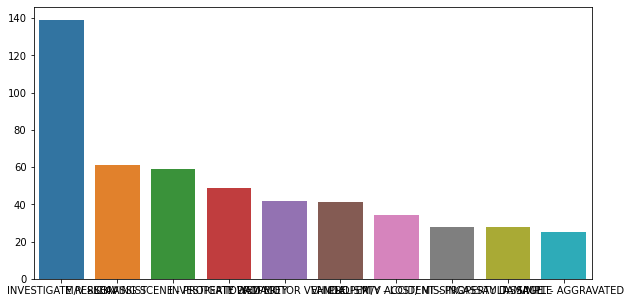

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt
crime_count  = crimedf["OFFENSE_DESCRIPTION"].value_counts(dropna=True, sort=True)
crime_count = crime_count[:10,]

plt.figure(figsize=(10,5))
sns.barplot(crime_count.index, crime_count.values);

In [226]:
import plotly.express as px


df = pd.DataFrame({'a':[1, 1, 2, 2, 2]})

# solution here
df_crime_counts = pd.DataFrame(crime_count)
df_crime_counts_reset = df_crime_counts.reset_index()
df_crime_counts_reset.columns = ['unique_values', 'counts']
fig = px.bar(df_crime_counts_reset,x='unique_values',y='counts')
fig.show()

In [227]:
heat_data_crime = crimedf.groupby(["Lat","Long"])['SHOOTING'].mean().reset_index().values.tolist()

## Boston Count Information

In [351]:
crimedf_full=pd.read_csv("Crime-Boston-full.csv")

In [352]:
dfc=crimedf_full.groupby(['Neighborhood_Geopy']).size().reset_index(name='Counts of Crime in Area').set_index("Neighborhood_Geopy")

In [353]:
# crimedf.groupby(['Neighborhood_Geopy']).size().reset_index(name='Counts of Cri').set_index("Neighborhood_Geopy")

In [354]:
dfh=hospitaldf.groupby(['Neighborhood_Geopy']).size().reset_index(name='Counts of Hospitals in Area').set_index("Neighborhood_Geopy")

In [355]:
dfr=fdf.groupby(['Neighborhood_Geopy']).size().reset_index(name='Counts of Restaurants in Area').set_index("Neighborhood_Geopy")

In [356]:
dfz=zdf.groupby(['Neighborhood_Geopy']).size().reset_index(name='Counts of Zillow Properties in Area').set_index("Neighborhood_Geopy")

In [357]:
dfchrz=pd.concat([dfc,dfh,dfr,dfz],axis=1).fillna(0)
for col in ['Counts of Crime in Area', 'Counts of Hospitals in Area', 'Counts of Restaurants in Area', 'Counts of Zillow Properties in Area']:
    dfchrz[col] = dfchrz[col].astype('int')
dfchrz

Counts of Crime in Area  Counts of Hospitals in Area  \
Neighborhood_Geopy                                                         
Allston                                1339                            0   
Back Bay                               1752                            0   
Beacon Hill                             771                            0   
Brighton                               3105                            3   
Cambridge                                32                            0   
Charlestown                            1159                            0   
Chestnut Hill                             1                            0   
Dorchester                             9451                            2   
Downtown Boston                        1899                            0   
East Boston                            2783                            0   
Fenway/Kenmore                         1620                            5   
Hyde Park                              2632                            0   
Jamaica Plain                          2164                            2   
Mattapan                               4200                            1   
Mission Hill                            997                            2   
No Details                             1484                            1   
North End                               623                            0   
Roslindale                             1605                            1   
Roxbury                                9647                            1   
South Boston                           3164                            0   
South End                              4244                            2   
West End                                900                            4   

                    Counts of Restaurants in Area  \
Neighborhood_Geopy                                  
Allston                                       123   
Back Bay                                      167   
Beacon Hill                                    68   
Brighton                                       85   
Cambridge                                       8   
Charlestown                                    23   
Chestnut Hill                                  24   
Dorchester                                    132   
Downtown Boston                               225   
East Boston                                   105   
Fenway/Kenmore                                187   
Hyde Park                                      29   
Jamaica Plain                                  55   
Mattapan                                       33   
Mission Hill                                   32   
No Details                                    115   
North End                                      93   
Roslindale                                     54   
Roxbury                                       115   
South Boston                                  119   
South End                                      93   
West End                                       56   

                    Counts of Zillow Properties in Area  
Neighborhood_Geopy                                       
Allston                                              31  
Back Bay                                              3  
Beacon Hill                                           3  
Brighton                                             25  
Cambridge                                             0  
Charlestown                                           0  
Chestnut Hill                                         0  
Dorchester                                           13  
Downtown Boston                                       0  
East Boston                                           4  
Fenway/Kenmore                                       27  
Hyde Park                                             1  
Jamaica Plain                                         1  
Mattapan                                            

In [ ]:
# dfchrz['percent of crime']=round(dfchrz['Counts of Crime in Area'].value_counts(normalize=True)*100,2)

# dfchrz['percent of hospitals']=round(dfchrz['Counts of Hospitals in Area'].value_counts(normalize=True)*100,2)

# dfchrz['percent of restaurants']=round(dfchrz['Counts of Restaurants in Area'].value_counts(normalize=True)*100,2)

# dfchrz['percent of zillow properties']=round(dfchrz['Counts of Zillow Properties in Area'].value_counts(normalize=True)*100,2)

# dfchrz['percent of crime']=dfchrz['percent of crime'].astype(str) + '%'

# dfchrz['percent of hospitals']=dfchrz['percent of hospitals'].astype(str) + '%'

# dfchrz['percent of restaurants']=dfchrz['percent of restaurants'].astype(str) + '%'

# dfchrz['percent of zillow properties']=dfchrz['percent of zillow properties'].astype(str) + '%'

In [369]:
dfchrz['percent of crime'] = (dfchrz['Counts of Crime in Area'] / 
                  dfchrz['Counts of Crime in Area'].sum()) * 100
dfchrz['percent of hospitals'] = (dfchrz['Counts of Hospitals in Area'] / 
                  dfchrz['Counts of Hospitals in Area'].sum()) * 100
dfchrz['percent of restaurants'] = (dfchrz['Counts of Restaurants in Area'] / 
                  dfchrz['Counts of Restaurants in Area'].sum()) * 100
dfchrz['percent of zillow properties'] = (dfchrz['Counts of Zillow Properties in Area'] / 
                  dfchrz['Counts of Zillow Properties in Area'].sum()) * 100

dfchrz['percent of crime']=round(dfchrz['percent of crime'],2).astype(str) + '%'
dfchrz['percent of hospitals']=round(dfchrz['percent of hospitals'],2).astype(str) + '%'
dfchrz['percent of restaurants']=round(dfchrz['percent of restaurants'],2).astype(str) + '%'
dfchrz['percent of zillow properties']=round(dfchrz['percent of zillow properties'],2).astype(str) + '%'


dfchrz[["Counts of Crime in Area","percent of crime",\
        "Counts of Hospitals in Area","percent of hospitals",\
        "Counts of Restaurants in Area","percent of restaurants",\
        "Counts of Zillow Properties in Area","percent of zillow properties"]]

Counts of Crime in Area percent of crime  \
Neighborhood_Geopy                                             
Allston                                1339            2.41%   
Back Bay                               1752            3.15%   
Beacon Hill                             771            1.39%   
Brighton                               3105            5.59%   
Cambridge                                32            0.06%   
Charlestown                            1159            2.09%   
Chestnut Hill                             1             0.0%   
Dorchester                             9451           17.01%   
Downtown Boston                        1899            3.42%   
East Boston                            2783            5.01%   
Fenway/Kenmore                         1620            2.92%   
Hyde Park                              2632            4.74%   
Jamaica Plain                          2164            3.89%   
Mattapan                               4200            7.56%   
Mission Hill                            997            1.79%   
No Details                             1484            2.67%   
North End                               623            1.12%   
Roslindale                             1605            2.89%   
Roxbury                                9647           17.36%   
South Boston                           3164            5.69%   
South End                              4244            7.64%   
West End                                900            1.62%   

                    Counts of Hospitals in Area percent of hospitals  \
Neighborhood_Geopy                                                     
Allston                                       0                 0.0%   
Back Bay                                      0                 0.0%   
Beacon Hill                                   0                 0.0%   
Brighton                                      3                12.5%   
Cambridge                                     0                 0.0%   
Charlestown                                   0                 0.0%   
Chestnut Hill                                 0                 0.0%   
Dorchester                                    2                8.33%   
Downtown Boston                               0                 0.0%   
East Boston                                   0                 0.0%   
Fenway/Kenmore                                5               20.83%   
Hyde Park                                     0                 0.0%   
Jamaica Plain                                 2                8.33%   
Mattapan                                      1                4.17%   
Mission Hill                                  2                8.33%   
No Details                                    1                4.17%   
North End                                     0                 0.0%   
Roslindale                                    1                4.17%   
Roxbury                                       1                4.17%   
South Boston                                  0                 0.0%   
South End                                     2                8.33%   
West End                                      4               16.67%   

                    Counts of Restaurants in Area percent of restaurants  \
Neighborhood_Geopy                                                         
Allston                                       123                  6.34%   
Back Bay                                      167                   8.6%   
Beacon Hill                                    68                   3.5%   
Brighton                                       85                  4.38%   
Cambridge                                       8                  0.41%   
Charlestown                                    23                  1.18%   
Chestnut Hill                                  24                  1.24%   
Dorchester                                    132                   6.

In [370]:
dfchrz.sort_values("Counts of Crime in Area",ascending=False)

Counts of Crime in Area  Counts of Hospitals in Area  \
Neighborhood_Geopy                                                         
Roxbury                                9647                            1   
Dorchester                             9451                            2   
South End                              4244                            2   
Mattapan                               4200                            1   
South Boston                           3164                            0   
Brighton                               3105                            3   
East Boston                            2783                            0   
Hyde Park                              2632                            0   
Jamaica Plain                          2164                            2   
Downtown Boston                        1899                            0   
Back Bay                               1752                            0   
Fenway/Kenmore                         1620                            5   
Roslindale                             1605                            1   
No Details                             1484                            1   
Allston                                1339                            0   
Charlestown                            1159                            0   
Mission Hill                            997                            2   
West End                                900                            4   
Beacon Hill                             771                            0   
North End                               623                            0   
Cambridge                                32                            0   
Chestnut Hill                             1                            0   

                    Counts of Restaurants in Area  \
Neighborhood_Geopy                                  
Roxbury                                       115   
Dorchester                                    132   
South End                                      93   
Mattapan                                       33   
South Boston                                  119   
Brighton                                       85   
East Boston                                   105   
Hyde Park                                      29   
Jamaica Plain                                  55   
Downtown Boston                               225   
Back Bay                                      167   
Fenway/Kenmore                                187   
Roslindale                                     54   
No Details                                    115   
Allston                                       123   
Charlestown                                    23   
Mission Hill                                   32   
West End                                       56   
Beacon Hill                                    68   
North End                                      93   
Cambridge                                       8   
Chestnut Hill                                  24   

                    Counts of Zillow Properties in Area percent of crime  \
Neighborhood_Geopy                                                         
Roxbury                                               8           17.36%   
Dorchester                                           13           17.01%   
South End                                             5            7.64%   
Mattapan                                              2            7.56%   
South Boston                                          6            5.69%   
Brighton                                             25            5.59%   
East Boston                                           4            5.01%   
Hyde Park                                             1            4.74%   
Jamaica Plain                                         1            3.89%   
Downtown Boston                                       0            3.42%   
Back Bay  

In [275]:
# dfchrz=dfchrz.reset_index()

In [367]:
dfchrz.to_csv("Boston-neighborhood-count.csv",index=False)

# Similar Restaurant Check

In [281]:
fdf = fdf.astype({'BusinessName':'string'})

In [297]:
from rapidfuzz import process, fuzz
restaurant_choices=fdf["BusinessName"].tolist()
for check in fdf:
    if check=="BusinessName":
        similar=process.extractOne("tikki masala", restaurant_choices, scorer=fuzz.token_set_ratio)
        print(similar[0])
        display(fdf[fdf["BusinessName"]==str(similar[0])])

Tikki Masala Indian Restaurant


BusinessName          Address   ZIP  \
2796  Tikki Masala Indian Restaurant  3706 Washington  2130   

               DESCRIPT  Latitude  Longitude Neighborhood_Geopy  
2796  Eating & Drinking   42.3004    -71.113         Roslindale

In [302]:
similar=process.extractOne("tikki masala", restaurant_choices, scorer=fuzz.token_set_ratio)
print(similar[0])
display(fdf[fdf["BusinessName"]==str(similar[0])])

Tikki Masala Indian Restaurant


BusinessName          Address   ZIP  \
2796  Tikki Masala Indian Restaurant  3706 Washington  2130   

               DESCRIPT  Latitude  Longitude Neighborhood_Geopy  
2796  Eating & Drinking   42.3004    -71.113         Roslindale

In [305]:
university_list=["Northeastern University",\
 "UMass Boston","MIT","Harvard","Boston University","Wentworth Institute of Technology",\
 "Hult","Suffolk University","Bentley University","Tufts University"]

In [306]:
uni_list=pd.DataFrame(university_list, columns=['University_Name'])

In [309]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='geocheck')
lat_uni=[]
long_uni=[]
for uniq in uni_list["University_Name"]:
    location_uni = geolocator.geocode(str(uniq)+", MA")
#     print(location_uni.raw["lat"],location_uni.raw["lon"])
    lat_uni.append(location_uni.raw["lat"])
    long_uni.append(location_uni.raw["lon"])

In [310]:
uni_list["Lat"]=lat_uni
uni_list["Long"]=long_uni

In [313]:
uni_list=uni_list.astype({"Lat":'float64'})
uni_list=uni_list.astype({"Long":'float64'})

In [314]:
uni_list["Lat"] = uni_list["Lat"].apply(lambda x: round(x, 4))
uni_list["Long"] = uni_list["Long"].apply(lambda x: round(x, 4))

In [315]:
uni_list.to_csv("University_Locations.csv",index=False)

## Not Used

In [ ]:
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent='geocheck')
# from geopy.distance import geodesic
# min_closest_distance=[]
# min_closest_neighborhood=[]
# for ne1 in nearest_neighbors_df["Neighborhood_Geopy"]:
#     distances = []
#     for ne2 in nearest_neighbors_df["Neighborhood_Geopy"]:
#         try:
#             if ne1!=ne2 or ne1!="No Details" or ne2!="No Details":
#     #             print(ne1)
#     #             print(ne2)
#                 location1 = geolocator.geocode(str(ne1)+", Boston, MA")
#                 a = location1.raw["lat"],location1.raw["lon"]

In [ ]:
df1['percent'] = (df1['Math_score'] / 
                  df1['Math_score'].sum()) * 100